<img src='./bannière.png'/>

<img src='./B_EDA.png'/>

# Table des matieres

01. Paramétrage

* A. Importations
* B. Chargement des données
* C. Description du contenus de chaque fichier

02. Analyse exploratoire

* A. Analyse préliminaire

03. EDA

* I. Exploration des données
* II. Nettoyage des jeux de données
* III. Analyse Univariée
* IV. Analyse Bivariée
* V. Analyse Multivariée

04. Features engineering

05. Features selection


# 01. Paramétrage

## A. Importations

In [1]:
# Importations nécessaires pour la manipulation des données
import numpy as np
import pandas as pd 

# Importation pour gérer le système de fichiers
import os

# Supprimer les avertissements
import warnings
warnings.filterwarnings('ignore')

# Importations pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Missingno
import missingno as msno
# Itertools
import itertools
# Statsmodels
import statsmodels.api as sm
# scipy
import scipy.stats as st
from scipy.stats import f_oneway, shapiro, levene, anderson, kstest, normaltest, zscore, kruskal, chi2_contingency

#sklearn
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, chi2, RFECV, SelectFromModel
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer, StandardScaler

#mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# module standard
from collections import Counter

## B. Chargement des données

In [2]:
# On liste nos fichiers
print(os.listdir("./Data/"))

['.ipynb_checkpoints', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


## C . Description du contenus de chaque fichier

#### application_train.csv / application_test.csv :

* Ces sont les principaux fichiers d'entraînement et de test.
* Chaque ligne correspond à un prêt.
* Contient des informations sur le prêt et sur le client au moment de l'application.
* La colonne TARGET dans application_train.csv indique si le prêt a été remboursé (0) ou si le client a eu des difficultés à le rembourser (1).

#### bureau.csv :

* Informations sur les crédits antérieurs des clients auprès d'autres institutions financières que Home Credit.
* Chaque ligne correspond à un crédit antérieur (prêt).
* Un client peut avoir plusieurs lignes.

#### bureau_balance.csv :

* Informations mensuelles sur les crédits antérieurs des clients provenant de bureau.csv.
* Chaque ligne correspond à un mois de solde pour un crédit antérieur.

#### previous_application.csv :

* Historique des demandes de prêt précédentes chez Home Credit pour les clients ayant un prêt dans les données d'entraînement/test.
* Chaque ligne correspond à une demande de prêt antérieure.

#### POS_CASH_balance.csv :

* Historique mensuel des précédents points de vente ou des prêts à la consommation que les clients ont eus avec Home Credit.
* Chaque ligne correspond à un mois de solde pour un prêt précédent.

#### credit_card_balance.csv :

* Historique mensuel des soldes des cartes de crédit que les clients ont eues avec Home Credit.
* Chaque ligne est un mois de solde de carte de crédit.

#### installments_payments.csv :

* Historique des paiements de versements effectués par les clients pour les prêts précédents chez Home Credit.
* Chaque ligne correspond à un paiement précédemment effectué ou manqué.

#### HomeCredit_columns_description.csv :

* Contient des descriptions pour les colonnes des autres fichiers.
* Utile pour comprendre ce que signifie chaque caractéristique.

#### sample_submission.csv :

* Un exemple de fichier de soumission au format attendu par Kaggle pour cette compétition.

In [3]:
application_test = pd.read_csv('./Data/application_test.csv')
application_train = pd.read_csv('./Data/application_train.csv')
bureau = pd.read_csv('./Data/bureau.csv')
bureau_balance = pd.read_csv('./Data/bureau_balance.csv')
credit_card_balance = pd.read_csv('./Data/credit_card_balance.csv')
HomeCredit_columns_description = pd.read_csv('./Data/HomeCredit_columns_description.csv', encoding='ISO-8859-1')
installments_payments = pd.read_csv('./Data/installments_payments.csv')
POS_CASH_balance = pd.read_csv('./Data/POS_CASH_balance.csv')
previous_application = pd.read_csv('./Data/previous_application.csv')
sample_submission = pd.read_csv('./Data/sample_submission.csv')

# 02. Analyse exploratoire

## A. Analyse préliminaire

In [4]:
# Liste des dataframes et leurs noms associés
dataframes = {
    'application_test': application_test,
    'application_train': application_train,
    'bureau': bureau,
    'bureau_balance': bureau_balance,
    'credit_card_balance': credit_card_balance,
    'HomeCredit_columns_description': HomeCredit_columns_description,
    'installments_payments': installments_payments,
    'POS_CASH_balance': POS_CASH_balance,
    'previous_application': previous_application,
    'sample_submission': sample_submission
}

# Boucle pour parcourir et afficher les informations de chaque dataframe
for name, df in dataframes.items():
    print(f"\n\n{'='*20} {name.upper()} {'='*20}\n")
    print("Premières lignes :")
    print(df.head())
    print('\n')
    print("\nInformations générales :")
    print(df.info())
    print('\n')
    print("\nValeurs manquantes :")
    print(df.isnull().sum().sum())
    print('\n')
    print('Dimensionnalité du DataFrame')
    print('\n')
    print(df.shape)
    print("\n\n")



==================== APPLICATION_TEST ====================

Premières lignes :
   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0   

3939947


Dimensionnalité du DataFrame


(1716428, 17)





==================== BUREAU_BALANCE ====================

Premières lignes :
   SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None



Valeurs manquantes :
0


Dimensionnalité du DataFrame


(27299925, 3)





==================== CREDIT_CARD_BALANCE ====================

Premières lignes :
   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071 

52158


Dimensionnalité du DataFrame


(10001358, 8)





==================== PREVIOUS_APPLICATION ====================

Premières lignes :
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDA

# 03. EDA

Dans le cadre de notre projet pour la société financière "Prêt à dépenser", notre objectif principal est de développer un outil de scoring crédit capable de prédire la probabilité qu'un client rembourse son prêt.

Les fichiers application_train.csv et application_test.csv constituent la base de notre jeu de données. Ils renferment des informations détaillées sur chaque demande de prêt

Avant de nous plonger dans les autres sources de données qui pourraient enrichir notre modèle, il est primordial de bien saisir la structure, la nature et les tendances de ces tables principales. 

C'est pourquoi nous avons décidé de concentrer, dans un premier temps, notre exploration des données sur ces deux fichiers. 

Cette approche nous permettra de poser des bases solides pour notre modèle et d'identifier les principales caractéristiques à considérer lors de la phase de modélisation.

## I. Exploration des données

<h3>A. Affichage des cinq premières lignes de notre DataFrame : </h3>

In [5]:
print('application_test : ') 
application_test.head()

application_test : 


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [6]:
print('application_train :')
application_train.head()

application_train :


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

<h3>B. Affichage des features de nos dataframe : </h3>

In [7]:
print('application_test : ')
print('--------------------')
list(application_test.columns)
for col in application_test.columns:
    print(col)

application_test : 
--------------------
SK_ID_CURR
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPAR

In [8]:
print('application_train : ') 
print('--------------------')
list(application_train.columns)
for col in application_test.columns:
    print(col)

application_train : 
--------------------
SK_ID_CURR
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPA

<h3>C. Affichage les informations de notre DataFrame : </h3>

In [9]:
print('application_test : ') 
application_test.info()

application_test : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [10]:
print('application_train :')
application_train.info()

application_train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


<h3>D. Affichage du nombre de lignes, de colonnes DataFrame :</h3>

In [11]:
print('application_test : ') 
print("Nombre de colonnes :", application_test.shape[1])
print("Nombre de lignes :", application_test.shape[0])

application_test : 
Nombre de colonnes : 121
Nombre de lignes : 48744


In [12]:
print('application_train : ') 
print("Nombre de colonnes :", application_train.shape[1])
print("Nombre de lignes :", application_train.shape[0])
print('Nombre de valeurs uniques par colonne', application_train.select_dtypes('object').nunique())

application_train : 
Nombre de colonnes : 122
Nombre de lignes : 307511
Nombre de valeurs uniques par colonne NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


<h3>E. Nombre de valeurs uniques :</h3>

In [13]:
print('application_test :')
application_test.nunique().sum()

application_test :


225067

In [14]:
print('application_train :')
application_train.nunique().sum()

application_train :


695662

<h3>F. Affichage des types de données de chaque colonne : </h3>

In [15]:
print('application_test : ') 
print("Types de données :")
application_test.dtypes.value_counts()

application_test : 
Types de données :


float64    65
int64      40
object     16
dtype: int64

In [16]:
print('application_train : ') 
print("Types de données :")
application_train.dtypes.value_counts()

application_train : 
Types de données :


float64    65
int64      41
object     16
dtype: int64

<h3>G. Affichage des statistiques descriptives pour chaque colonne numérique (moyenne, médiane, min, max, écart-type, etc.) : </h3>

In [17]:
print('application_test : ') 
application_test.describe()

application_test : 


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [18]:
print('application_train : ') 
application_train.describe()

application_train : 


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

## II. Nettoyage des jeux de données 

<h3>A. Affichage du pourcentage de valeurs manquantes par colonne : </h3>

In [19]:
print('application_test : ') 
(application_test.isnull().mean() * 100).astype(int)

application_test : 


SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
                              ..
AMT_REQ_CREDIT_BUREAU_DAY     12
AMT_REQ_CREDIT_BUREAU_WEEK    12
AMT_REQ_CREDIT_BUREAU_MON     12
AMT_REQ_CREDIT_BUREAU_QRT     12
AMT_REQ_CREDIT_BUREAU_YEAR    12
Length: 121, dtype: int64

In [20]:
print('application_train : ') 
(application_train.isnull().mean() * 100).astype(int)

application_train : 


SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
                              ..
AMT_REQ_CREDIT_BUREAU_DAY     13
AMT_REQ_CREDIT_BUREAU_WEEK    13
AMT_REQ_CREDIT_BUREAU_MON     13
AMT_REQ_CREDIT_BUREAU_QRT     13
AMT_REQ_CREDIT_BUREAU_YEAR    13
Length: 122, dtype: int64

<h3>B. Affichage du nombre de lignes qui ont des valeurs manquantes :</h3>

In [21]:
print('application_test : ') 
(application_test.isnull().sum(axis=1) > 0).sum()

application_test : 


47005

In [22]:
print('application_train : ') 
(application_train.isnull().sum(axis=1) > 0).sum()

application_train : 


298909

<h3>C. Comparaison du nombre total de valeurs avec le nombre de valeurs manquantes : </h3>

In [23]:
print('application_test : ') 
missing_values = application_test.isnull().sum()
missing_percent = (missing_values / len(application_test)) * 100  
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

# Transposition du DataFrame
missing_table_transposed = missing_table.transpose()

# Affichage du DataFrame transposé
missing_table_transposed

application_test : 


SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
Missing Values         0.0                 0.0          0.0           0.0   
Percentage             0.0                 0.0          0.0           0.0   

                FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
Missing Values              0.0           0.0               0.0         0.0   
Percentage                  0.0           0.0               0.0         0.0   

                AMT_ANNUITY  AMT_GOODS_PRICE  ...  FLAG_DOCUMENT_18  \
Missing Values    24.000000              0.0  ...               0.0   
Percentage         0.049237              0.0  ...               0.0   

                FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
Missing Values               0.0               0.0               0.0   
Percentage                   0.0               0.0               0.0   

                AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
Missing Values                 6049.000000                6049.000000   
Percentage                       12.409732                  12.409732   

                AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
Missing Values                 6049.000000                6049.000000   
Percentage                       12.409732                  12.409732   

                AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
Missing Values                6049.000000                 6049.000000  
Percentage                      12.409732                   12.409732  

[2 rows x 121 columns]

application_test : 


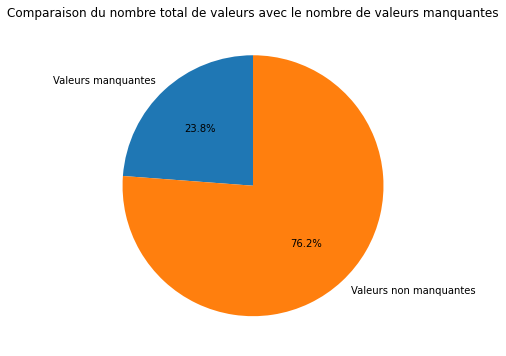

In [24]:
print('application_test : ') 

#Calculer le nombre total de valeurs
total_values = application_test.size

# Calculer le nombre total de valeurs manquantes
total_missing = application_test.isnull().sum().sum()

labels = ['Valeurs manquantes', 'Valeurs non manquantes']
values = [total_missing, total_values - total_missing]
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Comparaison du nombre total de valeurs avec le nombre de valeurs manquantes")
plt.show()

In [25]:
print('application_train : ') 
missing_values = application_test.isnull().sum()
missing_percent = (missing_values / len(application_test)) * 100  
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

# Transposition du DataFrame
missing_table_transposed = missing_table.transpose()
missing_table_transposed

application_train : 


SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
Missing Values         0.0                 0.0          0.0           0.0   
Percentage             0.0                 0.0          0.0           0.0   

                FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
Missing Values              0.0           0.0               0.0         0.0   
Percentage                  0.0           0.0               0.0         0.0   

                AMT_ANNUITY  AMT_GOODS_PRICE  ...  FLAG_DOCUMENT_18  \
Missing Values    24.000000              0.0  ...               0.0   
Percentage         0.049237              0.0  ...               0.0   

                FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
Missing Values               0.0               0.0               0.0   
Percentage                   0.0               0.0               0.0   

                AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
Missing Values                 6049.000000                6049.000000   
Percentage                       12.409732                  12.409732   

                AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
Missing Values                 6049.000000                6049.000000   
Percentage                       12.409732                  12.409732   

                AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
Missing Values                6049.000000                 6049.000000  
Percentage                      12.409732                   12.409732  

[2 rows x 121 columns]

application_train : 


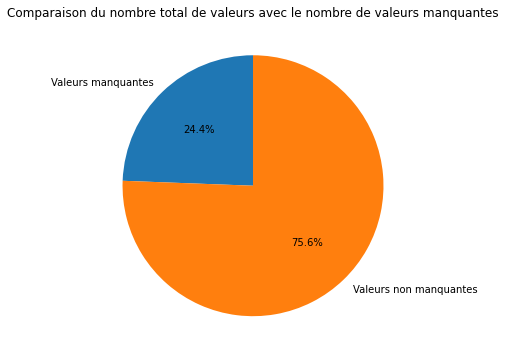

In [26]:
print('application_train : ') 

#Calculer le nombre total de valeurs
total_values = application_train.size

# Calculer le nombre total de valeurs manquantes
total_missing = application_train.isnull().sum().sum()


labels = ['Valeurs manquantes', 'Valeurs non manquantes']
values = [total_missing, total_values - total_missing]
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Comparaison du nombre total de valeurs avec le nombre de valeurs manquantes")
plt.show()

<h3>D. Visualisations des valeurs manquantes</h3>

<h4>I. Matrice</h4>

application_test : 


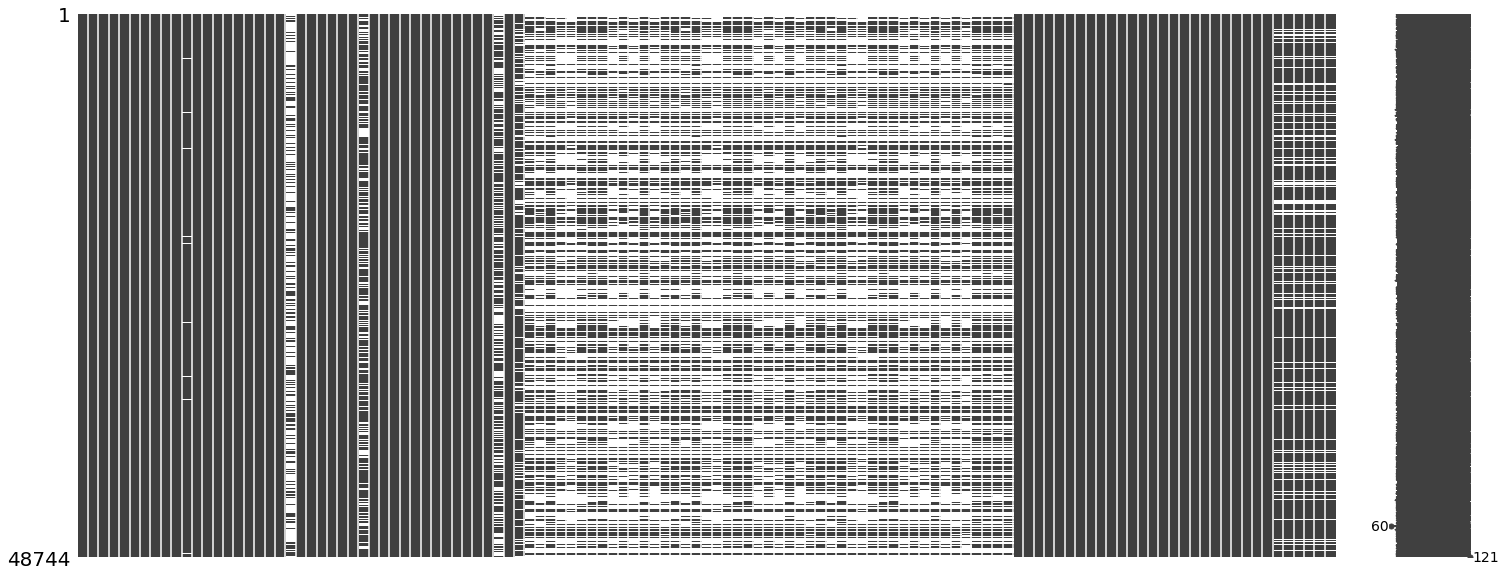

In [27]:
print('application_test : ') 
msno.matrix(application_test)
plt.show()

application_train : 


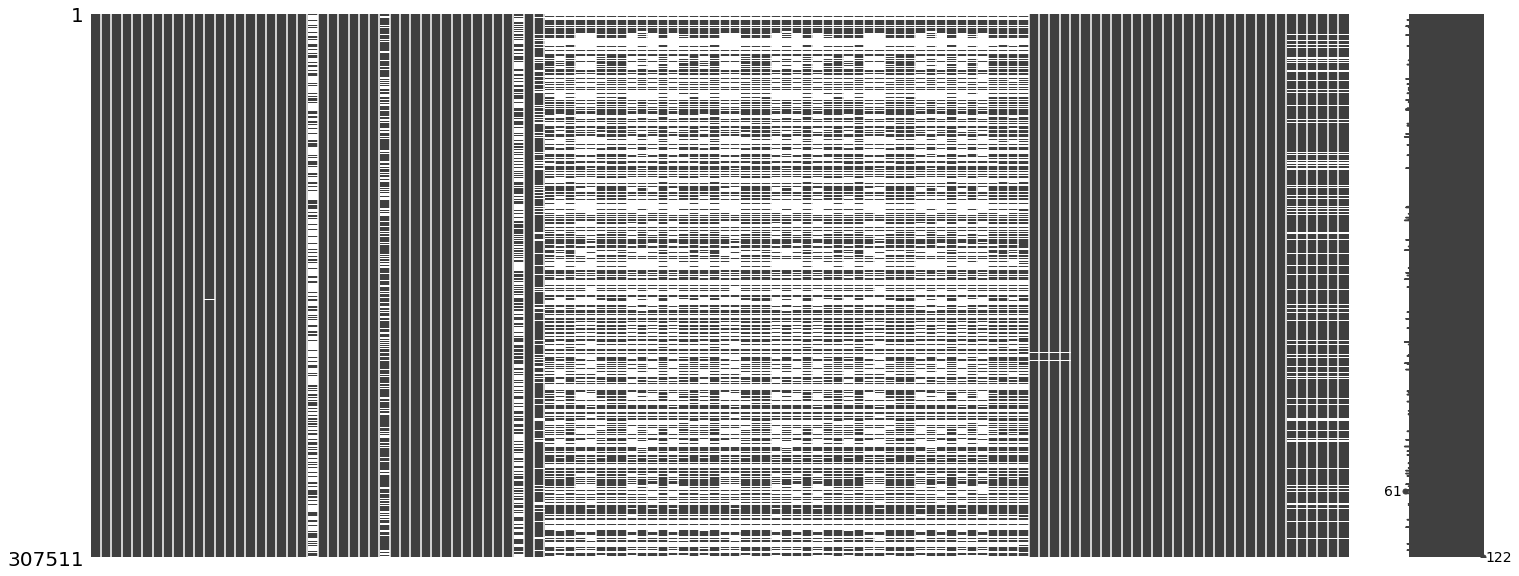

In [28]:
print('application_train : ') 
msno.matrix(application_train)
plt.show()

<h4>II.Diagramme en barres</h4>

application_test : 


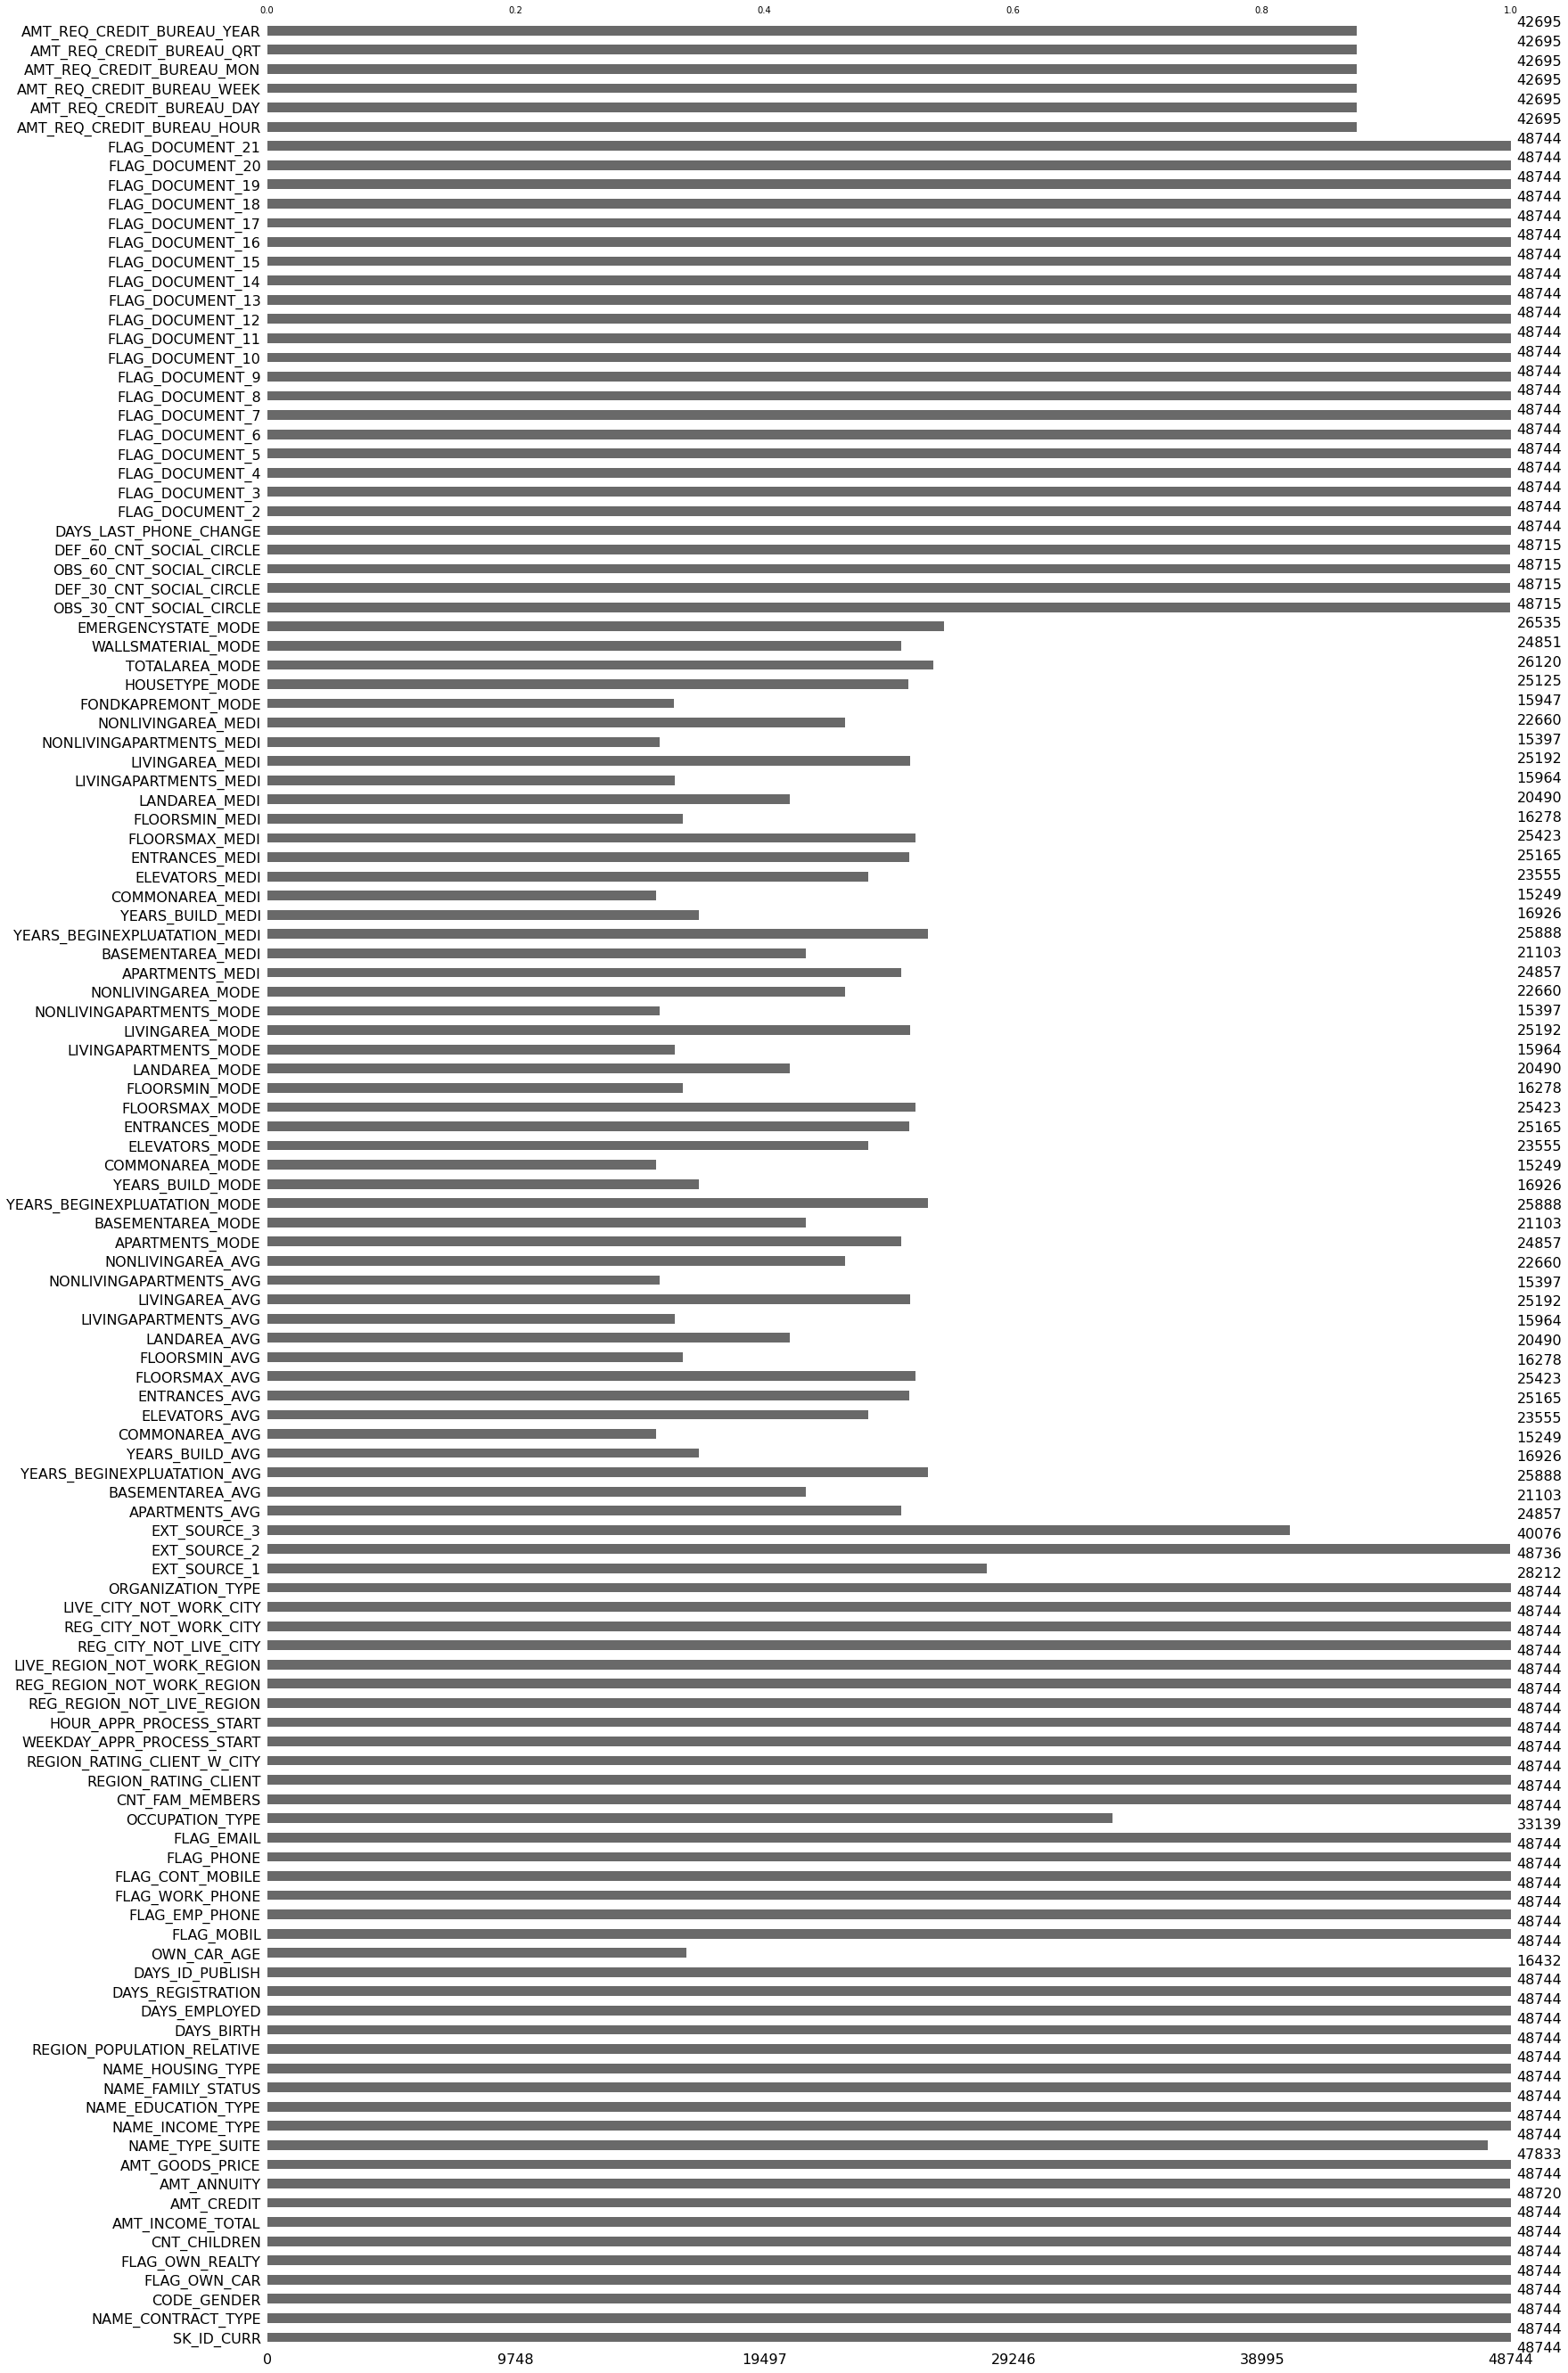

In [29]:
print('application_test : ') 
msno.bar(application_test)
plt.show()

application_train : 


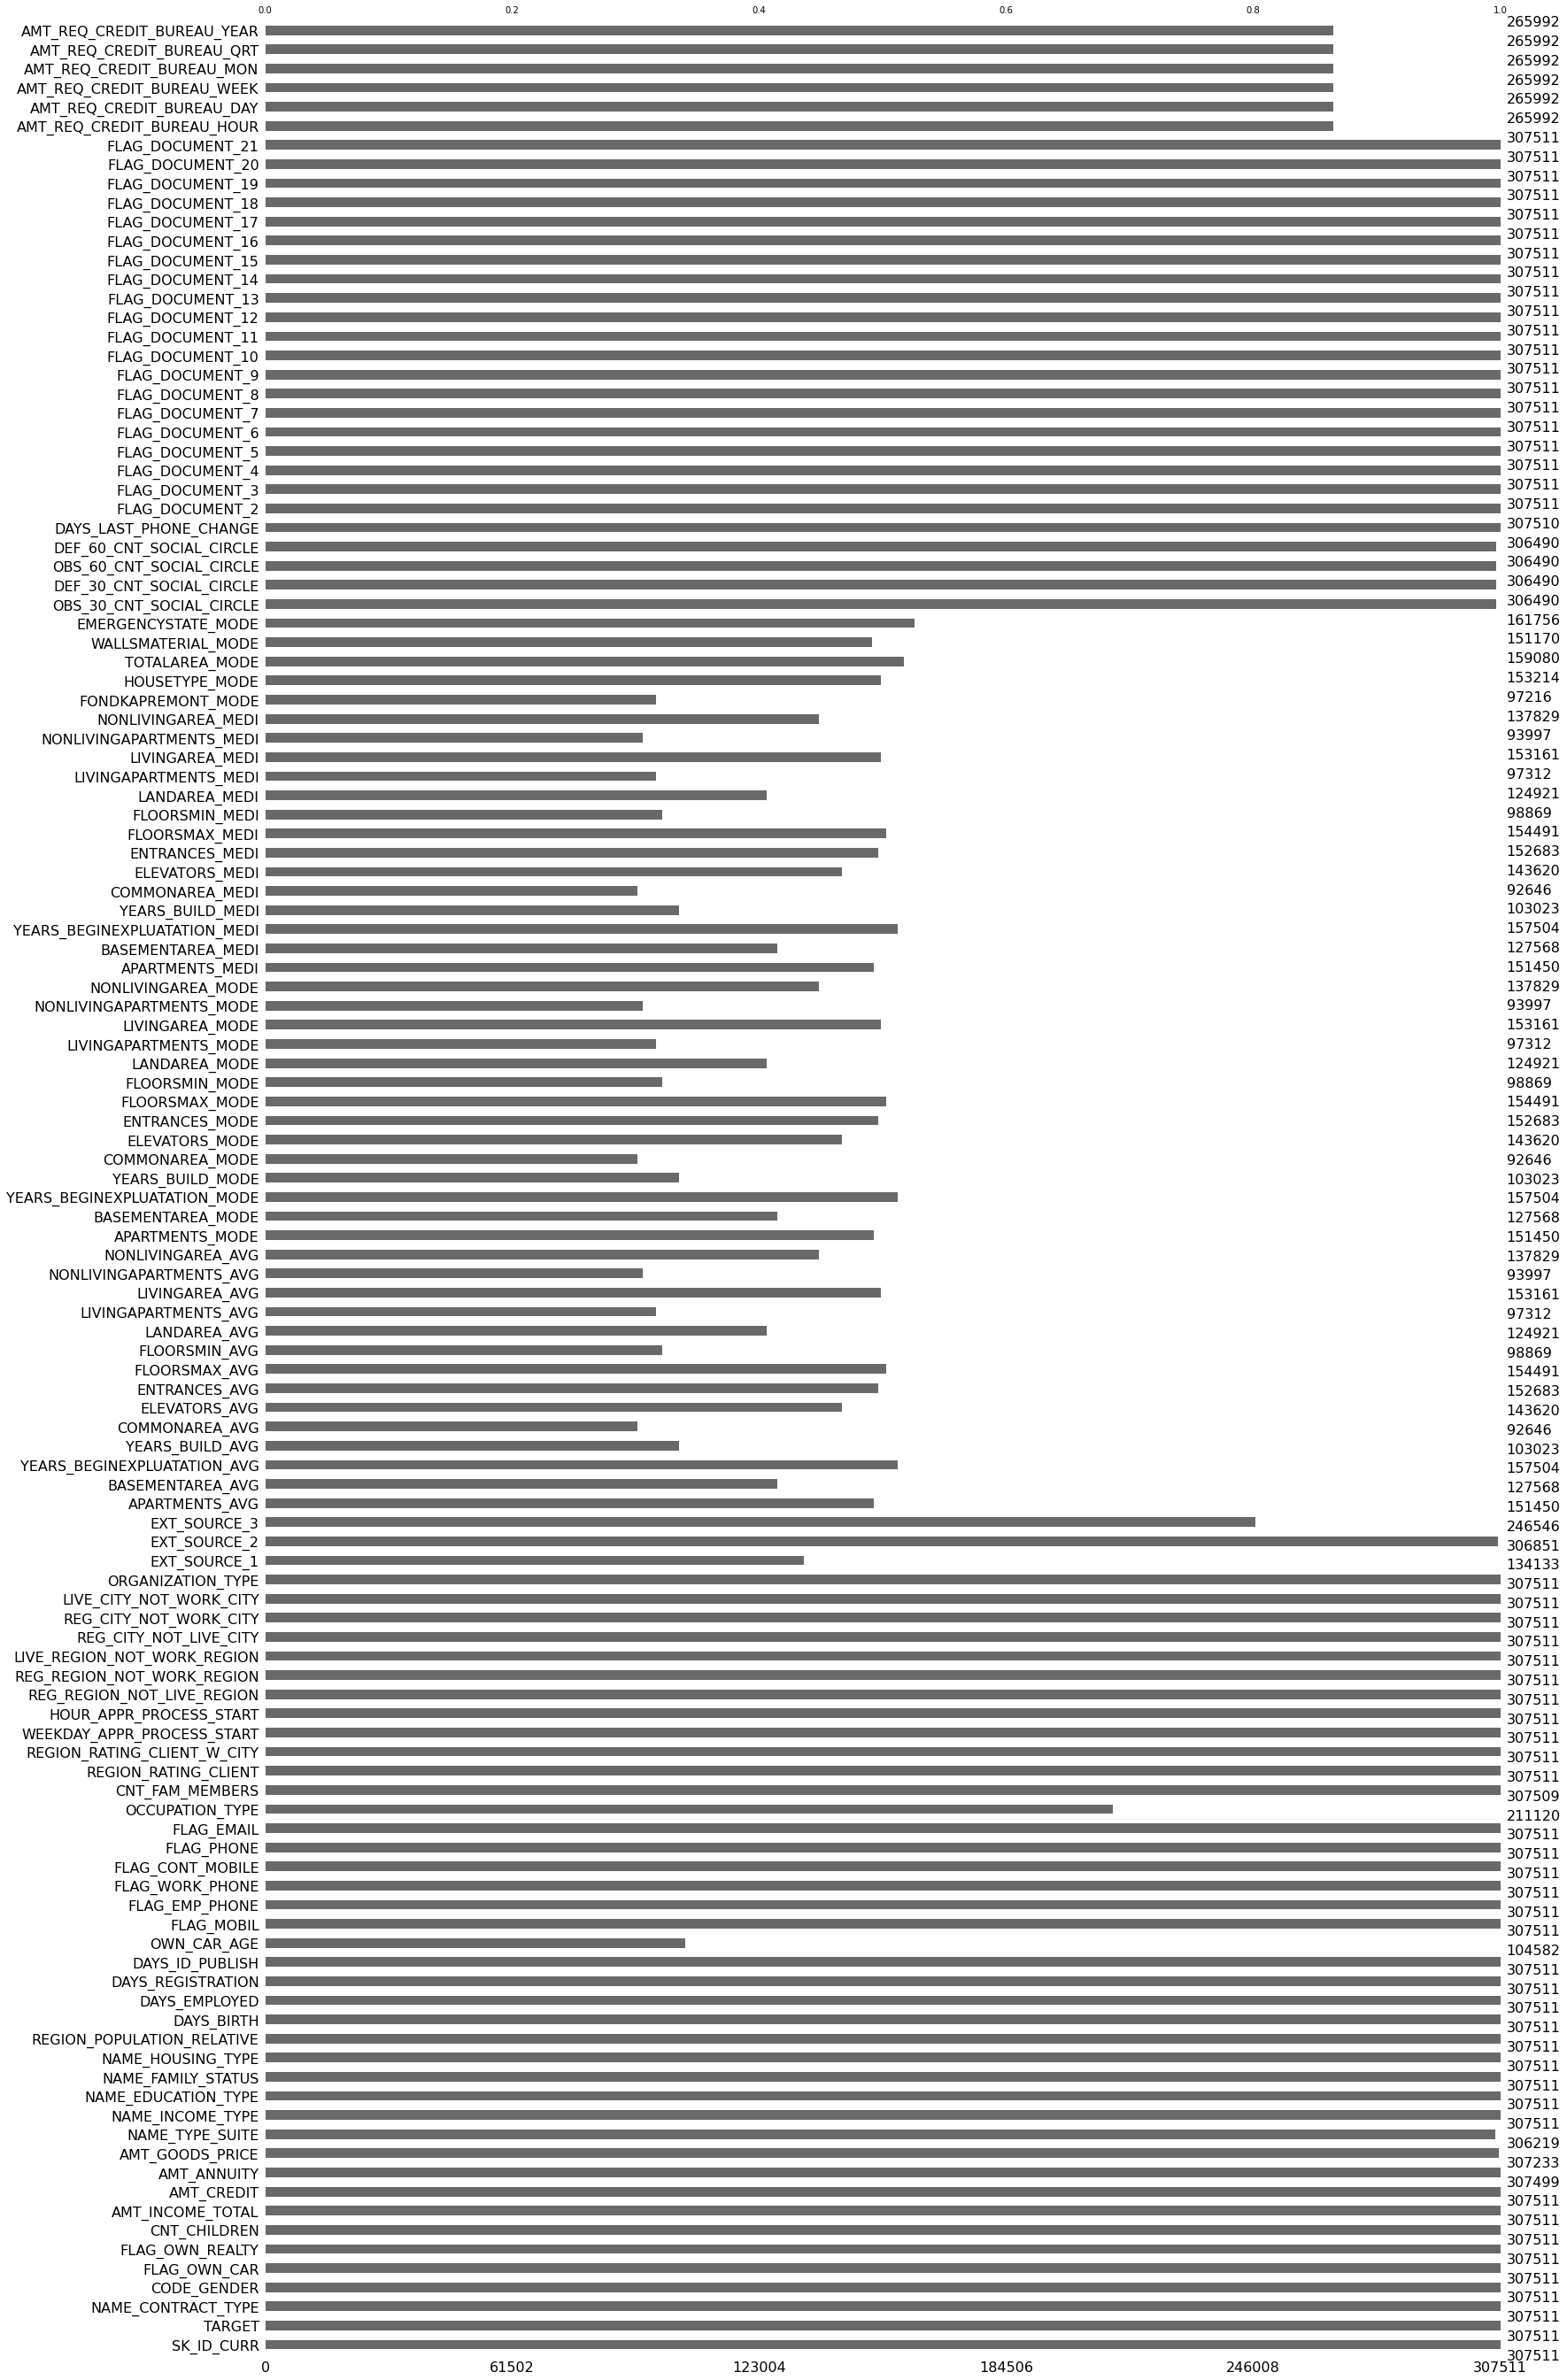

In [30]:
print('application_train : ') 
msno.bar(application_train)
plt.show()

<h5>E. Recherche de corrélas pour les valeurs manquantes</h5>

<h4>I. Dendrogram</h4>

In [31]:
# Calculer le nombre de valeurs manquantes pour chaque colonne
missing_values = application_test.isnull().sum()

# Filtrer seulement les colonnes qui ont des valeurs manquantes
missing_values = missing_values[missing_values > 0]

# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = (missing_values / len(application_train)) * 100

# Créer un DataFrame pour afficher les résultats
missing_df = pd.DataFrame({'Nombre de valeurs manquantes': missing_values,
                           'Pourcentage (%)': missing_percentage})

# Trier les résultats par pourcentage de manière décroissante
missing_df = missing_df.sort_values(by='Pourcentage (%)', ascending=False)
display(missing_df)

# Recupere la liste des colonnes avec des valeurs manquantes
missing_columns_test = missing_df.index.tolist()

Nombre de valeurs manquantes  Pourcentage (%)
COMMONAREA_MODE                                  33495        10.892293
COMMONAREA_MEDI                                  33495        10.892293
COMMONAREA_AVG                                   33495        10.892293
NONLIVINGAPARTMENTS_MEDI                         33347        10.844165
NONLIVINGAPARTMENTS_AVG                          33347        10.844165
...                                                ...              ...
OBS_60_CNT_SOCIAL_CIRCLE                            29         0.009431
DEF_30_CNT_SOCIAL_CIRCLE                            29         0.009431
OBS_30_CNT_SOCIAL_CIRCLE                            29         0.009431
AMT_ANNUITY                                         24         0.007805
EXT_SOURCE_2                                         8         0.002602

[64 rows x 2 columns]

application_test : 


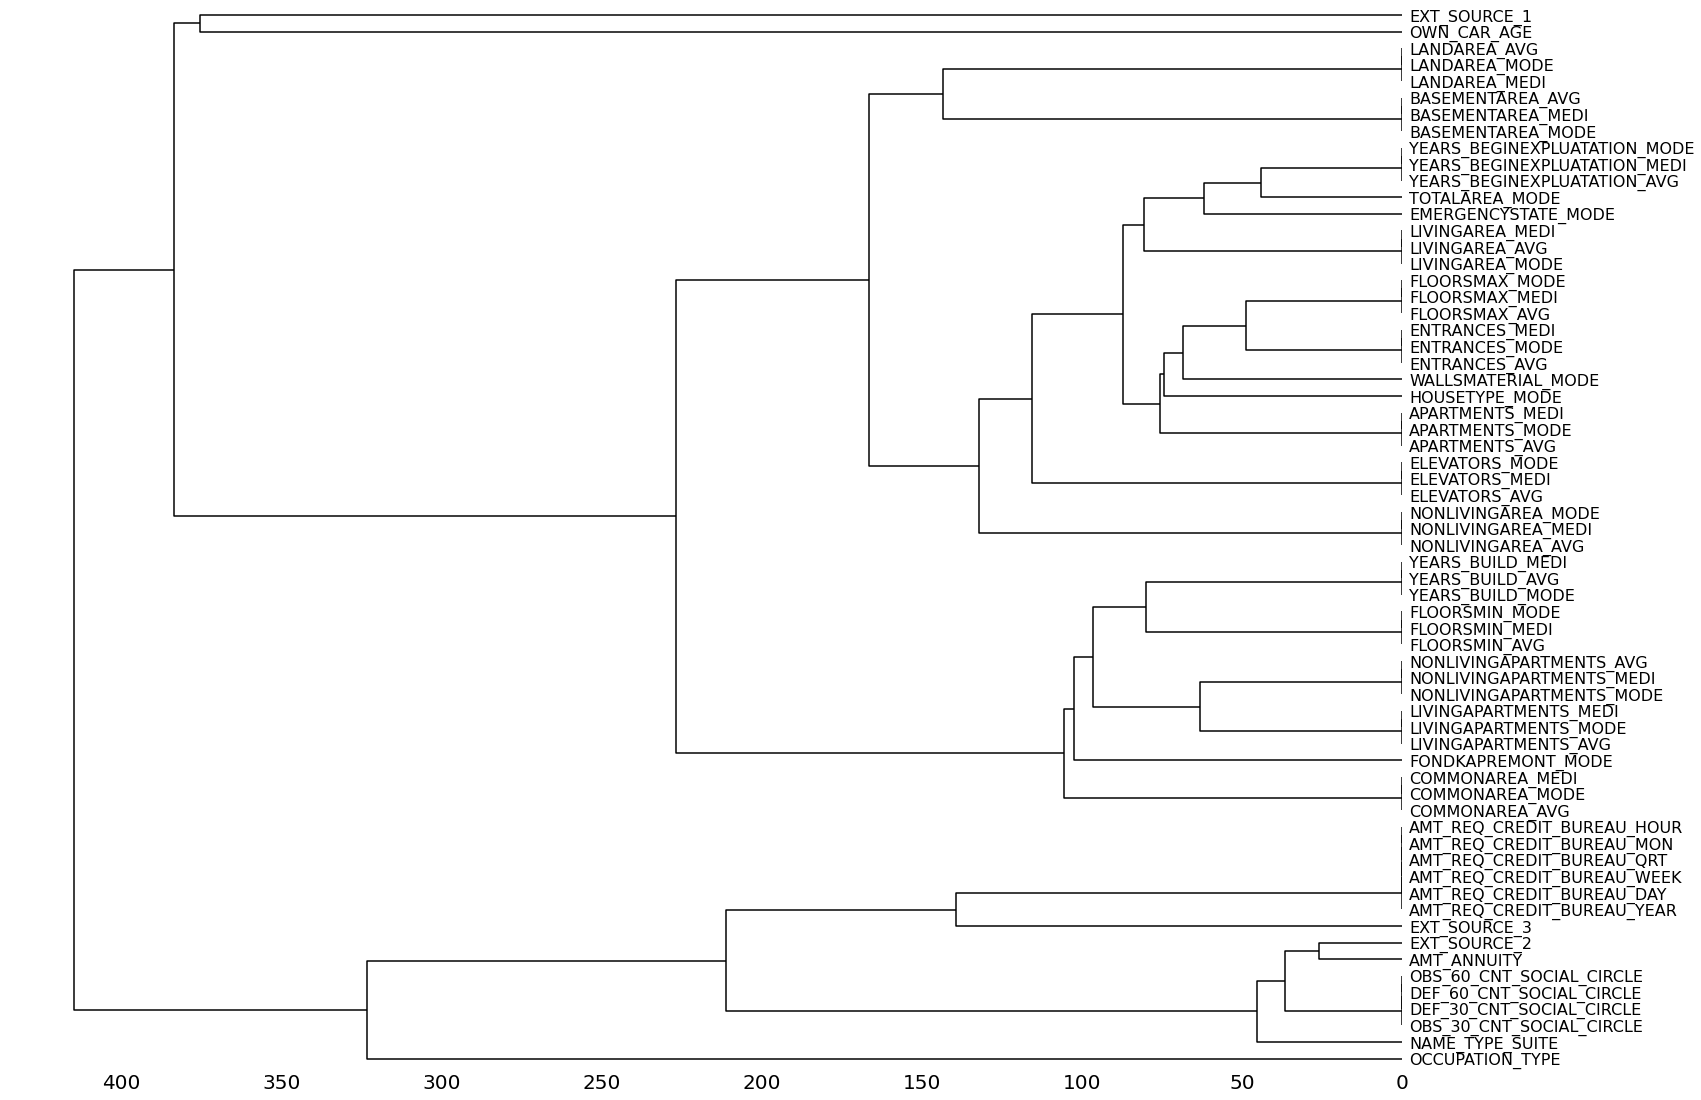

In [32]:
print('application_test : ') 
# Filtre le dataframe pour ne conserver que les colonnes avec des valeurs manquantes
filtered_application_train = application_train[missing_columns_test]
msno.dendrogram(filtered_application_train)
plt.show()

In [33]:
# Calculer le nombre de valeurs manquantes pour chaque colonne
missing_values = application_train.isnull().sum()

# Filtrer seulement les colonnes qui ont des valeurs manquantes
missing_values = missing_values[missing_values > 0]

# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = (missing_values / len(application_train)) * 100

# Créer un DataFrame pour afficher les résultats
missing_df = pd.DataFrame({'Nombre de valeurs manquantes': missing_values,
                           'Pourcentage (%)': missing_percentage})

# Trier les résultats par pourcentage de manière décroissante
missing_df = missing_df.sort_values(by='Pourcentage (%)', ascending=False)
display(missing_df)

# Recupere la liste des colonnes avec des valeurs manquantes
missing_columns_train = missing_df.index.tolist()

Nombre de valeurs manquantes  Pourcentage (%)
COMMONAREA_MEDI                                 214865        69.872297
COMMONAREA_AVG                                  214865        69.872297
COMMONAREA_MODE                                 214865        69.872297
NONLIVINGAPARTMENTS_MEDI                        213514        69.432963
NONLIVINGAPARTMENTS_MODE                        213514        69.432963
...                                                ...              ...
EXT_SOURCE_2                                       660         0.214626
AMT_GOODS_PRICE                                    278         0.090403
AMT_ANNUITY                                         12         0.003902
CNT_FAM_MEMBERS                                      2         0.000650
DAYS_LAST_PHONE_CHANGE                               1         0.000325

[67 rows x 2 columns]

application_train : 


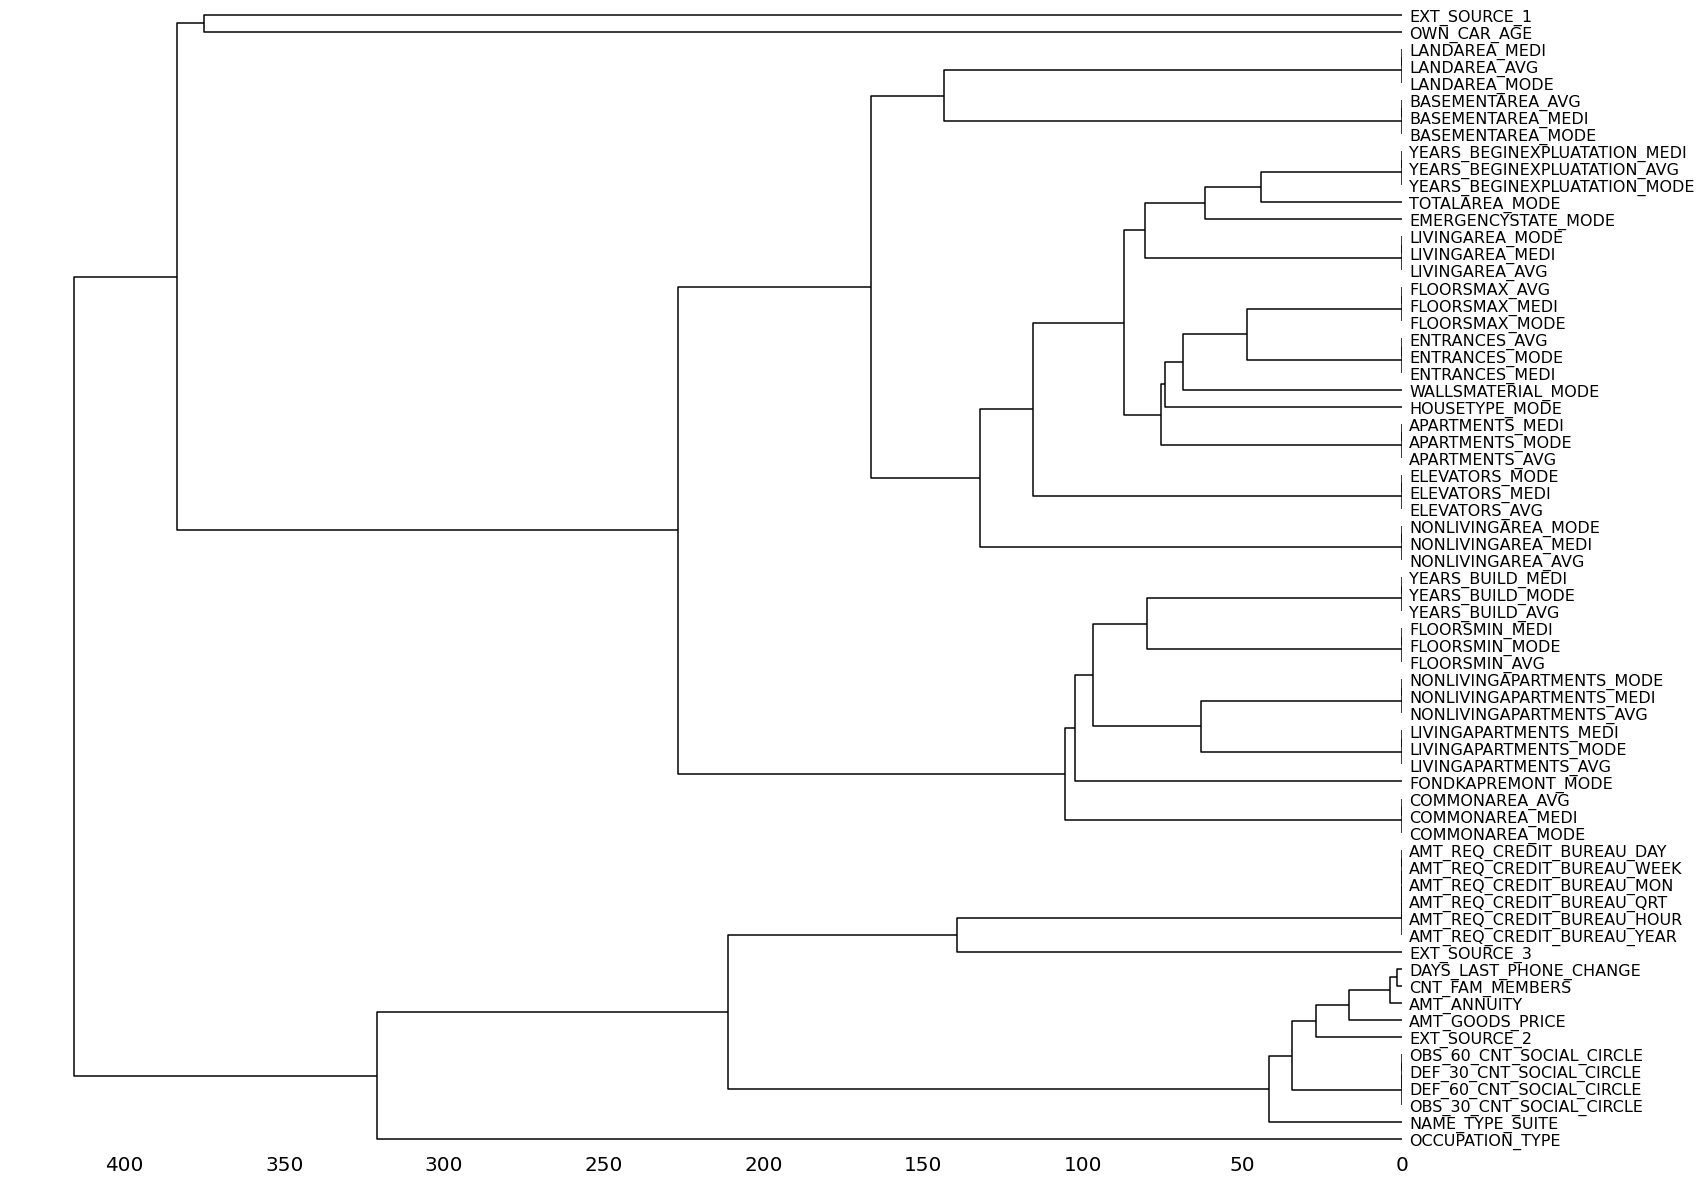

In [34]:
print('application_train : ') 
# Filtrer votre dataframe pour ne conserver que les colonnes avec des valeurs manquantes
filtered_application_train = application_train[missing_columns_train]

msno.dendrogram(filtered_application_train)
plt.show()

<h5>F. Gérer les valeurs manquantes :</h5>

Notre analyse a révélé que le jeu de données de test présente un taux de valeurs manquantes de 23,8%, tandis que le jeu de données d'entraînement enregistre un taux de 24,4%.

En se référant aux travaux existants dans le domaine, notamment ceux publiés par Dr. Graham et Dr. Schafer, il est illustré que l'imputation des données est généralement déconseillée lorsque le taux de données manquantes ne dépasse pas 30%.

Cette recommandation est motivée par les risques potentiels associés à l'imputation dans des contextes avec un faible pourcentage de données manquantes.

<ul>
    <li><a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/">The prevention and handling of the missing data</a></li>
    <li><a href="https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-017-0442-1"> When and how should multiple imputation be used for handling missing data in randomised clinical trials – a practical guide with flowcharts</a></li>
</ul>

<ul>
    <li><h5>MCAR (Missing Completely at Random)</h5></li>
    <br/>
    <p>Définition : Les données manquantes n'ont aucune relation avec les autres données</p>
    <br/>
    <i>Exemple : </i>
    <br/>
    <p>Perte accidentelle de données</p>
    <br/>
    <h6>Methodes de traitement recommandées :</h6>
    <br/>
    <li>Suppressions ( si le taux de valeurs manquantes est faible )</li>
    <li>Imputation par la moyenne (quantitatifs)</li>
    <li>Imputation par la médiane (quantitatifs)</li>
    <li>Impuation par le mode (qualicatifs)</li>
    <br/>
    <br/>
    <li><h5>MAR (Missing At Random)</h5></li>
    <br/>
    <p>Définition : Les valeurs manquantes dépendent d'autres données observées, mais pas de données manquantes.</p>
    <br/>
    <i>Exemple : </i>
    <br/>
    <p>Non-reponse liée à une varible observée</p>
    <br/>
    <h6>Methodes de traitement recommandées :</h6>
    <br/>
    <li>Imputation par KNN</li>
    <li>Imputation par MissForest</li>
    <li>Impuation par régression</li>
    <br/>
    <br/>
    <li><h5>MNAR (Not Missing At Random)</h5></li>
    <br/>
    <p>Définition : Les valeurs manquantes dépendent des valeurs manquantes.</p>
    <br/>
    <i>Exemple : </i>
    <br/>
    <p>Non-reponse liée à une varible non observée</p>
    <br/>
    <h6>Methodes de traitement recommandées :</h6>
    <br/>
    <li>Imputation par KNN</li>
    <li>Imputation par MissForest</li>
    <li>Impuation par régression</li>
</ul>

<h6>I. application_train</h6>

Après avoir examiné le dendrogramme généré par `missingno`, nous avons identifié plusieurs groupes de variables qui ont tendance à avoir des valeurs manquantes ensemble. 

Ces groupes sont probablement liés par nature, ce qui signifie qu'ils dépendent d'un mécanisme sous-jacent similaire pour la survenue de valeurs manquantes.

Nous aborderons chaque groupe de manière séparée en suivant les étapes générales suivantes :

Pour chaque groupe, nous déterminerons le pourcentage de valeurs manquantes.

Si le pourcentage est inférieur à 30%, nous appliquerons une méthode d'imputation appropriée basée sur la nature des variables.

Si le pourcentage est supérieur à 30%, nous supprimerons la variable pour éviter d'introduire des biais dans notre analyse.

In [35]:
def handle_missing_data(df, missing_columns):
    """
    Gestion des valeurs manquantes dans le DataFrame.
    
    - Si le taux de valeurs manquantes pour une colonne est inférieur à 30% :
        * Si la colonne est quantitative : imputation par la médiane.
        * Si la colonne est qualitative : imputation par le mode.
    - Si le taux est supérieur à 30% : suppression des lignes où il y a des valeurs manquantes pour cette colonne.
    
    Paramètres:
        - df : DataFrame original
        - missing_columns : Liste des colonnes avec des valeurs manquantes
    
    Retourne :
        - DataFrame après traitement des valeurs manquantes
    """
    # Création d'une copie pour ne pas altérer le DataFrame original
    df_cleaned = df.copy()
    
    # Liste des colonnes quantitatives et qualitatives
    quantitative_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
    qualitative_cols = df_cleaned.select_dtypes(include=['object']).columns
    
    # Traitement pour chaque colonne en fonction du pourcentage de valeurs manquantes
    for col in missing_columns:
        missing_percent = (df_cleaned[col].isnull().sum() / len(df_cleaned)) * 100
        if missing_percent < 30:
            if col in quantitative_cols:
                # Imputation par la médiane pour les colonnes quantitatives
                imputer = SimpleImputer(strategy='median')
                df_cleaned[col] = imputer.fit_transform(df_cleaned[[col]])
            elif col in qualitative_cols:
                # Imputation par le mode pour les colonnes qualitatives
                imputer = SimpleImputer(strategy='most_frequent')
                df_cleaned[col] = imputer.fit_transform(df_cleaned[[col]])
        else:
            # Suppression des lignes où il y a des valeurs manquantes pour les colonnes ayant plus de 30% de valeurs manquantes
            df_cleaned = df_cleaned[df_cleaned[col].notna()]
    
    return df_cleaned

In [36]:
application_train_cleaned = handle_missing_data(application_train, missing_columns_train)

In [37]:
application_train_cleaned.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [38]:
application_test_cleaned = handle_missing_data(application_test, missing_columns_test)

In [39]:
application_test_cleaned.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

<h5>G. Detection des doublons :</h5>

In [40]:
print('application_test : ') 
duplicates = application_test[application_test.duplicated()]

if len(duplicates) > 0:
    print("Notre jeu de données contient", len(duplicates), "doublon(s).")
else:
    print("Notre jeu de données ne contient pas de doublons.")

application_test : 
Notre jeu de données ne contient pas de doublons.


In [41]:
print('application_train : ') 
duplicates = application_train[application_train.duplicated()]

if len(duplicates) > 0:
    print("Notre jeu de données contient", len(duplicates), "doublon(s).")
else:
    print("Notre jeu de données ne contient pas de doublons.")

application_train : 
Notre jeu de données ne contient pas de doublons.


## III. Analyse Univariée 

Pour l'analyse univariée dans le contexte de prédiction du risque de crédit, il est pertinent de se concentrer sur des caractéristiques qui sont généralement associées à la solvabilité et au comportement de remboursement des emprunteurs. 



Fonctionnalités Financières :

* AMT_INCOME_TOTAL: Total des revenus de l'emprunteur.
* AMT_CREDIT: Montant du crédit accordé.
* AMT_ANNUITY: Montant de l'annuité.
* AMT_GOODS_PRICE: Prix des biens pour lesquels le crédit est accordé.

Fonctionnalités Démographiques :

* CODE_GENDER: Sexe de l'emprunteur.
* DAYS_BIRTH: Âge de l'emprunteur.
* NAME_EDUCATION_TYPE: Niveau d'éducation de l'emprunteur.
* NAME_FAMILY_STATUS: Statut familial de l'emprunteur.
* NAME_HOUSING_TYPE: Type de logement de l'emprunteur.

Historique de l'Emploi :

* DAYS_EMPLOYED: Durée de l'emploi.
* OCCUPATION_TYPE: Type d'occupation de l'emprunteur.
* ORGANIZATION_TYPE: Type d'organisation où l'emprunteur est employé.

Fonctionnalités de Propriété :

* FLAG_OWN_CAR: Indicateur de possession de voiture.
* FLAG_OWN_REALTY: Indicateur de possession de biens immobiliers.
* OWN_CAR_AGE: Âge de la voiture possédée.

Évaluations Régionales :

* REGION_RATING_CLIENT: Évaluation du client dans la région.
* REGION_RATING_CLIENT_W_CITY: Évaluation du client dans la ville.


<h3>A. La variable "Target" : </h3>

<h4>I. Distribution de la variable "Target" : </h4>

In [42]:
print('application_train :')
display(application_train['TARGET'].value_counts(normalize=True))

application_train :


0    0.919271
1    0.080729
Name: TARGET, dtype: float64

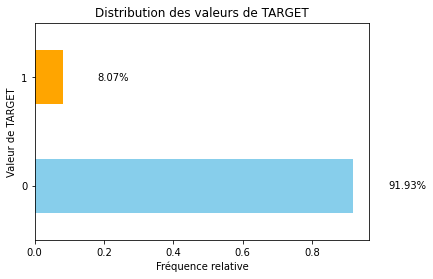

In [43]:
value_counts = application_train['TARGET'].value_counts(normalize=True)

ax = value_counts.plot(kind='barh', color=['skyblue', 'orange'])

plt.title('Distribution des valeurs de TARGET')
plt.ylabel('Valeur de TARGET')
plt.xlabel('Fréquence relative')

for index, value in enumerate(value_counts):
    ax.text(value + 0.100, index, f'{value:.2%}', va='center') 

plt.show()


Il est à noter une présence de classes déséquilibrées. 

Le nombre de prêts remboursés à temps est nettement supérieur à celui des prêts non remboursés. 

<h4>B. Fonctionnalités Financières ( variables quantitatives ) : </h4>

In [44]:
# Liste des variables financières
financial_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

<h5>1. Distribution des Caractéristiques Financières :</h5>

In [45]:
variables_quantitatives = []
variables_qualitatives = []

for colonne in financial_features :
    if application_train[colonne].dtype in ['int64', 'float64']:
        variables_quantitatives.append(colonne)
    elif application_train[colonne].dtype == 'object':
        variables_qualitatives.append(colonne)

print('Variables Quantitatives:', variables_quantitatives)
print('Variables Qualitatives:', variables_qualitatives)

Variables Quantitatives: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
Variables Qualitatives: []


<h6>I. Histogrammes et Diagrammes de Densité : </h6>

Histogrammes et Diagrammes de Densité pour AMT_INCOME_TOTAL:


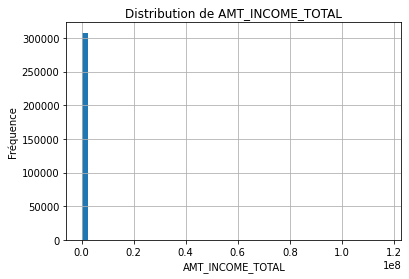

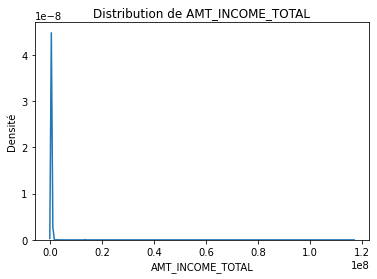

Histogrammes et Diagrammes de Densité pour AMT_CREDIT:


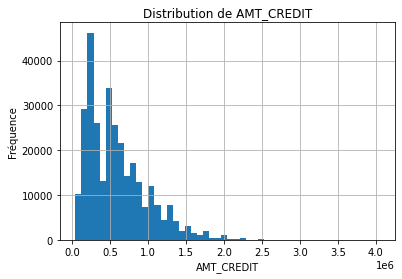

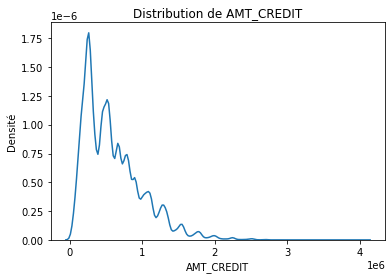

Histogrammes et Diagrammes de Densité pour AMT_ANNUITY:


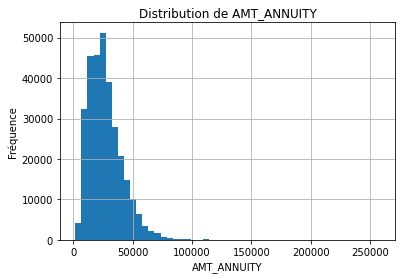

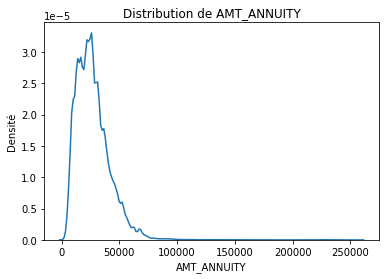

Histogrammes et Diagrammes de Densité pour AMT_GOODS_PRICE:


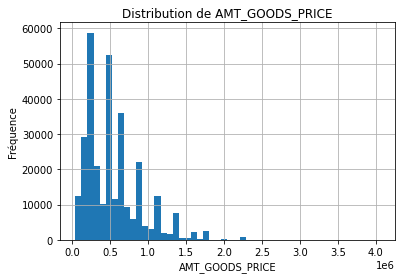

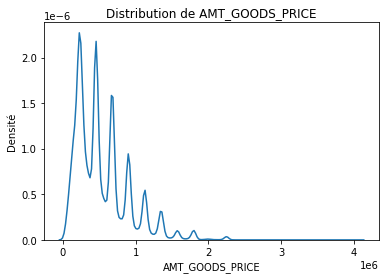

In [46]:
for feature in financial_features:
    print(f'Histogrammes et Diagrammes de Densité pour {feature}:')

    plt.figure()
    application_train[feature].hist(bins=50)
    plt.title(f'Distribution de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fréquence')
    plt.show()

    plt.figure()
    sns.kdeplot(application_train[feature])
    plt.title(f'Distribution de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Densité')
    plt.show()

<h6>II. Boîtes à Moustaches : </h6>

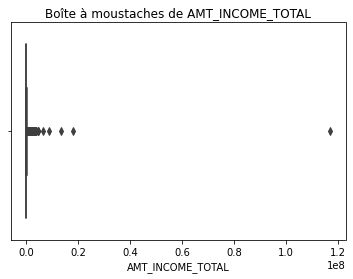

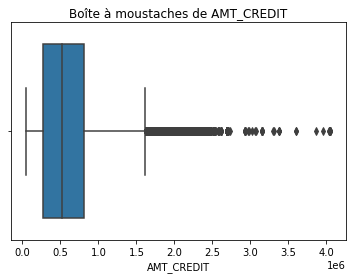

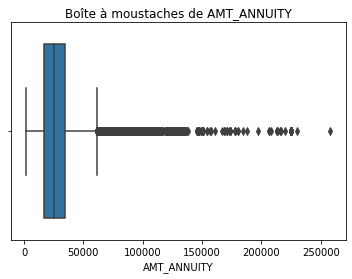

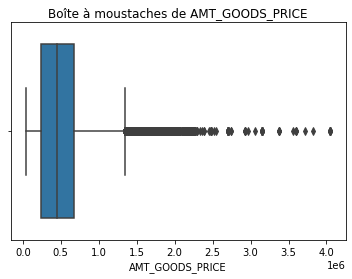

In [47]:
for feature in financial_features:
        plt.figure()
        sns.boxplot(x=application_train[feature])
        plt.title(f'Boîte à moustaches de {feature}')
        plt.xlabel(feature)
        plt.show()

<h6>III. Mesures de Tendance Centrale / Mesures de Dispersion / Mesures de forme </h6>

In [48]:
results_df = pd.DataFrame()

# Boucle sur chaque variable financière
for feature in financial_features:
    #Mesures de Tendance Centrale
    mean_value = application_train[feature].mean()
    median_value = application_train[feature].median()

    #Mesures de Dispersion
    variance_value = application_train[feature].var()
    std_dev_value = application_train[feature].std()
    range_value = application_train[feature].max() - application_train[feature].min()

    #Mesures de forme
    skewness_value = application_train[feature].skew()
    kurtosis_value = application_train[feature].kurt()

    # Création d'un dictionnaire de résultats
    results_dict = {
        'Variable': feature,
        'Moyenne': mean_value,
        'Médiane': median_value,
        'Variance': variance_value,
        'Écart-Type': std_dev_value,
        'Plage': range_value,
        'Asymétrie': skewness_value,
        'Kurtosis': kurtosis_value
    }
    
    # Conversion du dictionnaire en DataFrame et ajout au DataFrame de résultats
    temp_df = pd.DataFrame([results_dict])
    results_df = pd.concat([results_df, temp_df], ignore_index=True)


results_df


Variable        Moyenne   Médiane      Variance     Écart-Type  \
0  AMT_INCOME_TOTAL  168797.919297  147150.0  5.622739e+10  237123.146279   
1        AMT_CREDIT  599025.999706  513531.0  1.619988e+11  402490.776996   
2       AMT_ANNUITY   27108.573909   24903.0  2.100684e+08   14493.737315   
3   AMT_GOODS_PRICE  538396.207429  450000.0  1.364907e+11  369446.460540   

         Plage   Asymétrie       Kurtosis  
0  116974350.0  391.559654  191786.554381  
1    4005000.0    1.234778       1.934041  
2     256410.0    1.579777       7.707320  
3    4009500.0    1.349000       2.431916

<h6>VI. Valeurs Aberrantes : </h6>

* Z-score : Cette méthode est plus efficace si les données suivent une distribution normale ou gaussienne.

* IQR : L'IQR est plus robuste contre les outliers et peut être utilisé dans des distributions non normales.

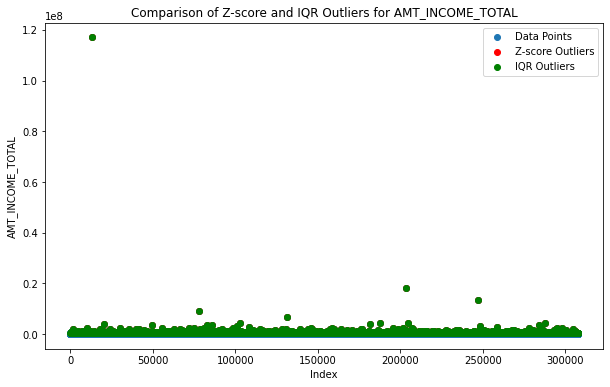

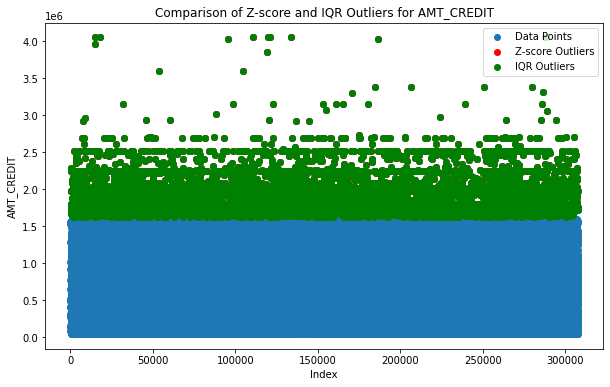

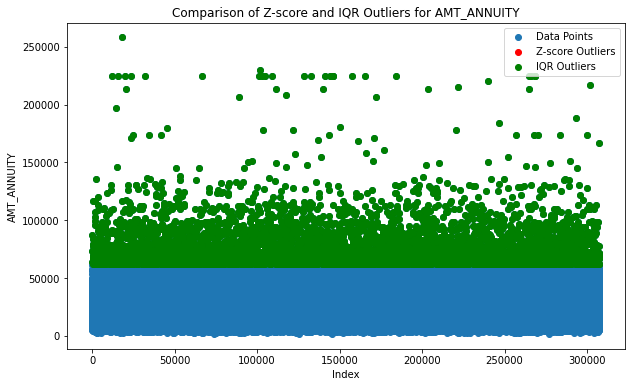

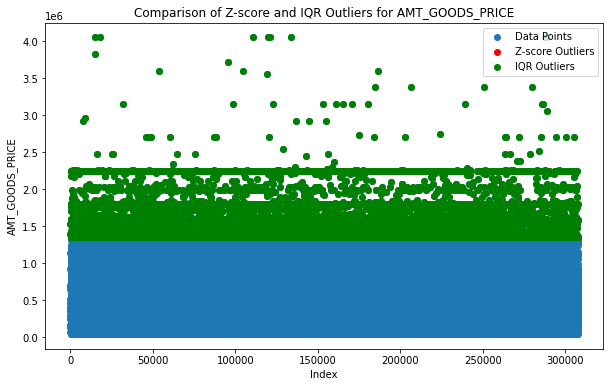

In [49]:
def plot_outliers(feature):
    # Calcul des Z-scores
    z_scores = zscore(application_train[feature])

    # Identifier les valeurs aberrantes avec un seuil de Z-score de 3
    outliers_zscore_indices = np.where(np.abs(z_scores) > 3)

    plt.figure(figsize=(10,6))

    # approche IQR
    Q1 = application_train[feature].quantile(0.25)
    Q3 = application_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr_indices = application_train[(application_train[feature] < (Q1 - 1.5 * IQR)) | 
                                            (application_train[feature] > (Q3 + 1.5 * IQR))].index

    plt.scatter(application_train.index, application_train[feature], label='Data Points')

    #valeurs aberrantes détectées par Z-score
    plt.scatter(outliers_zscore_indices, application_train[feature].iloc[outliers_zscore_indices], color='red', label='Z-score Outliers')

    #valeurs aberrantes détectées par IQR
    plt.scatter(outliers_iqr_indices, application_train[feature].iloc[outliers_iqr_indices], color='green', label='IQR Outliers')

    plt.title(f'Comparison of Z-score and IQR Outliers for {feature}')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

for feature in financial_features:
    plot_outliers(feature)

In [50]:
def calculate_outliers(feature):
    #  Z-scores
    z_scores = zscore(application_train[feature])

    # Identifier les valeurs aberrantes avec un seuil de Z-score de 3
    outliers_zscore_indices = np.where(np.abs(z_scores) > 3)

    #approche IQR
    Q1 = application_train[feature].quantile(0.25)
    Q3 = application_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr_indices = application_train[(application_train[feature] < (Q1 - 1.5 * IQR)) | 
                                            (application_train[feature] > (Q3 + 1.5 * IQR))].index

    # Calcul du nombre d'outliers
    num_outliers_zscore = len(outliers_zscore_indices[0])
    num_outliers_iqr = len(outliers_iqr_indices)

    # Calcul du pourcentage d'outliers
    total_data_points = len(application_train[feature])
    percentage_outliers_zscore = (num_outliers_zscore / total_data_points) * 100
    percentage_outliers_iqr = (num_outliers_iqr / total_data_points) * 100

    # Retourner un dictionnaire des résultats
    return {
        'Variable': feature,
        'Nombre d\'outliers détectés par Z-score': num_outliers_zscore,
        'Pourcentage d\'outliers détectés par Z-score': percentage_outliers_zscore,
        'Nombre d\'outliers détectés par IQR': num_outliers_iqr,
        'Pourcentage d\'outliers détectés par IQR': percentage_outliers_iqr
    }

outliers_results = []

for feature in financial_features:
    outliers_results.append(calculate_outliers(feature))

# Conversion en df
outliers_df = pd.DataFrame(outliers_results)
outliers_df

Variable  Nombre d'outliers détectés par Z-score  \
0  AMT_INCOME_TOTAL                                     454   
1        AMT_CREDIT                                    3255   
2       AMT_ANNUITY                                       0   
3   AMT_GOODS_PRICE                                       0   

   Pourcentage d'outliers détectés par Z-score  \
0                                     0.147637   
1                                     1.058499   
2                                     0.000000   
3                                     0.000000   

   Nombre d'outliers détectés par IQR  Pourcentage d'outliers détectés par IQR  
0                               14035                                 4.564064  
1                                6562                                 2.133907  
2                                7504                                 2.440238  
3                               14728                                 4.789422

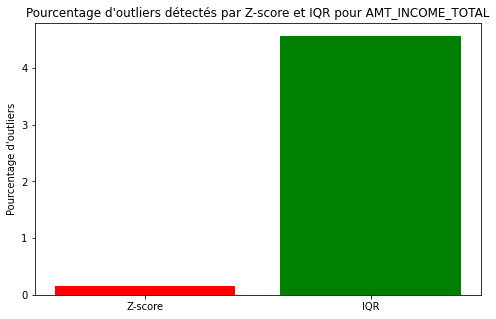

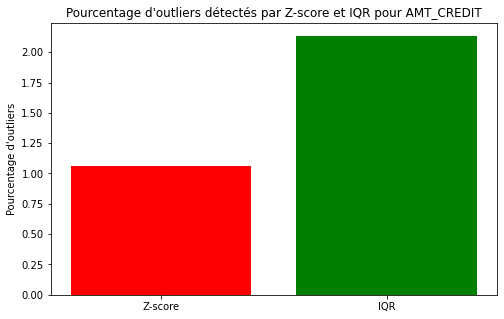

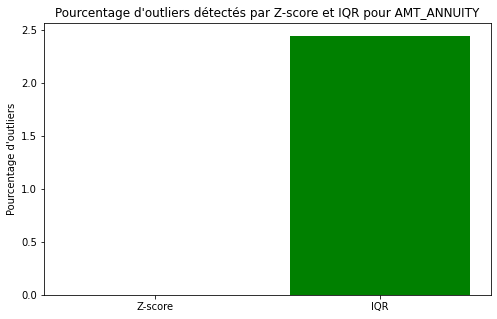

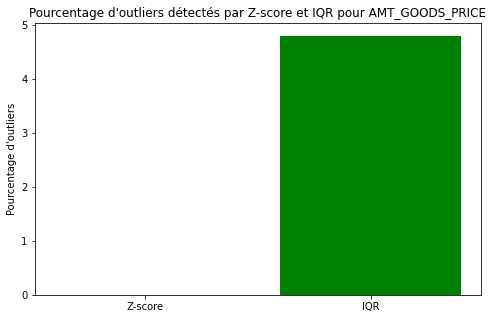

In [51]:
def plot_outliers_percentage(feature):
    # Z-scores
    z_scores = zscore(application_train[feature])

    # Identifier les valeurs aberrantes avec un seuil de Z-score de 3
    outliers_zscore_indices = np.where(np.abs(z_scores) > 3)

    #approche IQR
    Q1 = application_train[feature].quantile(0.25)
    Q3 = application_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr_indices = application_train[(application_train[feature] < (Q1 - 1.5 * IQR)) | 
                                            (application_train[feature] > (Q3 + 1.5 * IQR))].index

    # Calcul outliers
    num_outliers_zscore = len(outliers_zscore_indices[0])
    num_outliers_iqr = len(outliers_iqr_indices)

    
    total_data_points = len(application_train[feature])
    percentage_outliers_zscore = (num_outliers_zscore / total_data_points) * 100
    percentage_outliers_iqr = (num_outliers_iqr / total_data_points) * 100

    labels = ['Z-score', 'IQR']
    percentages = [percentage_outliers_zscore, percentage_outliers_iqr]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, percentages, color=['red', 'green'])
    plt.title(f'Pourcentage d\'outliers détectés par Z-score et IQR pour {feature}')
    plt.ylabel('Pourcentage d\'outliers')
    plt.show()

for feature in financial_features:
    plot_outliers_percentage(feature)

<h6>VII. Tests statistiques  : </h6>

<img src="./tests_statistiques.png"/>

In [52]:
def test_normality(feature):
    # Niveau de signification (alpha)
    alpha = 0.05

    
    results = []

    # Récupérer les valeurs de la variable
    values = application_train[feature].dropna()

    # Effectuer les tests de normalité
    ks_test = kstest(values, 'norm')
    ad_test = anderson(values, dist='norm')
    dagostino_test = normaltest(values)

    # Ajout des résultats à la liste
    results.extend([
        {
            'Variable': feature,
            'Nom du test': 'Kolmogorov-Smirnov',
            'Statistique de test': ks_test.statistic,
            'p-valeur': ks_test.pvalue,
            'Normalité': 'Oui' if ks_test.pvalue > alpha else 'Non'
        },
        {
            'Variable': feature,
            'Nom du test': 'Anderson-Darling',
            'Statistique de test': ad_test.statistic,
            'p-valeur': None,
            'Normalité': 'Oui' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'Non'
        },
        {
            'Variable': feature,
            'Nom du test': "D'Agostino-Pearson",
            'Statistique de test': dagostino_test.statistic,
            'p-valeur': dagostino_test.pvalue,
            'Normalité': 'Oui' if dagostino_test.pvalue > alpha else 'Non'
        }
    ])

    return results

# Liste globale pour stocker les résultats de toutes les variables
all_results = []


for feature in financial_features:
    all_results.extend(test_normality(feature))

# Création d'un df de reesultats
test_results = pd.DataFrame(all_results)

test_results

Variable         Nom du test  Statistique de test  p-valeur  \
0   AMT_INCOME_TOTAL  Kolmogorov-Smirnov         1.000000e+00       0.0   
1   AMT_INCOME_TOTAL    Anderson-Darling         4.982168e+04       NaN   
2   AMT_INCOME_TOTAL  D'Agostino-Pearson         1.808235e+06       0.0   
3         AMT_CREDIT  Kolmogorov-Smirnov         1.000000e+00       0.0   
4         AMT_CREDIT    Anderson-Darling         7.249390e+03       NaN   
5         AMT_CREDIT  D'Agostino-Pearson         6.301057e+04       0.0   
6        AMT_ANNUITY  Kolmogorov-Smirnov         1.000000e+00       0.0   
7        AMT_ANNUITY    Anderson-Darling         4.120364e+03       NaN   
8        AMT_ANNUITY  D'Agostino-Pearson         1.139425e+05       0.0   
9    AMT_GOODS_PRICE  Kolmogorov-Smirnov         1.000000e+00       0.0   
10   AMT_GOODS_PRICE    Anderson-Darling         8.901415e+03       NaN   
11   AMT_GOODS_PRICE  D'Agostino-Pearson         7.314246e+04       0.0   

   Normalité  
0        Non  
1        Non  
2        Non  
3        Non  
4        Non  
5        Non  
6        Non  
7        Non  
8        Non  
9        Non  
10       Non  
11       Non

Les résultats des tests statistiques obtenus indiquent que la distribution des quatre variables financières `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, et `AMT_GOODS_PRICE` n'est pas normale. 

Chaque variable a montré une p-valeur de 0.0 pour les tests de Kolmogorov-Smirnov et D'Agostino-Pearson, et une statistique de test élevée pour le test Anderson-Darling, bien que la p-valeur ne soit pas calculée pour ce dernier. 

Ces résultats suggèrent que les distributions de ces variables sont significativement éloignées d'une distribution normale (gaussienne).

In [53]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

# Suppression des outliers
application_train_cleaned = remove_outliers_iqr(application_train, financial_features)

# Statistiques descriptives avant et après la suppression
desc_stats_before = application_train.describe().transpose()
desc_stats_after = application_train_cleaned.describe().transpose()

# Fusion des statistiques descriptives dans un df
comparison_df = pd.concat([desc_stats_before.add_suffix('_before'), desc_stats_after.add_suffix('_after')], axis=1)
comparison_df

count_before    mean_before     std_before  \
SK_ID_CURR                      307511.0  278180.518577  102790.175348   
TARGET                          307511.0       0.080729       0.272419   
CNT_CHILDREN                    307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL                307511.0  168797.919297  237123.146279   
AMT_CREDIT                      307511.0  599025.999706  402490.776996   
...                                  ...            ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY       265992.0       0.007000       0.110757   
AMT_REQ_CREDIT_BUREAU_WEEK      265992.0       0.034362       0.204685   
AMT_REQ_CREDIT_BUREAU_MON       265992.0       0.267395       0.916002   
AMT_REQ_CREDIT_BUREAU_QRT       265992.0       0.265474       0.794056   
AMT_REQ_CREDIT_BUREAU_YEAR      265992.0       1.899974       1.869295   

                            min_before  25%_before  50%_before  75%_before  \
SK_ID_CURR                    100002.0    189145.5    278202.0    367142.5   
TARGET                             0.0         0.0         0.0         0.0   
CNT_CHILDREN                       0.0         0.0         0.0         1.0   
AMT_INCOME_TOTAL               25650.0    112500.0    147150.0    202500.0   
AMT_CREDIT                     45000.0    270000.0    513531.0    808650.0   
...                                ...         ...         ...         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_WEEK         0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_MON          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_QRT          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_YEAR         0.0         0.0         1.0         3.0   

                             max_before  count_after     mean_after  \
SK_ID_CURR                     456255.0     280858.0  278183.076736   
TARGET                              1.0     280858.0       0.083248   
CNT_CHILDREN                       19.0     280858.0       0.414163   
AMT_INCOME_TOTAL            117000000.0     280858.0  151308.973070   
AMT_CREDIT                    4050000.0     280858.0  541660.818636   
...                                 ...          ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY           9.0     242313.0       0.006974   
AMT_REQ_CREDIT_BUREAU_WEEK          8.0     242313.0       0.034026   
AMT_REQ_CREDIT_BUREAU_MON          27.0     242313.0       0.256412   
AMT_REQ_CREDIT_BUREAU_QRT         261.0     242313.0       0.263102   
AMT_REQ_CREDIT_BUREAU_YEAR         25.0     242313.0       1.910950   

                                std_after  min_after  25%_after  50%_after  \
SK_ID_CURR                  102796.889497   100002.0   189106.5   278228.5   
TARGET                           0.276258        0.0        0.0        0.0   
CNT_CHILDREN                     0.720319        0.0        0.0        0.0   
AMT_INCOME_TOTAL             62473.968682    25650.0   112500.0   135000.0   
AMT_CREDIT                  331592.420637    45000.0   269982.0   481495.5   
...                                   ...        ...        ...        ...   
AMT_REQ_CREDIT_BUREAU_DAY        0.110229        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_WEEK       0.203234        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_MON        0.887695        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_QRT        0.612131        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_YEAR       1.872412        0.0        0.0        1.0   

                            75%_after  max_after  
SK_ID_CURR                  367015.75   456255.0  
TARGET                           0.00        1.0  
CNT_CHILDREN                     1.00       19.0  
AMT_INCOME_TOTAL            180000.00   337500.0  
AMT_CREDIT                  755190.00  1569042.0  
...                               ...        ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.00        9.0  
AMT_

<h6>IIX. Statistiques Descriptives : </h6>

In [54]:
financial_features = application_train[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]
financial_descriptive_stats = financial_features.describe()
print(financial_descriptive_stats)

       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06


<h4>C. Fonctionnalités Caractéristiques Démographiques : </h4>

<h5>1. Distribution des Caractéristiques Démographiques :</h5>

In [55]:
Demographic_Characteristics = ['CODE_GENDER','DAYS_BIRTH','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

In [56]:
variables_quantitatives = []
variables_qualitatives = []

# Classification des variables
for colonne in Demographic_Characteristics :
    if application_train[colonne].dtype in ['int64', 'float64']:
        variables_quantitatives.append(colonne)
    elif application_train[colonne].dtype == 'object':
        variables_qualitatives.append(colonne)

print('Variables Quantitatives:', variables_quantitatives)
print('Variables Qualitatives:', variables_qualitatives)

Variables Quantitatives: ['DAYS_BIRTH']
Variables Qualitatives: ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']


<h6>A. Variables Qualitatives : </h6>

<h7>I. Représentation de la Distribution Empirique : </h7>

In [57]:
# Création d'une fonction pour obtenir la distribution empirique
def get_empirical_distribution(feature):
    # Calcul des effectifs pour chaque modalité
    effectifs = application_train[feature].value_counts()
    # Calcul des fréquences
    frequences = application_train[feature].value_counts(normalize=True)
    # Création du df de resultats
    distribution_df = pd.DataFrame({
        'Modalité': effectifs.index,
        'Effectifs': effectifs.values,
        'Fréquence': frequences.values
    })
    # Tri du drf par modalité
    distribution_df = distribution_df.sort_values(by='Modalité')
    return distribution_df

# Liste des variables qualitatives
qualitative_features = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

#distribution empirique pour chaque variable qualitative
for feature in qualitative_features:
    distribution_df = get_empirical_distribution(feature)
    display(f"Représentation de la Distribution Empirique pour {feature} :")
    display(distribution_df)

'Représentation de la Distribution Empirique pour CODE_GENDER :'

Modalité  Effectifs  Fréquence
0        F     202448   0.658344
1        M     105059   0.341643
2      XNA          4   0.000013

'Représentation de la Distribution Empirique pour NAME_EDUCATION_TYPE :'

Modalité  Effectifs  Fréquence
4                Academic degree        164   0.000533
1               Higher education      74863   0.243448
2              Incomplete higher      10277   0.033420
3                Lower secondary       3816   0.012409
0  Secondary / secondary special     218391   0.710189

'Représentation de la Distribution Empirique pour NAME_FAMILY_STATUS :'

Modalité  Effectifs  Fréquence
2        Civil marriage      29775   0.096826
0               Married     196432   0.638780
3             Separated      19770   0.064290
1  Single / not married      45444   0.147780
5               Unknown          2   0.000007
4                 Widow      16088   0.052317

'Représentation de la Distribution Empirique pour NAME_HOUSING_TYPE :'

Modalité  Effectifs  Fréquence
5      Co-op apartment       1122   0.003649
0    House / apartment     272868   0.887344
2  Municipal apartment      11183   0.036366
4     Office apartment       2617   0.008510
3     Rented apartment       4881   0.015873
1         With parents      14840   0.048258

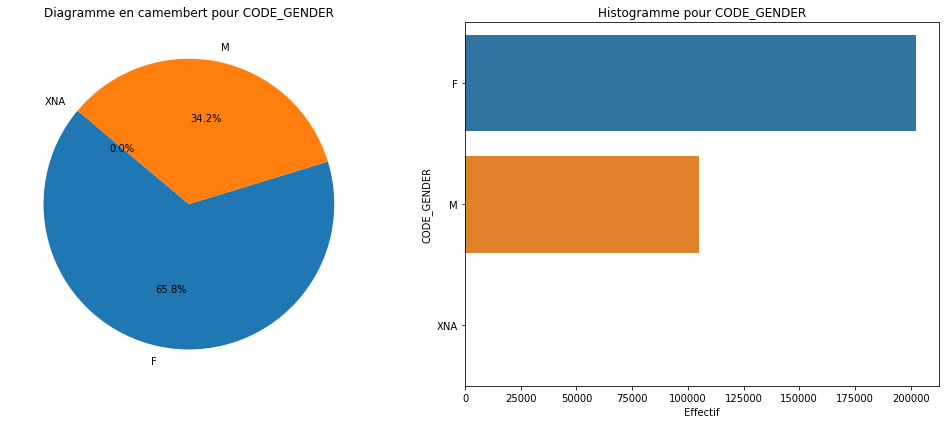

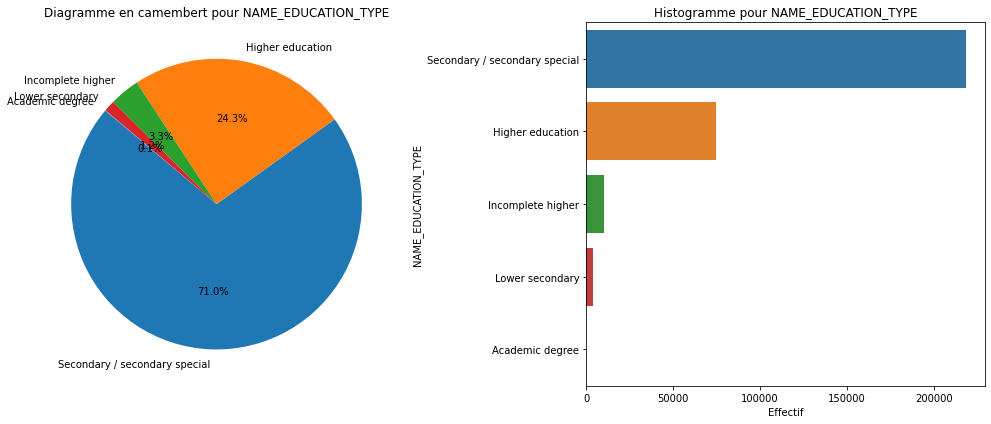

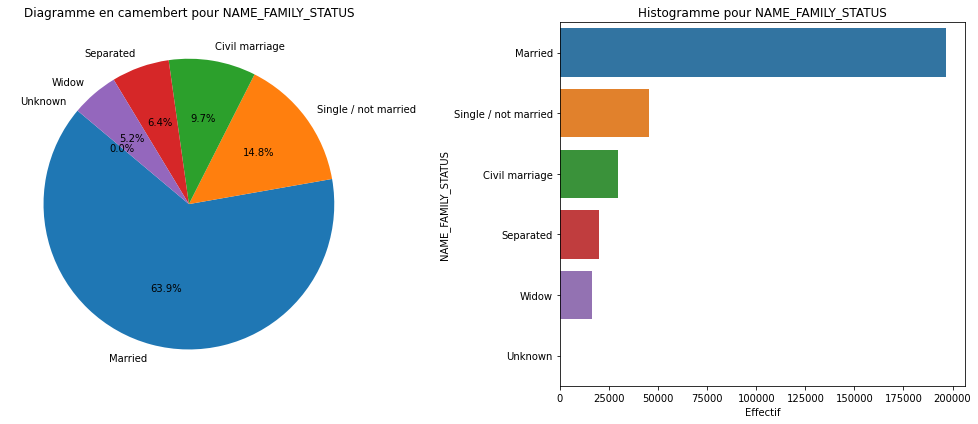

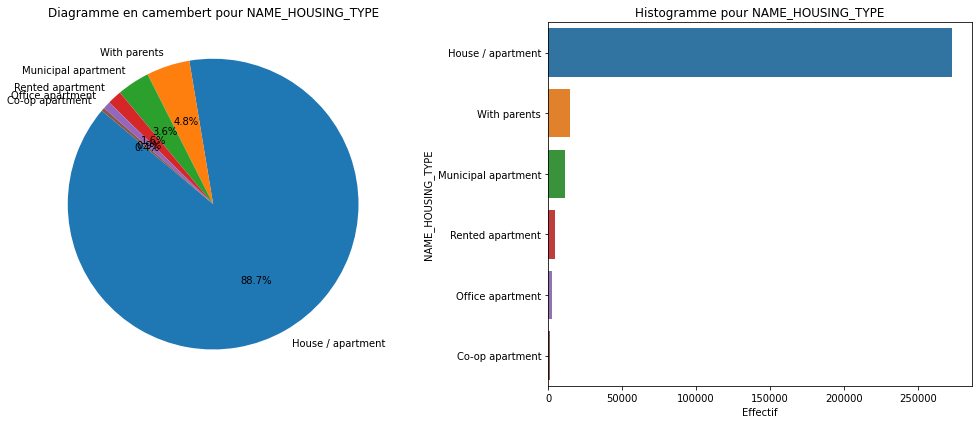

In [58]:
# Fonction pour tracer un diagramme en camembert et un histogramme pour une caractéristique donnée
def plot_distribution(feature):
    data = application_train[feature].value_counts()
    
    # Diagramme en camembert
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.pie(data, labels = data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Diagramme en camembert pour {feature}')
    
    # Histogramme
    plt.subplot(1, 2, 2)
    sns.countplot(y=application_train[feature], order = data.index)
    plt.title(f'Histogramme pour {feature}')
    plt.xlabel('Effectif')
    plt.ylabel(feature)
    
    plt.tight_layout()
    plt.show()

for feature in qualitative_features:
    plot_distribution(feature)

<h6>B. Variables Quantitatives : </h6>

<h7>1. Histogrammes et Diagrammes de Densité :</h7>

Histogrammes et Diagrammes de Densité pour DAYS_BIRTH:


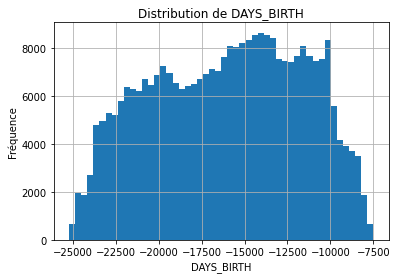

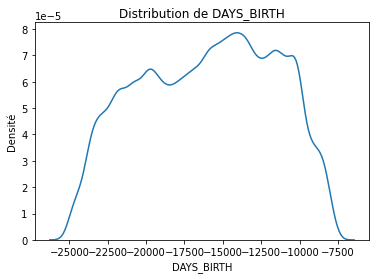

In [59]:
# Variable quantitative
quantitative_feature = 'DAYS_BIRTH'

print(f'Histogrammes et Diagrammes de Densité pour {quantitative_feature}:')

plt.figure()
application_train[quantitative_feature].hist(bins=50)
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Fréquence')
plt.show()

plt.figure()
sns.kdeplot(application_train[quantitative_feature])
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Densité')
plt.show()

<h7>2. Boîtes à Moustaches :</h7>

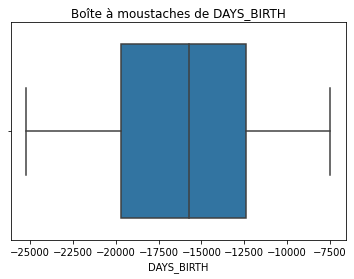

In [60]:
plt.figure()
sns.boxplot(x=application_train[quantitative_feature])
plt.title(f'Boîte à moustaches de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.show()

<h7>3. Mesures de Tendance Centrale / Mesures de Dispersion / Mesures de forme :</h7>

In [61]:
results_df = pd.DataFrame()

# Spécification de la variable quantitative
quantitative_feature = 'DAYS_BIRTH'

#Mesures de Tendance Centrale
mean_value = application_train[quantitative_feature].mean()
median_value = application_train[quantitative_feature].median()

# Mesures de Dispersion
variance_value = application_train[quantitative_feature].var()
std_dev_value = application_train[quantitative_feature].std()
range_value = application_train[quantitative_feature].max() - application_train[quantitative_feature].min()

# Mesures de forme
skewness_value = application_train[quantitative_feature].skew()
kurtosis_value = application_train[quantitative_feature].kurt()

# dictionnaire avec les resultas
results_dict = {
    'Variable': quantitative_feature,
    'Moyenne': mean_value,
    'Médiane': median_value,
    'Variance': variance_value,
    'Écart-Type': std_dev_value,
    'Plage': range_value,
    'Asymétrie': skewness_value,
    'Kurtosis': kurtosis_value
}

# Conversion du dictionnaire en df
temp_df = pd.DataFrame([results_dict])
results_df = pd.concat([results_df, temp_df], ignore_index=True)
results_df


Variable       Moyenne  Médiane      Variance   Écart-Type  Plage  \
0  DAYS_BIRTH -16036.995067 -15750.0  1.904440e+07  4363.988632  17740   

   Asymétrie  Kurtosis  
0  -0.115673 -1.049126

<h7>3. Valeurs Aberrantes :</h7>

La plage d'âge choisie, 18 à 122 ans, repose sur des justifications rationnelles et empiriques. 

L'âge de 18 ans est généralement reconnu comme l'âge de la majorité dans de nombreux pays, ce qui signifie que les individus sont juridiquement considérés comme des adultes et sont autorisés à engager des contrats, y compris des contrats de prêt. 

Cela en fait une limite inférieure logique pour l'âge des emprunteurs dans l'analyse des données.

D'autre part, l'âge de 122 ans a été choisi comme limite supérieure en se basant sur l'âge du doyen de l'humanité, Jeanne Calment. 

Cet âge est un repère historique et biologique qui représente une estimation raisonnable de la limite supérieure de la longévité humaine.

En fixant cette limite supérieure, on s'assure que l'analyse inclut toutes les tranches d'âge possibles tout en éliminant les valeurs aberrantes qui pourraient résulter d'erreurs de saisie ou de données incorrectes.

In [62]:
# Définition des limites d'âge
age_min = 18
age_max = 122

# Identification des valeurs aberrantes
outliers = application_train[(application_train['DAYS_BIRTH'] < age_min) | (application_train['DAYS_BIRTH'] > age_max)]

# Comptage des valeurs aberrantes
num_outliers = len(outliers)

# Affichage du nombre de valeurs aberrantes
print(f'Nombre de valeurs aberrantes : {num_outliers}')

if num_outliers > 0:
    print('Valeurs aberrantes :')
    display(outliers)

Nombre de valeurs aberrantes : 307511
Valeurs aberrantes :


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

<h4>D. Historique de l'Emploi : </h4>

In [63]:
# Liste des variables financières
employment_history = ['DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

<h5>1. Distribution d'emploi :</h5>

In [64]:
variables_quantitatives = []
variables_qualitatives = []

for colonne in employment_history :
    if application_train[colonne].dtype in ['int64', 'float64']:
        variables_quantitatives.append(colonne)
    elif application_train[colonne].dtype == 'object':
        variables_qualitatives.append(colonne)

print('Variables Quantitatives:', variables_quantitatives)
print('Variables Qualitatives:', variables_qualitatives)

Variables Quantitatives: ['DAYS_EMPLOYED']
Variables Qualitatives: ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


<h6>A. Variables Qualitatives : </h6>

<h7>I. Représentation de la Distribution Empirique : </h7>

In [65]:
# Création d'une fonction pour obtenir la distribution empirique
def get_empirical_distribution(feature):
    # Calcul des effectifs
    effectifs = application_train[feature].value_counts()
    # Calcul des fréquences
    frequences = application_train[feature].value_counts(normalize=True)
    # Création du df
    distribution_df = pd.DataFrame({
        'Modalité': effectifs.index,
        'Effectifs': effectifs.values,
        'Fréquence': frequences.values
    })
    # Tri du df
    distribution_df = distribution_df.sort_values(by='Modalité')
    return distribution_df

# Liste des variables qualitatives
qualitative_features = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

for feature in qualitative_features:
    distribution_df = get_empirical_distribution(feature)
    display(f"Représentation de la Distribution Empirique pour {feature} :")
    display(distribution_df)

'Représentation de la Distribution Empirique pour OCCUPATION_TYPE :'

Modalité  Effectifs  Fréquence
6             Accountants       9813   0.046481
10         Cleaning staff       4653   0.022040
9           Cooking staff       5946   0.028164
2              Core staff      27570   0.130589
4                 Drivers      18603   0.088116
16               HR staff        563   0.002667
5   High skill tech staff      11380   0.053903
17               IT staff        526   0.002491
0                Laborers      55186   0.261396
12     Low-skill Laborers       2093   0.009914
3                Managers      21371   0.101227
7          Medicine staff       8537   0.040437
11  Private service staff       2652   0.012562
15          Realty agents        751   0.003557
1             Sales staff      32102   0.152056
14            Secretaries       1305   0.006181
8          Security staff       6721   0.031835
13   Waiters/barmen staff       1348   0.006385

'Représentation de la Distribution Empirique pour ORGANIZATION_TYPE :'

Modalité  Effectifs  Fréquence
42             Advertising        429   0.001395
21             Agriculture       2454   0.007980
20                    Bank       2507   0.008153
11  Business Entity Type 1       5984   0.019459
5   Business Entity Type 2      10553   0.034317
0   Business Entity Type 3      67992   0.221104
49                Cleaning        260   0.000845
10            Construction       6721   0.021856
44                 Culture        379   0.001232
34             Electricity        950   0.003089
40               Emergency        560   0.001821
6               Government      10404   0.033833
33                   Hotel        966   0.003141
17                 Housing       2958   0.009619
32        Industry: type 1       1039   0.003379
52       Industry: type 10        109   0.000354
18       Industry: type 11       2704   0.008793
45       Industry: type 12        369   0.001200
54       Industry: type 13         67   0.000218
41        Industry: type 2        458   0.001489
15        Industry: type 3       3278   0.010660
35        Industry: type 4        877   0.002852
37        Industry: type 5        599   0.001948
51        Industry: type 6        112   0.000364
30        Industry: type 7       1307   0.004250
57        Industry: type 8         24   0.000078
14        Industry: type 9       3368   0.010952
38               Insurance        597   0.001941
9             Kindergarten       6880   0.022373
48          Legal Services        305   0.000992
4                 Medicine      11193   0.036399
19                Military       2634   0.008566
47                  Mobile        317   0.001031
3                    Other      16683   0.054252
22                  Police       2341   0.007613
24                  Postal       2157   0.007014
43                 Realtor        396   0.001288
53                Religion         85   0.000276
27              Restaurant       1811   0.005889
7                   School       8893   0.028919
16                Security       3247   0.010559
25     Security Ministries       1974   0.006419
2            Self-employed      38412   0.124913
28                Services       1575   0.005122
39                 Telecom        577   0.001876
46           Trade: type 1        348   0.001132
26           Trade: type 2       1900   0.006179
13           Trade: type 3       3492   0.011356
55           Trade: type 4         64   0.000208
56           Trade: type 5         49   0.000159
36           Trade: type 6        631   0.002052
8            Trade: type 7       7831   0.025466
50       Transport: type 1        201   0.000654
23       Transport: type 2       2204   0.007167
31       Transport: type 3       1187   0.003860
12       Transport: type 4       5398   0.017554
29              University       1327   0.004315
1                      XNA      55374   0.180072

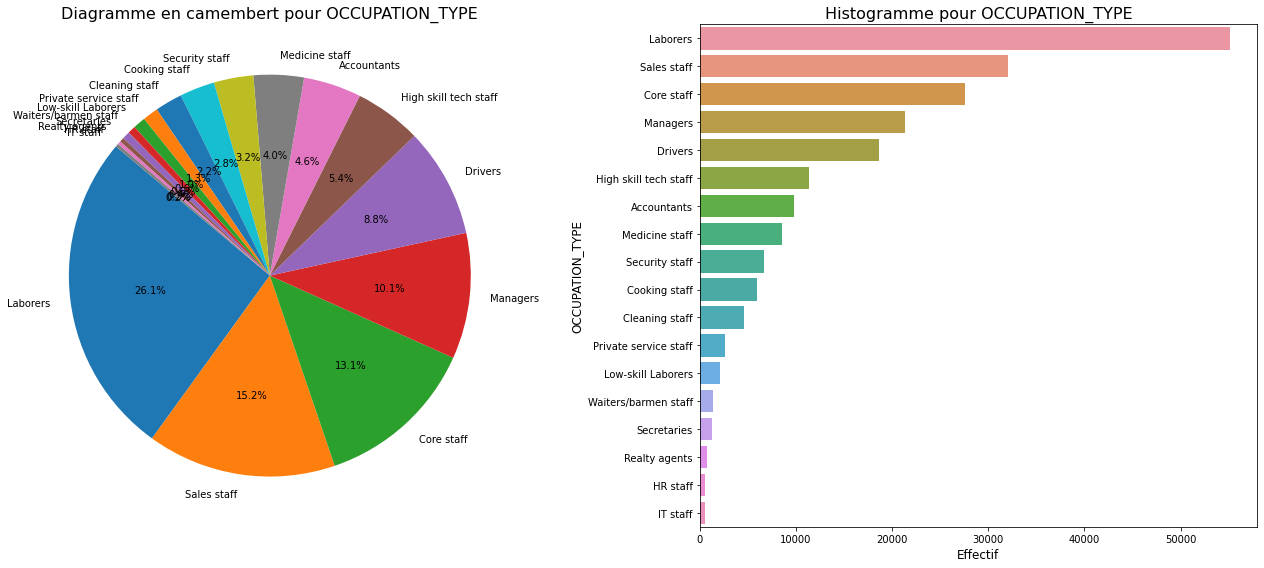

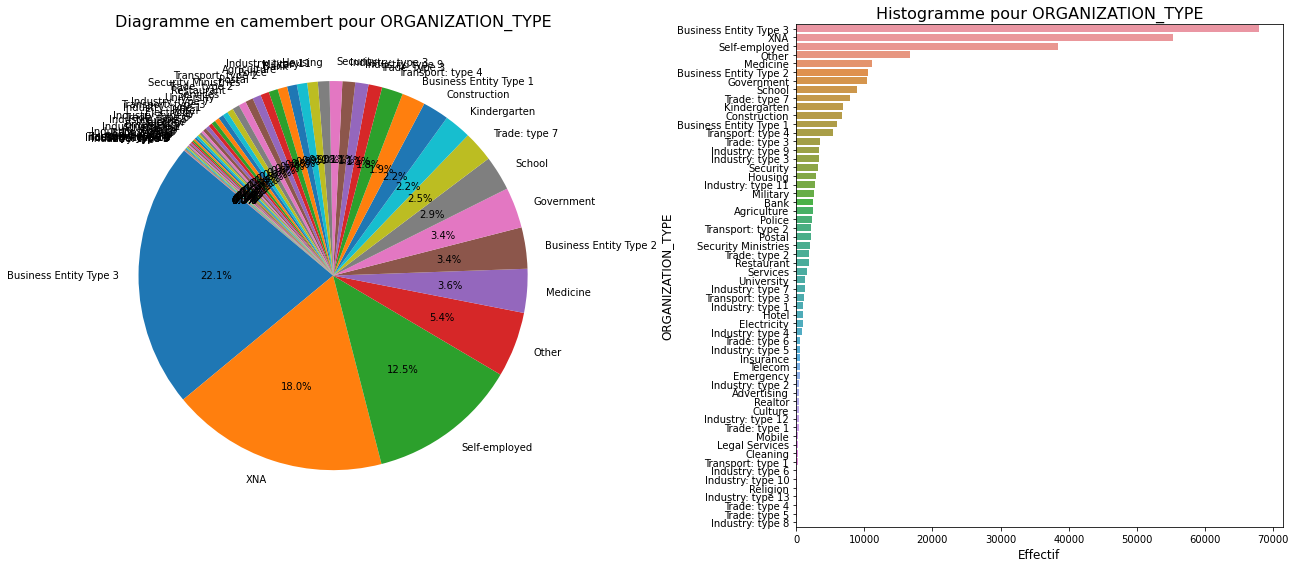

In [66]:
# Fonction pour tracer un diagramme en camembert et un histogramme pour une caractéristique donnée
def plot_distribution(feature):
    data = application_train[feature].value_counts()
    
    # Diagramme en camembert
    plt.figure(figsize=(18, 8))
    plt.subplot(1, 2, 1)
    plt.pie(data, labels = data.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
    plt.title(f'Diagramme en camembert pour {feature}', fontsize=16)
    
    # Histogramme
    plt.subplot(1, 2, 2)
    sns.countplot(y=application_train[feature], order = data.index)
    plt.title(f'Histogramme pour {feature}', fontsize=16)
    plt.xlabel('Effectif', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.tight_layout()
    plt.show()

for feature in qualitative_features:
    plot_distribution(feature)

In [67]:
# Liste des variables qualitatives
qualitative_features = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

percentages_df = pd.DataFrame()

# Boucle sur chaque variable qualitative
for feature in qualitative_features:
    # Calcul des pourcentages
    percentages = application_train[feature].value_counts(normalize=True) * 100
    # Conversion en df
    temp_df = percentages.reset_index()
    # Renommage des colonnes
    temp_df.columns = [feature, 'Pourcentage']
    percentages_df = pd.concat([percentages_df, temp_df], axis=1)

percentages_df

CODE_GENDER  Pourcentage            NAME_EDUCATION_TYPE  Pourcentage  \
0           F    65.834393  Secondary / secondary special    71.018923   
1           M    34.164306               Higher education    24.344820   
2         XNA     0.001301              Incomplete higher     3.341994   
3         NaN          NaN                Lower secondary     1.240931   
4         NaN          NaN                Academic degree     0.053331   
5         NaN          NaN                            NaN          NaN   

     NAME_FAMILY_STATUS  Pourcentage    NAME_HOUSING_TYPE  Pourcentage  
0               Married    63.878040    House / apartment    88.734387  
1  Single / not married    14.778008         With parents     4.825844  
2        Civil marriage     9.682580  Municipal apartment     3.636618  
3             Separated     6.429038     Rented apartment     1.587260  
4                 Widow     5.231683     Office apartment     0.851026  
5               Unknown     0.000650      Co-op apartment     0.364865

<h6>B. Variables Quantitatives : </h6>

Histogrammes et Diagrammes de Densité pour DAYS_EMPLOYED:


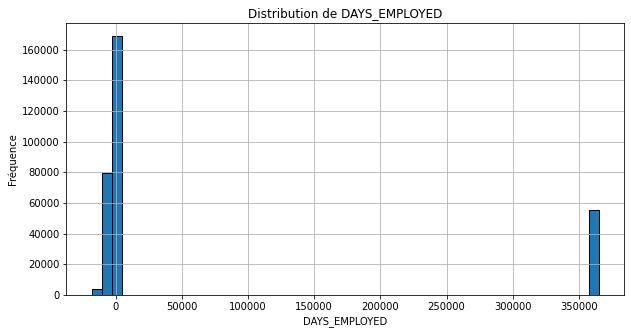

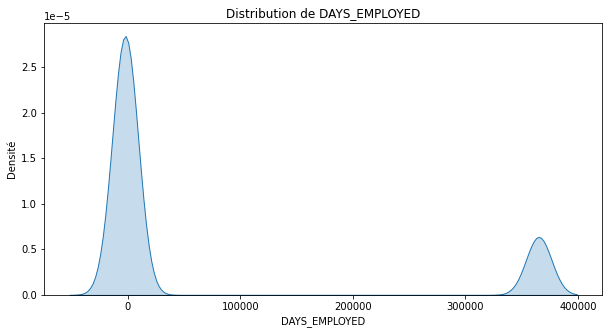

In [68]:
# Variable quantitative
quantitative_feature = 'DAYS_EMPLOYED'

print(f'Histogrammes et Diagrammes de Densité pour {quantitative_feature}:')

# Histogrammes et Diagrammes de Densité
plt.figure(figsize=(10, 5))
application_train[quantitative_feature].hist(bins=50, edgecolor='black')
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Fréquence')
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(application_train[quantitative_feature].dropna(), shade=True)  # Assurez-vous d'éliminer les NaN
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Densité')
plt.show()

<h7>2. Boîtes à Moustaches :</h7>

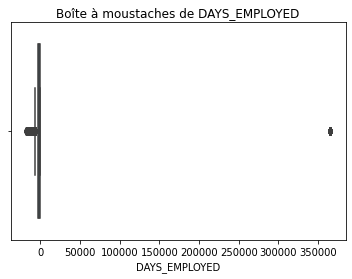

In [69]:
plt.figure()
sns.boxplot(x=application_train[quantitative_feature])
plt.title(f'Boîte à moustaches de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.show()

<h7>3. Mesures de Tendance Centrale / Mesures de Dispersion / Mesures de forme :</h7>

In [70]:
results_df = pd.DataFrame()

#Tendance Centrale
mean_value = application_train[quantitative_feature].mean()
median_value = application_train[quantitative_feature].median()

# Mesures de Dispersion
variance_value = application_train[quantitative_feature].var()
std_dev_value = application_train[quantitative_feature].std()
range_value = application_train[quantitative_feature].max() - application_train[quantitative_feature].min()

# Mesures de forme
skewness_value = application_train[quantitative_feature].skew()
kurtosis_value = application_train[quantitative_feature].kurt()

results_dict = {
    'Variable': quantitative_feature,
    'Moyenne': mean_value,
    'Médiane': median_value,
    'Variance': variance_value,
    'Écart-Type': std_dev_value,
    'Plage': range_value,
    'Asymétrie': skewness_value,
    'Kurtosis': kurtosis_value
}


temp_df = pd.DataFrame([results_dict])
results_df = pd.concat([results_df, temp_df], ignore_index=True)
results_df

Variable       Moyenne  Médiane      Variance     Écart-Type   Plage  \
0  DAYS_EMPLOYED  63815.045904  -1213.0  1.995884e+10  141275.766519  383155   

   Asymétrie  Kurtosis  
0   1.664346  0.771612

<h7>4. Valeurs Aberrantes :</h7>

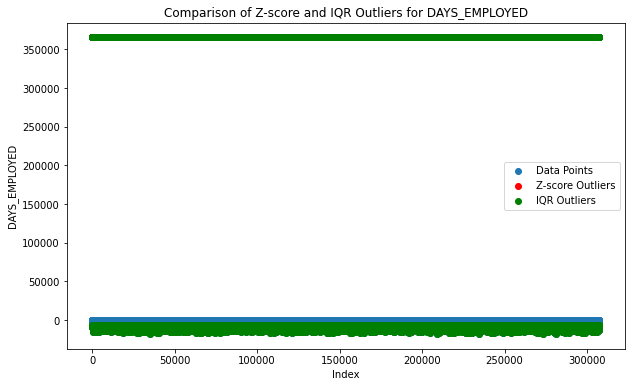

In [71]:
plot_outliers(quantitative_feature)

In [72]:
calculate_outliers(quantitative_feature)

{'Variable': 'DAYS_EMPLOYED',
 "Nombre d'outliers détectés par Z-score": 0,
 "Pourcentage d'outliers détectés par Z-score": 0.0,
 "Nombre d'outliers détectés par IQR": 72217,
 "Pourcentage d'outliers détectés par IQR": 23.484363160992615}

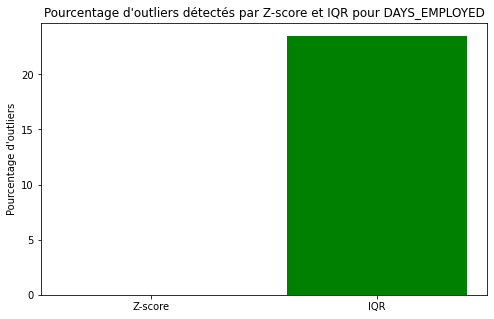

In [73]:
plot_outliers_percentage(quantitative_feature)

<h7>5. Tests statistiques :</h7>

In [74]:
test_normality(quantitative_feature)

[{'Variable': 'DAYS_EMPLOYED',
  'Nom du test': 'Kolmogorov-Smirnov',
  'Statistique de test': 0.8198890831595893,
  'p-valeur': 0.0,
  'Normalité': 'Non'},
 {'Variable': 'DAYS_EMPLOYED',
  'Nom du test': 'Anderson-Darling',
  'Statistique de test': 82752.88043905934,
  'p-valeur': None,
  'Normalité': 'Non'},
 {'Variable': 'DAYS_EMPLOYED',
  'Nom du test': "D'Agostino-Pearson",
  'Statistique de test': 76992.59545700082,
  'p-valeur': 0.0,
  'Normalité': 'Non'}]

Les tests de normalité Kolmogorov-Smirnov, Anderson-Darling, et D'Agostino-Pearson ont été appliqués sur la variable `DAYS_EMPLOYED`, et tous concluent à une non-normalité de la distribution de cette variable.

In [75]:
# Appel de la fonction remove_outliers_iqr
application_train_cleaned = remove_outliers_iqr(application_train, ['DAYS_EMPLOYED'])

# Statistiques descriptives avant et après la suppression des outliers
desc_stats_before = application_train.describe().transpose()
desc_stats_after = application_train_cleaned.describe().transpose()

# Fusion 
comparison_df = pd.concat([desc_stats_before.add_suffix('_before'), desc_stats_after.add_suffix('_after')], axis=1)
comparison_df

count_before    mean_before     std_before  \
SK_ID_CURR                      307511.0  278180.518577  102790.175348   
TARGET                          307511.0       0.080729       0.272419   
CNT_CHILDREN                    307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL                307511.0  168797.919297  237123.146279   
AMT_CREDIT                      307511.0  599025.999706  402490.776996   
...                                  ...            ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY       265992.0       0.007000       0.110757   
AMT_REQ_CREDIT_BUREAU_WEEK      265992.0       0.034362       0.204685   
AMT_REQ_CREDIT_BUREAU_MON       265992.0       0.267395       0.916002   
AMT_REQ_CREDIT_BUREAU_QRT       265992.0       0.265474       0.794056   
AMT_REQ_CREDIT_BUREAU_YEAR      265992.0       1.899974       1.869295   

                            min_before  25%_before  50%_before  75%_before  \
SK_ID_CURR                    100002.0    189145.5    278202.0    367142.5   
TARGET                             0.0         0.0         0.0         0.0   
CNT_CHILDREN                       0.0         0.0         0.0         1.0   
AMT_INCOME_TOTAL               25650.0    112500.0    147150.0    202500.0   
AMT_CREDIT                     45000.0    270000.0    513531.0    808650.0   
...                                ...         ...         ...         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_WEEK         0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_MON          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_QRT          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_YEAR         0.0         0.0         1.0         3.0   

                             max_before  count_after     mean_after  \
SK_ID_CURR                     456255.0     235294.0  278163.950751   
TARGET                              1.0     235294.0       0.089671   
CNT_CHILDREN                       19.0     235294.0       0.513209   
AMT_INCOME_TOTAL            117000000.0     235294.0  175869.120826   
AMT_CREDIT                    4050000.0     235294.0  606108.361985   
...                                 ...          ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY           9.0     202864.0       0.007093   
AMT_REQ_CREDIT_BUREAU_WEEK          8.0     202864.0       0.034319   
AMT_REQ_CREDIT_BUREAU_MON          27.0     202864.0       0.279434   
AMT_REQ_CREDIT_BUREAU_QRT         261.0     202864.0       0.261377   
AMT_REQ_CREDIT_BUREAU_YEAR         25.0     202864.0       1.863490   

                                std_after  min_after  25%_after  50%_after  \
SK_ID_CURR                  102785.082619   100002.0   189212.0   278063.5   
TARGET                           0.285710        0.0        0.0        0.0   
CNT_CHILDREN                     0.770577        0.0        0.0        0.0   
AMT_INCOME_TOTAL            265897.422087    25650.0   112500.0   157500.0   
AMT_CREDIT                  403907.815020    45000.0   274779.0   521280.0   
...                                   ...        ...        ...        ...   
AMT_REQ_CREDIT_BUREAU_DAY        0.112266        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_WEEK       0.204081        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_MON        0.942082        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_QRT        0.839045        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_YEAR       1.829171        0.0        0.0        1.0   

                            75%_after    max_after  
SK_ID_CURR                  367165.75     456255.0  
TARGET                           0.00          1.0  
CNT_CHILDREN                     1.00         19.0  
AMT_INCOME_TOTAL            211500.00  117000000.0  
AMT_CREDIT                  814041.00    4050000.0  
...                               ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.00    

<h4>E. Fonctionnalités de Propriété : </h4>

In [76]:
Property_Features = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','OWN_CAR_AGE']

In [77]:
variables_quantitatives = []
variables_qualitatives = []

for colonne in Property_Features :
    if application_train[colonne].dtype in ['int64', 'float64']:
        variables_quantitatives.append(colonne)
    elif application_train[colonne].dtype == 'object':
        variables_qualitatives.append(colonne)

print('Variables Quantitatives:', variables_quantitatives)
print('Variables Qualitatives:', variables_qualitatives)

Variables Quantitatives: ['OWN_CAR_AGE']
Variables Qualitatives: ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']


<h6>A. Variables Qualitatives : </h6>

<h7>I. Représentation de la Distribution Empirique : </h7>

In [78]:
# Liste des variables qualitatives obtenues à partir de la classification des caractéristiques de propriété
qualitative_features = variables_qualitatives 

# Obtention de la distribution empirique pour chaque variable qualitative
for feature in qualitative_features:
    distribution_df = get_empirical_distribution(feature)
    display(f"Représentation de la Distribution Empirique pour {feature} :")
    display(distribution_df)

'Représentation de la Distribution Empirique pour FLAG_OWN_CAR :'

Modalité  Effectifs  Fréquence
0        N     202924   0.659892
1        Y     104587   0.340108

'Représentation de la Distribution Empirique pour FLAG_OWN_REALTY :'

Modalité  Effectifs  Fréquence
1        N      94199   0.306327
0        Y     213312   0.693673

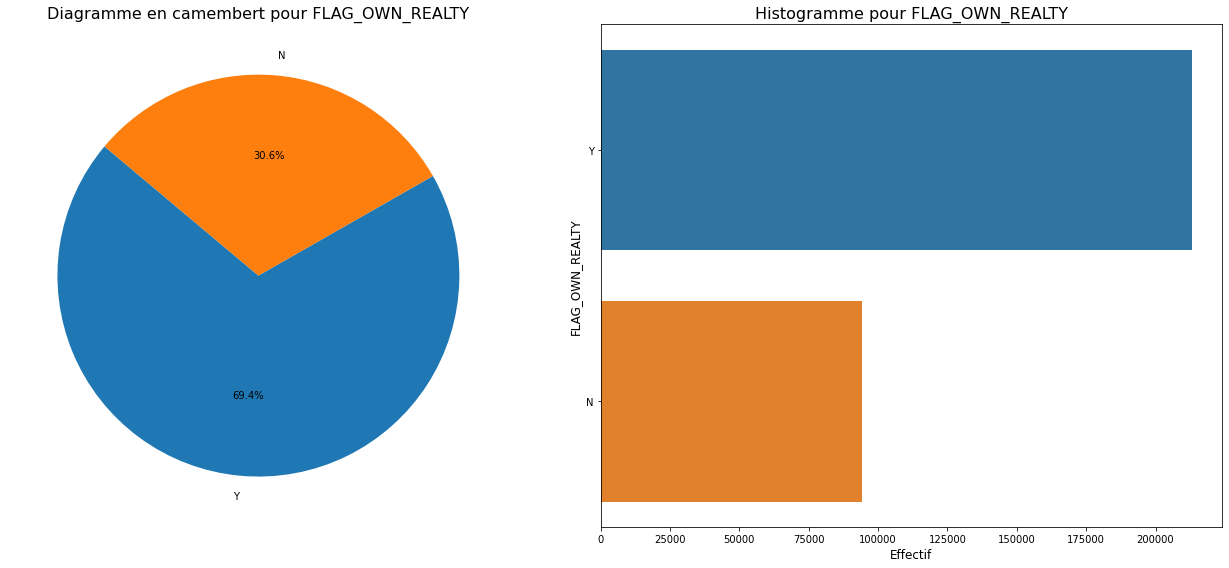

In [79]:
plot_distribution(feature)

<h6>B. Variables Quantitatives : </h6>

<h7>1. Histogrammes et Diagrammes de Densité :</h7>

Histogrammes et Diagrammes de Densité pour OWN_CAR_AGE:


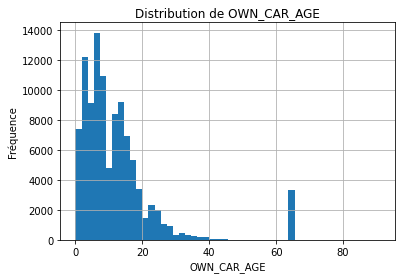

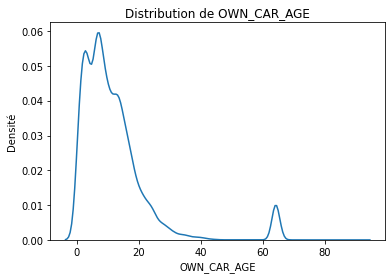

In [80]:
# Variable quantitative
quantitative_feature = 'OWN_CAR_AGE'

print(f'Histogrammes et Diagrammes de Densité pour {quantitative_feature}:')

# Histogrammes et Diagrammes de Densité
plt.figure()
application_train[quantitative_feature].hist(bins=50)
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Fréquence')
plt.show()

plt.figure()
sns.kdeplot(application_train[quantitative_feature])
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Densité')
plt.show()

<h7>2. Boîtes à Moustaches :</h7>

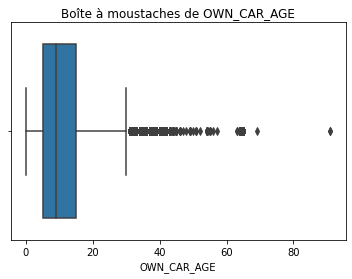

In [81]:
plt.figure()
sns.boxplot(x=application_train[quantitative_feature])
plt.title(f'Boîte à moustaches de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.show()

<h7>3. Mesures de Tendance Centrale / Mesures de Dispersion / Mesures de forme :</h7>

In [82]:
results_df = pd.DataFrame()

# Spécification de la variable quantitative
quantitative_feature = 'OWN_CAR_AGE'

# Tendance Centrale
mean_value = application_train[quantitative_feature].mean()
median_value = application_train[quantitative_feature].median()

#  Mesures de Dispersion
variance_value = application_train[quantitative_feature].var()
std_dev_value = application_train[quantitative_feature].std()
range_value = application_train[quantitative_feature].max() - application_train[quantitative_feature].min()

# Mesures de forme
skewness_value = application_train[quantitative_feature].skew()
kurtosis_value = application_train[quantitative_feature].kurt()

results_dict = {
    'Variable': quantitative_feature,
    'Moyenne': mean_value,
    'Médiane': median_value,
    'Variance': variance_value,
    'Écart-Type': std_dev_value,
    'Plage': range_value,
    'Asymétrie': skewness_value,
    'Kurtosis': kurtosis_value
}


temp_df = pd.DataFrame([results_dict])
results_df = pd.concat([results_df, temp_df], ignore_index=True)
results_df


Variable    Moyenne  Médiane    Variance  Écart-Type  Plage  Asymétrie  \
0  OWN_CAR_AGE  12.061091      9.0  142.678524   11.944812   91.0   2.745422   

   Kurtosis  
0  9.214945

<h7>4. Valeurs Aberrantes :</h7>

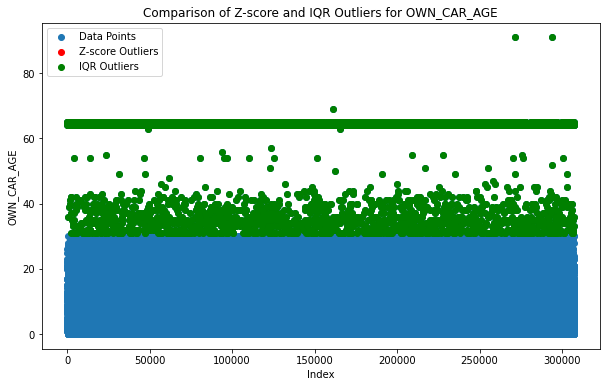

In [83]:
plot_outliers(quantitative_feature)

In [84]:
calculate_outliers(quantitative_feature)

{'Variable': 'OWN_CAR_AGE',
 "Nombre d'outliers détectés par Z-score": 0,
 "Pourcentage d'outliers détectés par Z-score": 0.0,
 "Nombre d'outliers détectés par IQR": 4932,
 "Pourcentage d'outliers détectés par IQR": 1.6038450657049668}

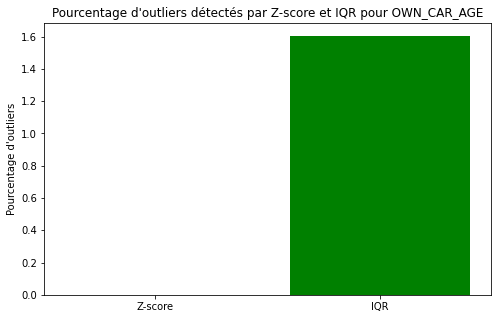

In [85]:
plot_outliers_percentage(quantitative_feature)

<h7>5. Tests statistiques :</h7>

In [86]:
test_normality(quantitative_feature)

[{'Variable': 'OWN_CAR_AGE',
  'Nom du test': 'Kolmogorov-Smirnov',
  'Statistique de test': 0.9063581275993529,
  'p-valeur': 0.0,
  'Normalité': 'Non'},
 {'Variable': 'OWN_CAR_AGE',
  'Nom du test': 'Anderson-Darling',
  'Statistique de test': 6574.9943058548815,
  'p-valeur': None,
  'Normalité': 'Non'},
 {'Variable': 'OWN_CAR_AGE',
  'Nom du test': "D'Agostino-Pearson",
  'Statistique de test': 60482.53169319313,
  'p-valeur': 0.0,
  'Normalité': 'Non'}]

In [87]:
# Appel de la fonction remove_outliers_iqr pour la colonne 'OWN_CAR_AGE'
application_train_cleaned = remove_outliers_iqr(application_train, ['OWN_CAR_AGE'])

# Statistiques descriptives avant et après la suppression des outliers
desc_stats_before = application_train.describe().transpose()
desc_stats_after = application_train_cleaned.describe().transpose()

# Fusion
comparison_df = pd.concat([desc_stats_before.add_suffix('_before'), desc_stats_after.add_suffix('_after')], axis=1)
comparison_df

count_before    mean_before     std_before  \
SK_ID_CURR                      307511.0  278180.518577  102790.175348   
TARGET                          307511.0       0.080729       0.272419   
CNT_CHILDREN                    307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL                307511.0  168797.919297  237123.146279   
AMT_CREDIT                      307511.0  599025.999706  402490.776996   
...                                  ...            ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY       265992.0       0.007000       0.110757   
AMT_REQ_CREDIT_BUREAU_WEEK      265992.0       0.034362       0.204685   
AMT_REQ_CREDIT_BUREAU_MON       265992.0       0.267395       0.916002   
AMT_REQ_CREDIT_BUREAU_QRT       265992.0       0.265474       0.794056   
AMT_REQ_CREDIT_BUREAU_YEAR      265992.0       1.899974       1.869295   

                            min_before  25%_before  50%_before  75%_before  \
SK_ID_CURR                    100002.0    189145.5    278202.0    367142.5   
TARGET                             0.0         0.0         0.0         0.0   
CNT_CHILDREN                       0.0         0.0         0.0         1.0   
AMT_INCOME_TOTAL               25650.0    112500.0    147150.0    202500.0   
AMT_CREDIT                     45000.0    270000.0    513531.0    808650.0   
...                                ...         ...         ...         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_WEEK         0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_MON          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_QRT          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_YEAR         0.0         0.0         1.0         3.0   

                             max_before  count_after     mean_after  \
SK_ID_CURR                     456255.0      99650.0  278332.569734   
TARGET                              1.0      99650.0       0.071611   
CNT_CHILDREN                       19.0      99650.0       0.519860   
AMT_INCOME_TOTAL            117000000.0      99650.0  197892.099321   
AMT_CREDIT                    4050000.0      99650.0  669106.182644   
...                                 ...          ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY           9.0      88193.0       0.007200   
AMT_REQ_CREDIT_BUREAU_WEEK          8.0      88193.0       0.034379   
AMT_REQ_CREDIT_BUREAU_MON          27.0      88193.0       0.294026   
AMT_REQ_CREDIT_BUREAU_QRT         261.0      88193.0       0.256336   
AMT_REQ_CREDIT_BUREAU_YEAR         25.0      88193.0       1.817877   

                                std_after  min_after  25%_after  50%_after  \
SK_ID_CURR                  102916.152399   100004.0   188968.0   278485.5   
TARGET                           0.257843        0.0        0.0        0.0   
CNT_CHILDREN                     0.780956        0.0        0.0        0.0   
AMT_INCOME_TOTAL            142688.493033    25650.0   135000.0   180000.0   
AMT_CREDIT                  435913.487716    45000.0   312768.0   553806.0   
...                                   ...        ...        ...        ...   
AMT_REQ_CREDIT_BUREAU_DAY        0.118692        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_WEEK       0.204986        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_MON        0.959308        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_QRT        0.596692        0.0        0.0        0.0   
AMT_REQ_CREDIT_BUREAU_YEAR       1.801614        0.0        0.0        1.0   

                            75%_after   max_after  
SK_ID_CURR                  367585.75    456242.0  
TARGET                           0.00         1.0  
CNT_CHILDREN                     1.00        14.0  
AMT_INCOME_TOTAL            225000.00  18000090.0  
AMT_CREDIT                  900000.00   4050000.0  
...                               ...         ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.00         9.

<h4>F. Fonctionnalités de Propriété : </h4>

In [88]:
regional_assessments = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

In [89]:
variables_quantitatives = []
variables_qualitatives = []

# Classification des variables
for colonne in regional_assessments :
    if application_train[colonne].dtype in ['int64', 'float64']:
        variables_quantitatives.append(colonne)
    elif application_train[colonne].dtype == 'object':
        variables_qualitatives.append(colonne)

print('Variables Quantitatives:', variables_quantitatives)
print('Variables Qualitatives:', variables_qualitatives)

Variables Quantitatives: ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
Variables Qualitatives: []


<h6>A. Variables Quantitatives : </h6>

<h7>1. Histogrammes et Diagrammes de Densité :</h7>

Histogrammes et Diagrammes de Densité pour REGION_RATING_CLIENT:


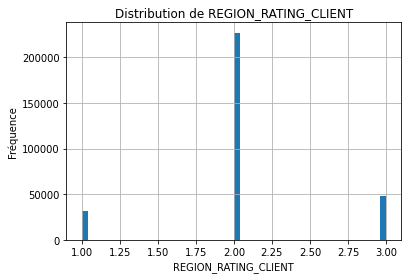

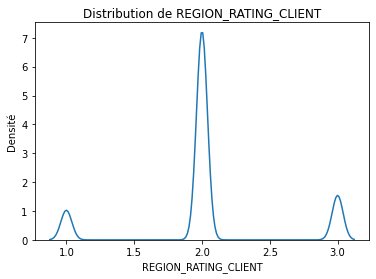

In [90]:
# Variable quantitative
quantitative_feature = 'REGION_RATING_CLIENT'

print(f'Histogrammes et Diagrammes de Densité pour {quantitative_feature}:')

# Histogrammes et Diagrammes de Densité
plt.figure()
application_train[quantitative_feature].hist(bins=50)
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Fréquence')
plt.show()

plt.figure()
sns.kdeplot(application_train[quantitative_feature])
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Densité')
plt.show()

Histogrammes et Diagrammes de Densité pour REGION_RATING_CLIENT_W_CITY:


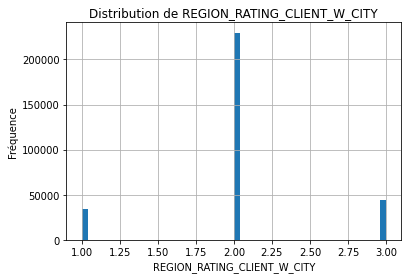

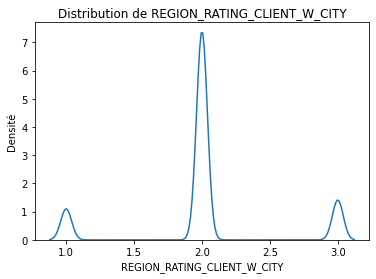

In [91]:
# Variable quantitative
quantitative_feature = 'REGION_RATING_CLIENT_W_CITY'

print(f'Histogrammes et Diagrammes de Densité pour {quantitative_feature}:')

# Histogrammes et Diagrammes de Densité
plt.figure()
application_train[quantitative_feature].hist(bins=50)
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Fréquence')
plt.show()

plt.figure()
sns.kdeplot(application_train[quantitative_feature])
plt.title(f'Distribution de {quantitative_feature}')
plt.xlabel(quantitative_feature)
plt.ylabel('Densité')
plt.show()

<h7>2. Boîtes à Moustaches :</h7>

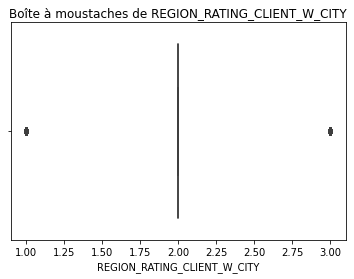

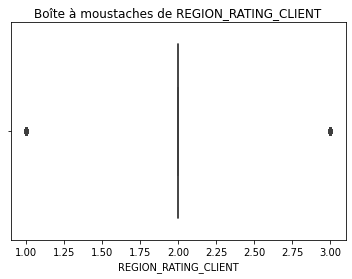

In [92]:
features_to_plot = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT']

# Parcourir chaque feature et créer une boîte à moustaches
for feature in features_to_plot:
    plt.figure()
    sns.boxplot(x=application_train[feature])
    plt.title(f'Boîte à moustaches de {feature}')
    plt.xlabel(feature)
    plt.show()


<h7>3. Mesures de Tendance Centrale / Mesures de Dispersion / Mesures de forme :</h7>

In [93]:
# Liste des features quantitatives à analyser
quantitative_features = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT']

results_df = pd.DataFrame()

# Boucle sur chaque feature quantitative
for quantitative_feature in quantitative_features:
    # Tendance Centrale
    mean_value = application_train[quantitative_feature].mean()
    median_value = application_train[quantitative_feature].median()

    # Mesures de Dispersion
    variance_value = application_train[quantitative_feature].var()
    std_dev_value = application_train[quantitative_feature].std()
    range_value = application_train[quantitative_feature].max() - application_train[quantitative_feature].min()

    #  Mesures de forme
    skewness_value = application_train[quantitative_feature].skew()
    kurtosis_value = application_train[quantitative_feature].kurt()

 
    results_dict = {
        'Variable': quantitative_feature,
        'Moyenne': mean_value,
        'Médiane': median_value,
        'Variance': variance_value,
        'Écart-Type': std_dev_value,
        'Plage': range_value,
        'Asymétrie': skewness_value,
        'Kurtosis': kurtosis_value
    }

    # Conversion du dict en df
    temp_df = pd.DataFrame([results_dict])
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df

Variable   Moyenne  Médiane  Variance  Écart-Type  \
0  REGION_RATING_CLIENT_W_CITY  2.031521      2.0  0.252745    0.502737   
1         REGION_RATING_CLIENT  2.052463      2.0  0.259116    0.509034   

   Plage  Asymétrie  Kurtosis  
0      2   0.059730  0.933584  
1      2   0.087468  0.800416

<h7>4. Valeurs Aberrantes :</h7>

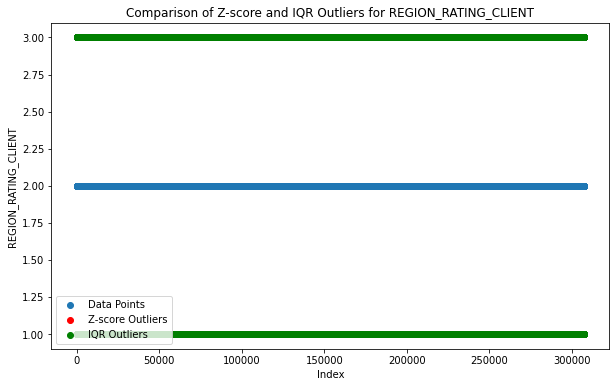

In [94]:
plot_outliers(quantitative_feature)

In [95]:
calculate_outliers(quantitative_feature)

{'Variable': 'REGION_RATING_CLIENT',
 "Nombre d'outliers détectés par Z-score": 0,
 "Pourcentage d'outliers détectés par Z-score": 0.0,
 "Nombre d'outliers détectés par IQR": 80527,
 "Pourcentage d'outliers détectés par IQR": 26.186705516225434}

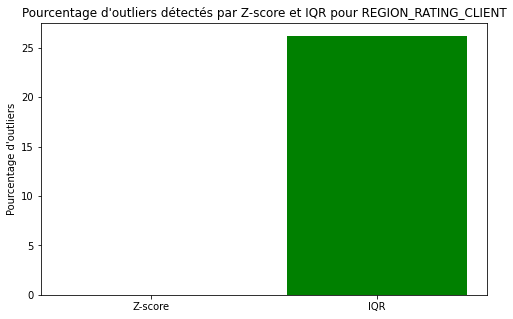

In [96]:
plot_outliers_percentage(quantitative_feature)

<h6>VII. Tests statistiques  : </h6>

In [97]:
test_normality(quantitative_feature)

[{'Variable': 'REGION_RATING_CLIENT',
  'Nom du test': 'Kolmogorov-Smirnov',
  'Statistique de test': 0.8725479224303634,
  'p-valeur': 0.0,
  'Normalité': 'Non'},
 {'Variable': 'REGION_RATING_CLIENT',
  'Nom du test': 'Anderson-Darling',
  'Statistique de test': 50362.448556394025,
  'p-valeur': None,
  'Normalité': 'Non'},
 {'Variable': 'REGION_RATING_CLIENT',
  'Nom du test': "D'Agostino-Pearson",
  'Statistique de test': 4706.030858941573,
  'p-valeur': 0.0,
  'Normalité': 'Non'}]

In [98]:
# Appel de la fonction remove_outliers_iqr pour la colonne 'REGION_RATING_CLIENT_W_CITY' et 'REGION_RATING_CLIENT''
application_train_cleaned = remove_outliers_iqr(application_train, ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT'])

# Statistiques descriptives avant et après la suppression des outliers
desc_stats_before = application_train.describe().transpose()
desc_stats_after = application_train_cleaned.describe().transpose()

# Fusion
comparison_df = pd.concat([desc_stats_before.add_suffix('_before'), desc_stats_after.add_suffix('_after')], axis=1)
comparison_df

count_before    mean_before     std_before  \
SK_ID_CURR                      307511.0  278180.518577  102790.175348   
TARGET                          307511.0       0.080729       0.272419   
CNT_CHILDREN                    307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL                307511.0  168797.919297  237123.146279   
AMT_CREDIT                      307511.0  599025.999706  402490.776996   
...                                  ...            ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY       265992.0       0.007000       0.110757   
AMT_REQ_CREDIT_BUREAU_WEEK      265992.0       0.034362       0.204685   
AMT_REQ_CREDIT_BUREAU_MON       265992.0       0.267395       0.916002   
AMT_REQ_CREDIT_BUREAU_QRT       265992.0       0.265474       0.794056   
AMT_REQ_CREDIT_BUREAU_YEAR      265992.0       1.899974       1.869295   

                            min_before  25%_before  50%_before  75%_before  \
SK_ID_CURR                    100002.0    189145.5    278202.0    367142.5   
TARGET                             0.0         0.0         0.0         0.0   
CNT_CHILDREN                       0.0         0.0         0.0         1.0   
AMT_INCOME_TOTAL               25650.0    112500.0    147150.0    202500.0   
AMT_CREDIT                     45000.0    270000.0    513531.0    808650.0   
...                                ...         ...         ...         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_WEEK         0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_MON          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_QRT          0.0         0.0         0.0         0.0   
AMT_REQ_CREDIT_BUREAU_YEAR         0.0         0.0         1.0         3.0   

                             max_before  count_after     mean_after  \
SK_ID_CURR                     456255.0     225736.0  278259.606762   
TARGET                              1.0     225736.0       0.079066   
CNT_CHILDREN                       19.0     225736.0       0.408849   
AMT_INCOME_TOTAL            117000000.0     225736.0  161523.648055   
AMT_CREDIT                    4050000.0     225736.0  580959.407507   
...                                 ...          ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY           9.0     196217.0       0.006737   
AMT_REQ_CREDIT_BUREAU_WEEK          8.0     196217.0       0.034049   
AMT_REQ_CREDIT_BUREAU_MON          27.0     196217.0       0.256797   
AMT_REQ_CREDIT_BUREAU_QRT         261.0     196217.0       0.266475   
AMT_REQ_CREDIT_BUREAU_YEAR         25.0     196217.0       1.915767   

                                std_after  min_after  25%_after  50%_after  \
SK_ID_CURR                  102783.511922   100002.0  189273.75   278487.0   
TARGET                           0.269842        0.0       0.00        0.0   
CNT_CHILDREN                     0.717891        0.0       0.00        0.0   
AMT_INCOME_TOTAL            267030.553977    25650.0  112500.00   135000.0   
AMT_CREDIT                  388852.256648    45000.0  270000.00   497520.0   
...                                   ...        ...        ...        ...   
AMT_REQ_CREDIT_BUREAU_DAY        0.107679        0.0       0.00        0.0   
AMT_REQ_CREDIT_BUREAU_WEEK       0.204994        0.0       0.00        0.0   
AMT_REQ_CREDIT_BUREAU_MON        0.861253        0.0       0.00        0.0   
AMT_REQ_CREDIT_BUREAU_QRT        0.849729        0.0       0.00        0.0   
AMT_REQ_CREDIT_BUREAU_YEAR       1.881385        0.0       0.00        1.0   

                            75%_after    max_after  
SK_ID_CURR                  367160.25     456254.0  
TARGET                           0.00          1.0  
CNT_CHILDREN                     1.00         19.0  
AMT_INCOME_TOTAL            202500.00  117000000.0  
AMT_CREDIT                  795465.00    4050000.0  
...                               ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.00    

## IV. Analyse Bivariée

Dans l'optique de développer un modèle de scoring crédit précis et efficace, la sélection des caractéristiques pertinentes est cruciale. 

Voici les raisons pour lesquelles nous avons choisi certaines variables :

1. Fonctionnalités Financières :

* AMT_INCOME_TOTAL : Les revenus totaux de l'emprunteur peuvent grandement influencer sa capacité à rembourser le prêt, faisant de cette variable un choix évident.

2. Fonctionnalités Démographiques :

* CODE_GENDER : Bien que la sélection de cette variable soit délicate en raison de considérations éthiques, certaines études ont montré des différences dans les taux de défaut entre les genres. Il est crucial de traiter cette variable avec prudence et transparence.


* DAYS_BIRTH : L'âge de l'emprunteur peut influencer la stabilité financière, et donc la probabilité de remboursement, surtout en tenant compte des risques associés à l'âge avancé.


* NAME_EDUCATION_TYPE : Le niveau d'éducation peut être corrélé à la stabilité de l'emploi et au revenu, impactant ainsi la capacité de remboursement.


* NAME_FAMILY_STATUS et NAME_HOUSING_TYPE : La situation familiale et le type de logement peuvent également influencer la stabilité financière de l'emprunteur.

3. Historique de l'Emploi :

* DAYS_EMPLOYED : La durée de l'emploi est souvent un indicateur de stabilité financière.

* OCCUPATION_TYPE et ORGANIZATION_TYPE : Ces variables peuvent refléter le type et la stabilité de l'emploi, ainsi que le niveau de revenu.

4. Fonctionnalités de Propriété :

* FLAG_OWN_CAR, FLAG_OWN_REALTY et OWN_CAR_AGE : La possession de biens peut indiquer une certaine stabilité financière, ce qui peut influencer la capacité de l'emprunteur à rembourser le prêt.

Les études et articles suivants mettent en lumière les différences entre les genres en matière de taux de défaut de prêt ou de comportements financiers associés :

1. **Performance des Prêts et Différences de Genre en Matière de Littératie Financière** : L'étude de Chen et al. (2018) a découvert que les prêts investis par des femmes ont des taux de défaut plus élevés et des rendements plus faibles que ceux des investisseurs masculins[^1].

2. **Différences de Genre dans le Remboursement des Microcrédits** : Des études multi-pays par D'Espallier et al. (2011) et Gul et al. (2017) suggèrent qu'un pourcentage plus élevé de clients féminins dans les institutions de microfinance est associé à un risque de portefeuille plus faible, moins de radiations, et moins de provisions. Cependant, les raisons précises de ces différences de genre restent peu claires[^2].

Ces ressources peuvent fournir une base pour comprendre et justifier l'inclusion de la variable `CODE_GENDER` dans l'analyse, bien que l'utilisation de cette variable doive être abordée avec prudence et transparence, en tenant compte des considérations éthiques. 

Les différences de genre en matière de taux de défaut de prêt peuvent être influencées par divers facteurs, y compris la littératie financière et les biais potentiels dans les pratiques de prêt.

Il est également crucial de noter que l'interprétation des différences entre les genres doit être faite avec soin pour éviter toute discrimination ou stigmatisation.

[1]: [Financial literacy and gender difference in loan performance](https://www.researchgate.net/publication/327139391_Financial_literacy_and_gender_difference_in_loan_performance)

[2]: [Gender differences in the repayment of microcredit: The mediating role ...](https://www.sciencedirect.com/science/article/abs/pii/S0305750X18303568)


### Analyse Bivariée

In [99]:
# Liste des features sélectionnées
features_selectionnees = [
    'AMT_INCOME_TOTAL', 'CODE_GENDER', 'DAYS_BIRTH',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE','AMT_CREDIT','AMT_ANNUITY'
]

variables_quantitatives = []
variables_qualitatives = []

# Classification des variables
for colonne in features_selectionnees:
    if application_train[colonne].dtype in ['int64', 'float64']:
        variables_quantitatives.append(colonne)
    elif application_train[colonne].dtype == 'object':
        variables_qualitatives.append(colonne)

print('Variables Quantitatives:', variables_quantitatives)
print('Variables Qualitatives:', variables_qualitatives)

Variables Quantitatives: ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'AMT_CREDIT', 'AMT_ANNUITY']
Variables Qualitatives: ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']


<h3>Variable target</h3>

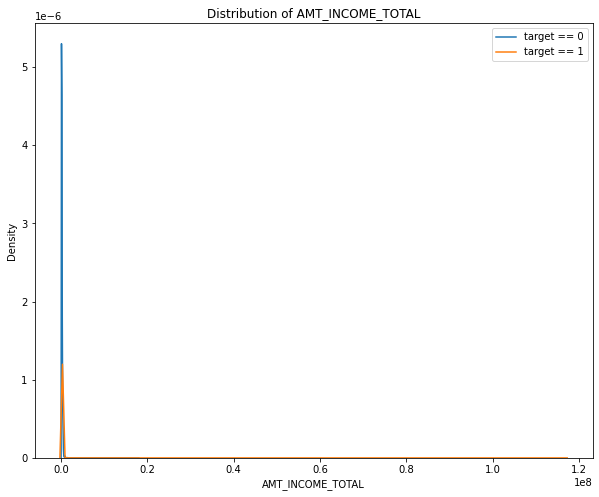

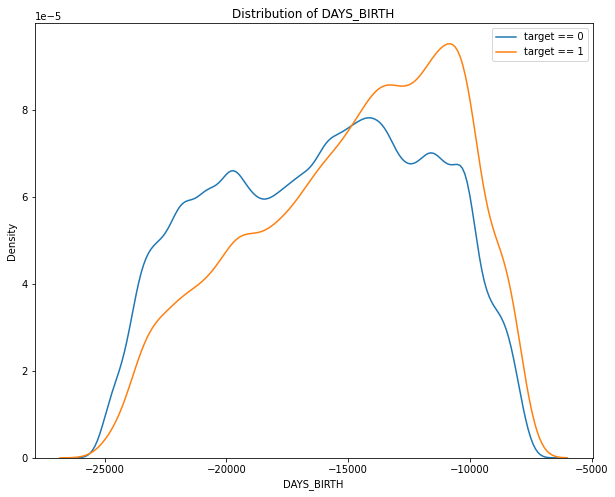

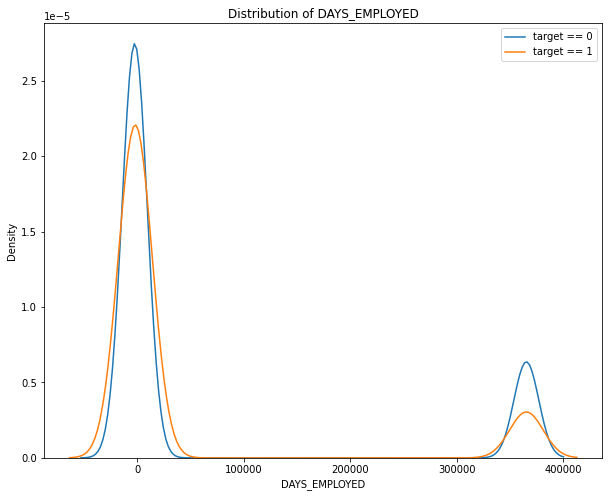

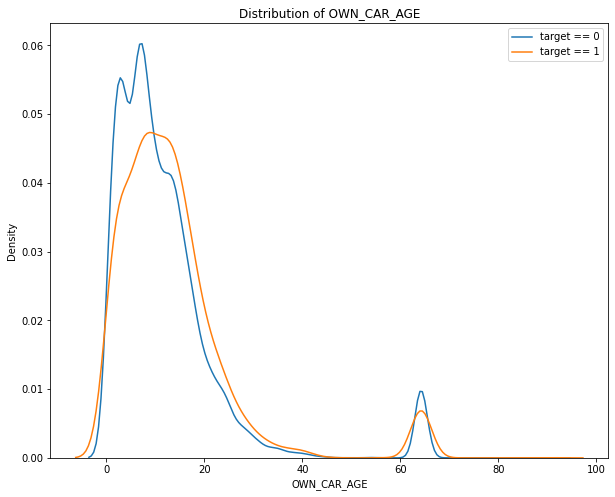

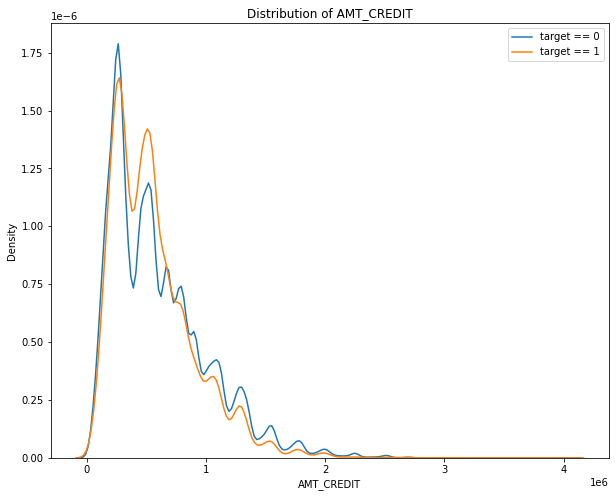

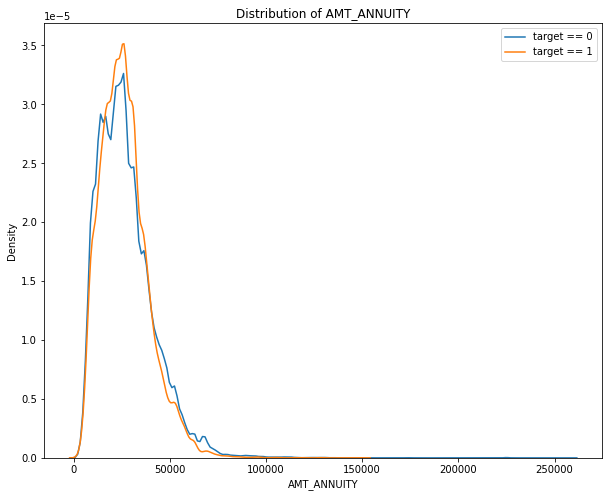

In [100]:
# Visualisation de la distribution de la variable target

for var in variables_quantitatives:
    plt.figure(figsize=(10, 8))
    
    # KDE plot pour les emprunteurs qui ont remboursé leur prêt à temps
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, var], label='target == 0')
    
    # KDE plot pour les emprunteurs qui n'ont pas remboursé leur prêt à temps
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, var], label='target == 1')
    
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(f'Distribution of {var}')
    plt.legend()
    plt.show()

<Figure size 720x360 with 0 Axes>

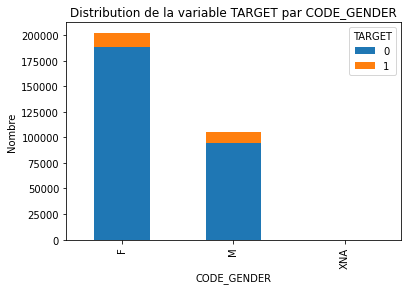

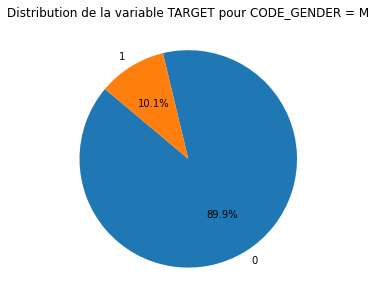

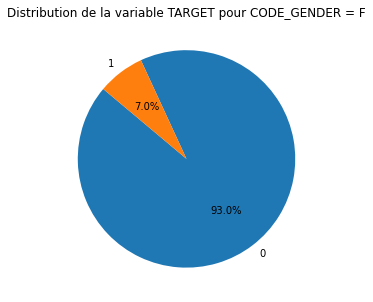

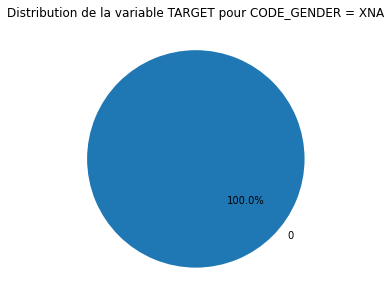

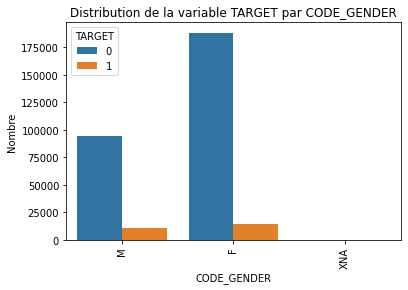

<Figure size 720x360 with 0 Axes>

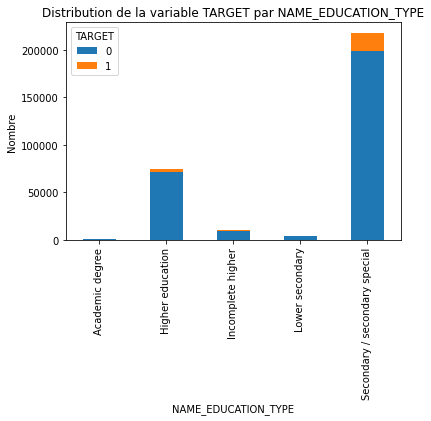

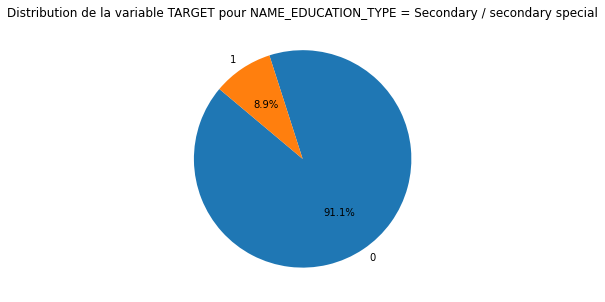

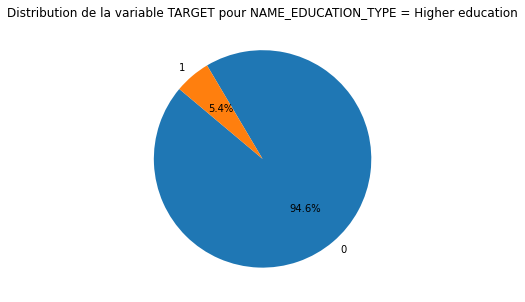

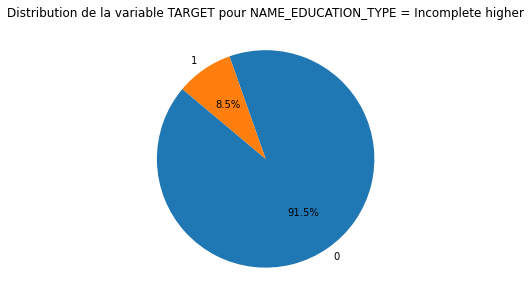

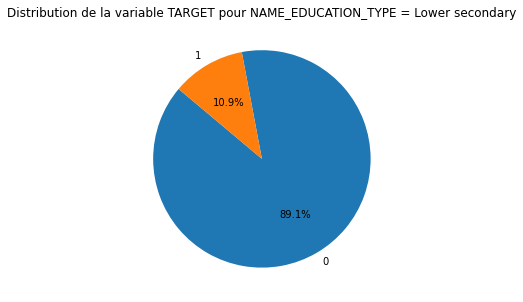

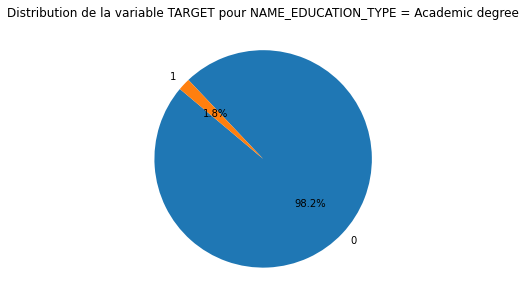

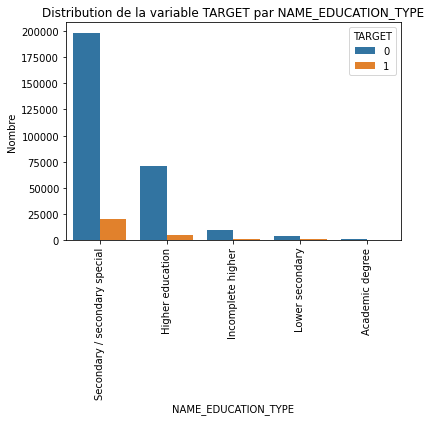

<Figure size 720x360 with 0 Axes>

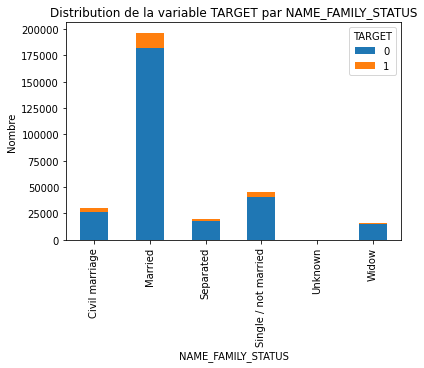

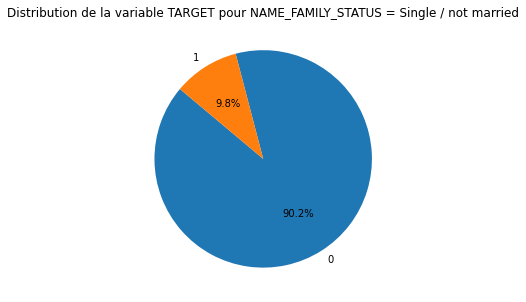

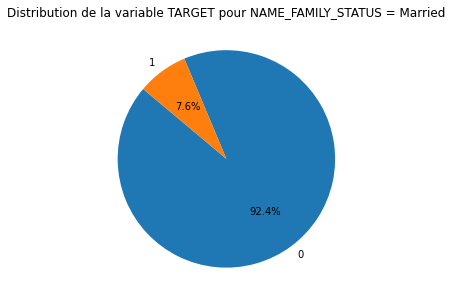

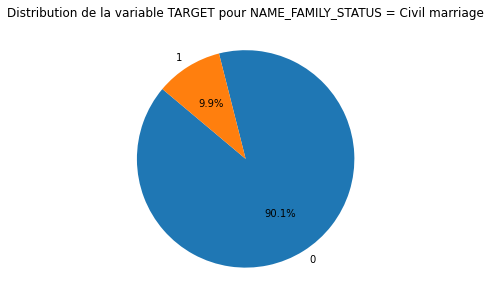

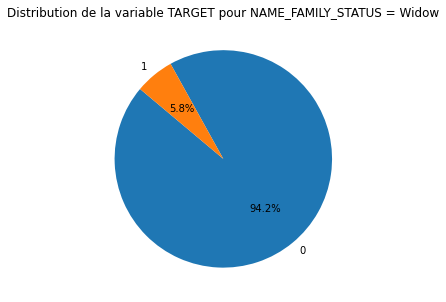

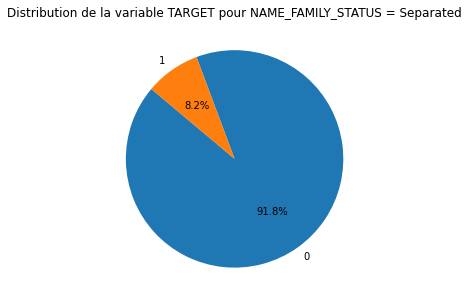

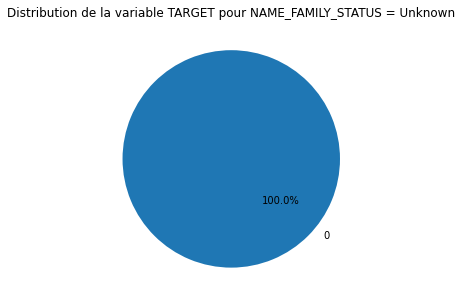

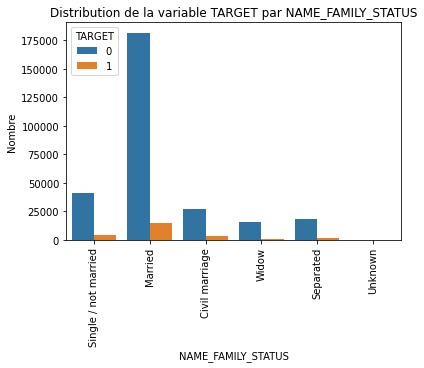

<Figure size 720x360 with 0 Axes>

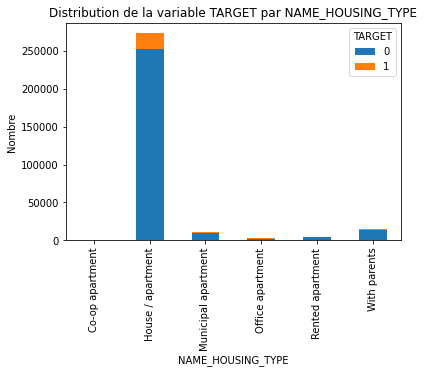

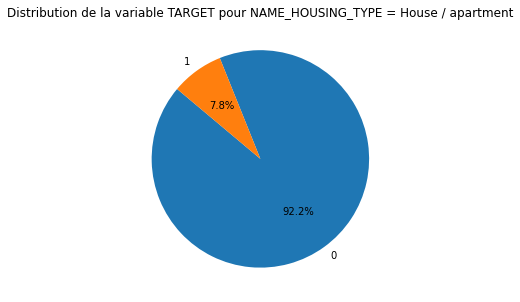

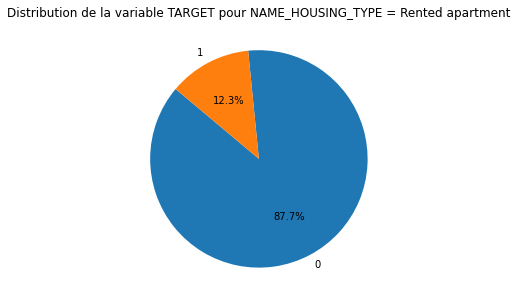

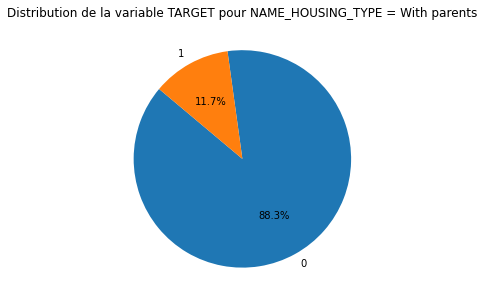

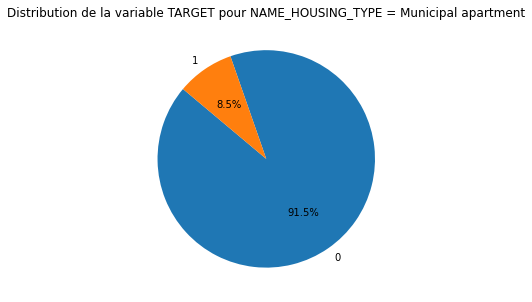

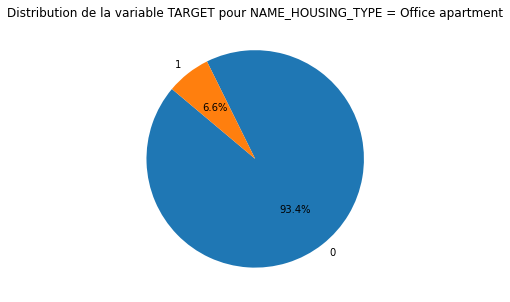

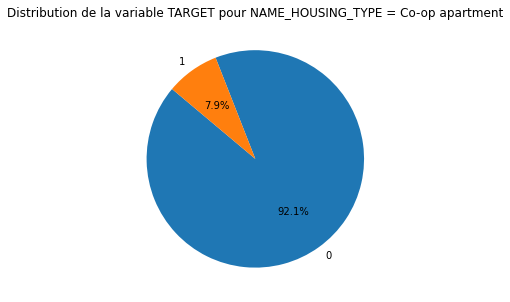

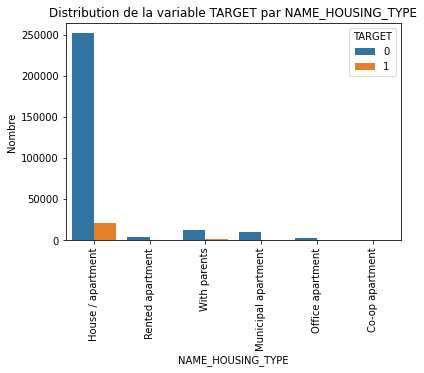

<Figure size 720x360 with 0 Axes>

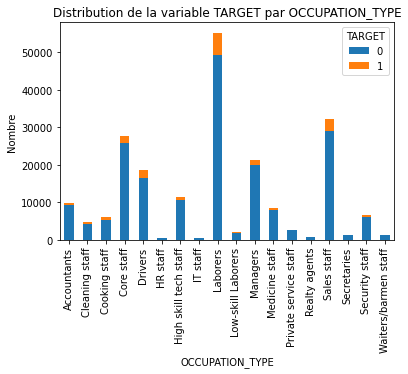

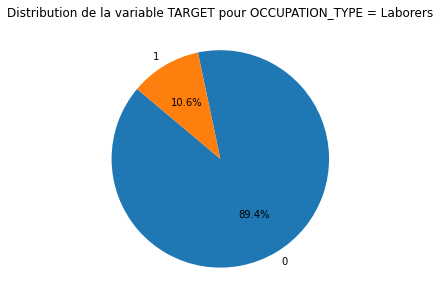

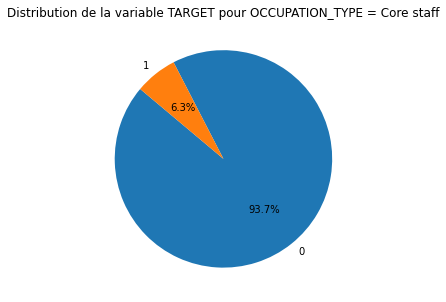

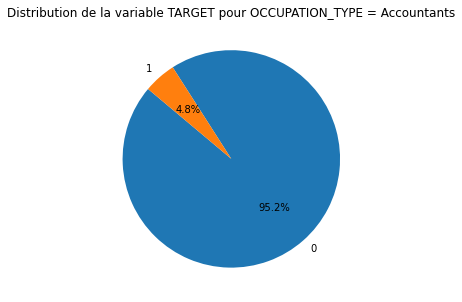

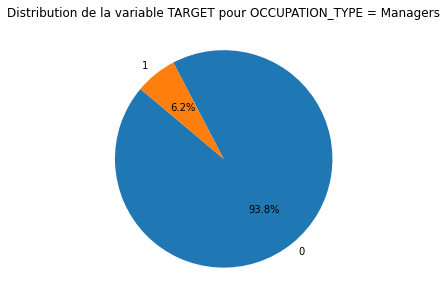

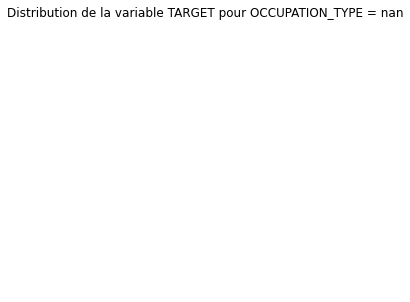

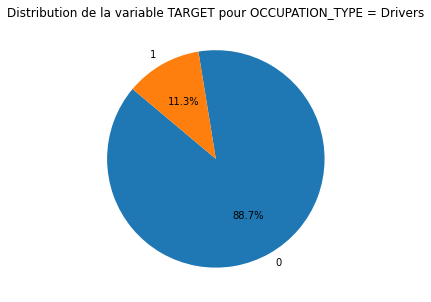

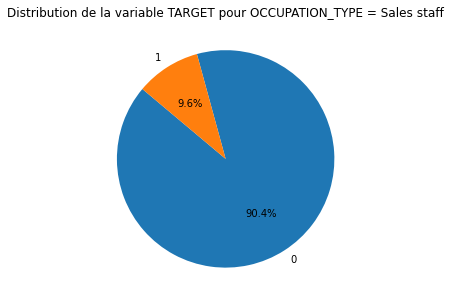

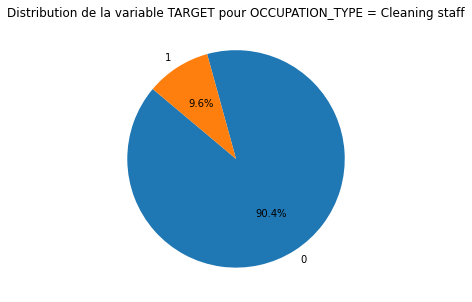

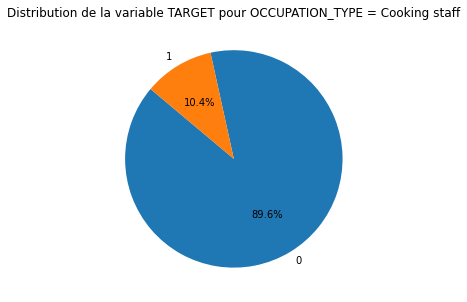

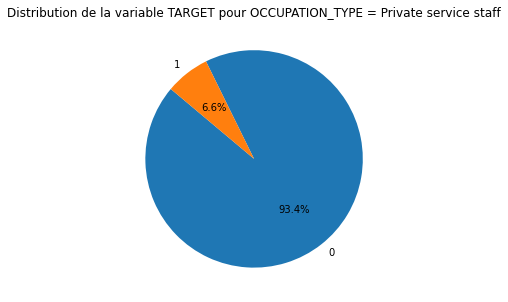

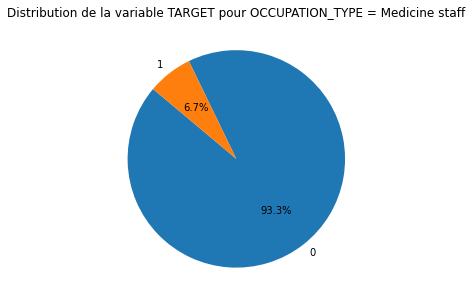

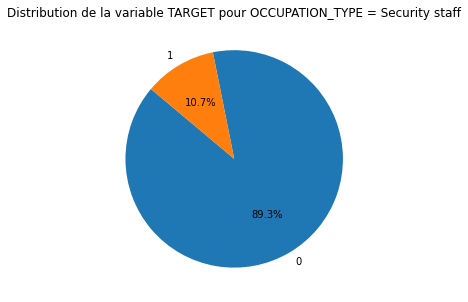

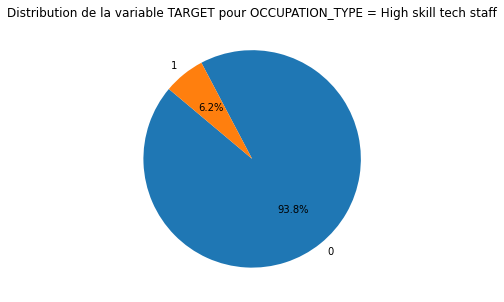

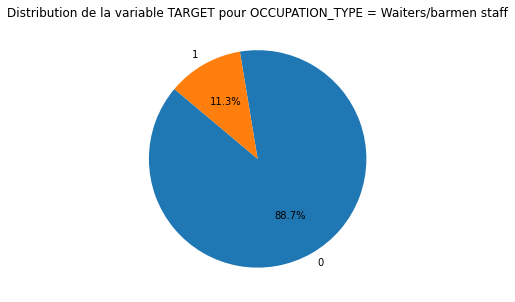

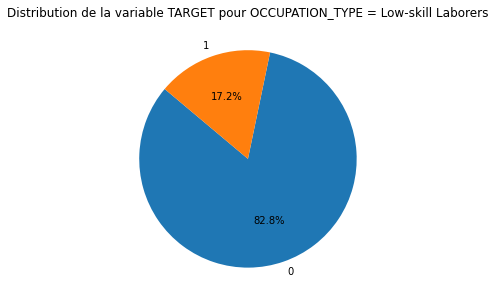

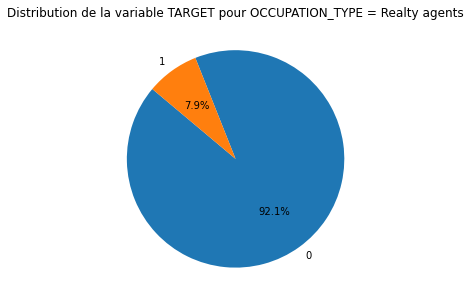

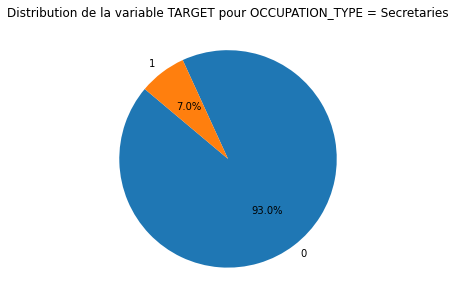

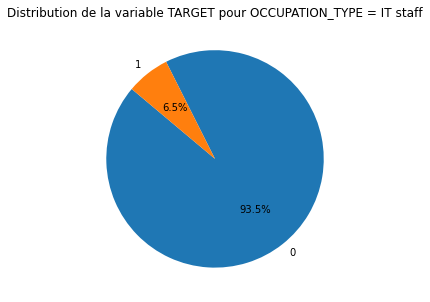

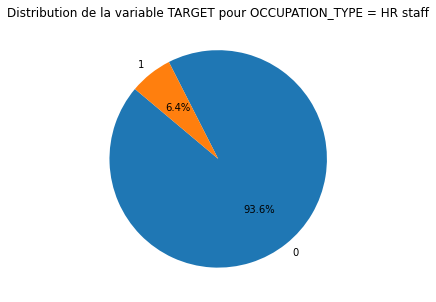

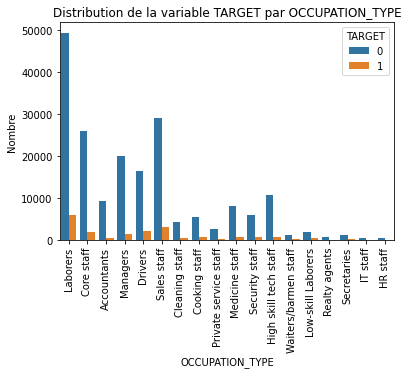

<Figure size 720x360 with 0 Axes>

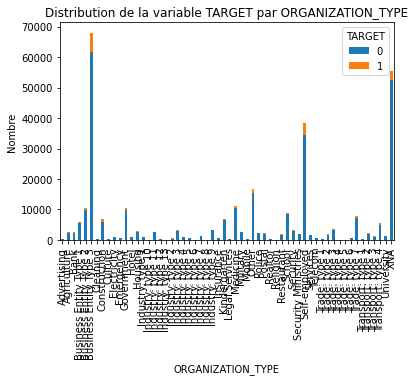

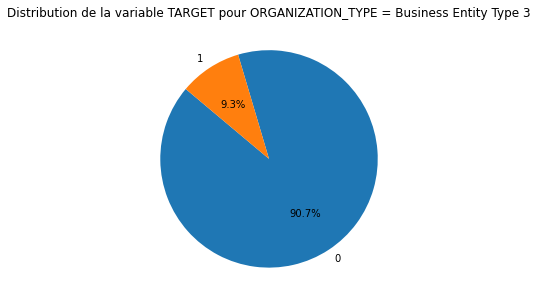

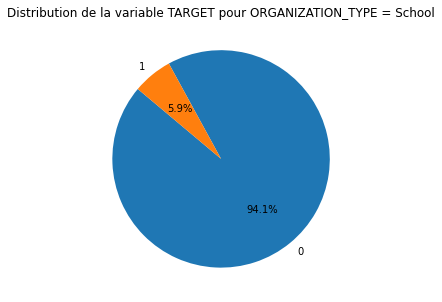

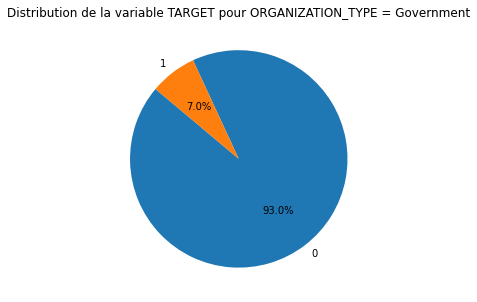

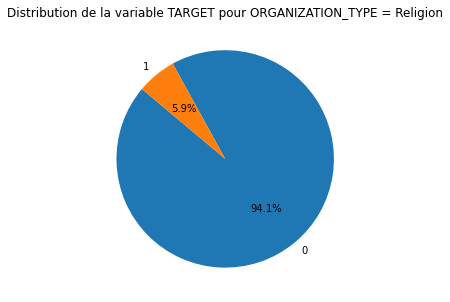

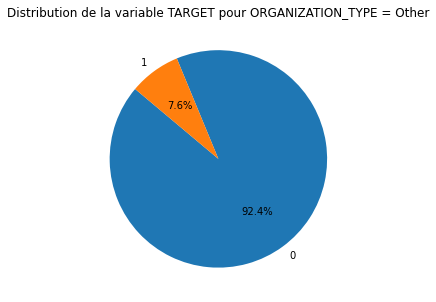

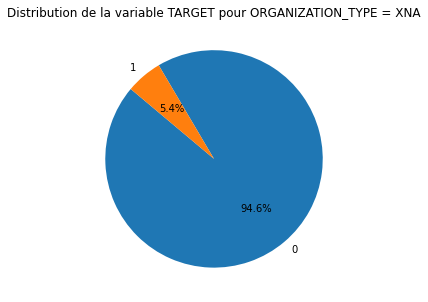

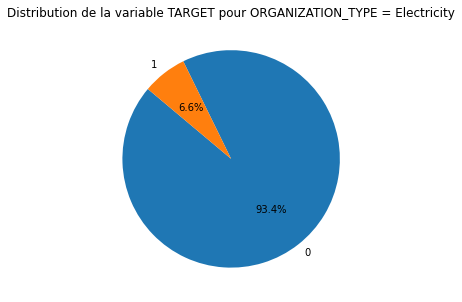

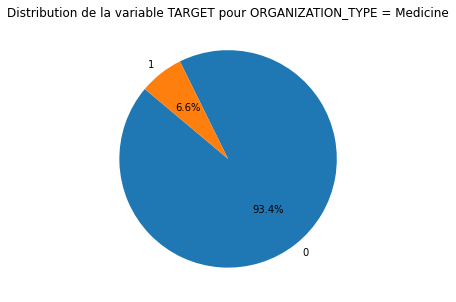

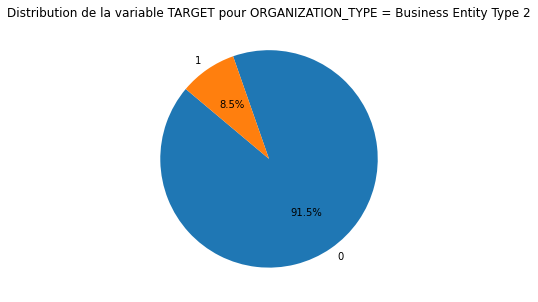

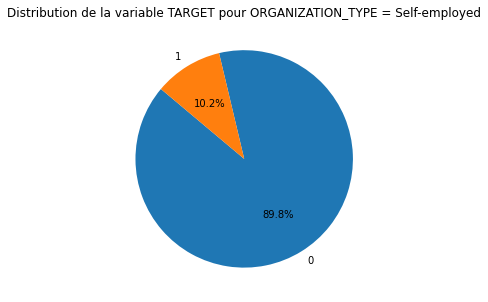

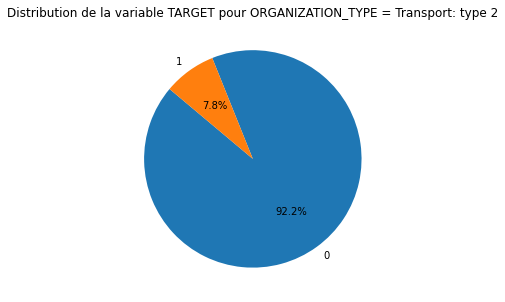

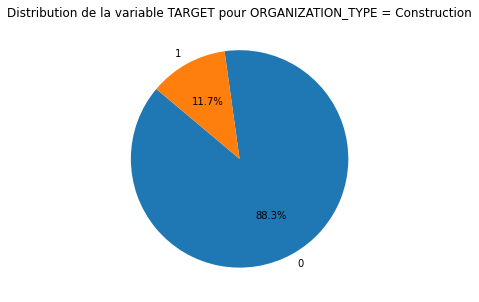

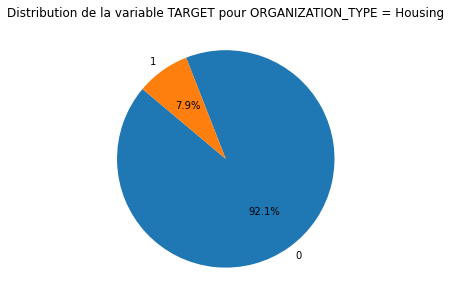

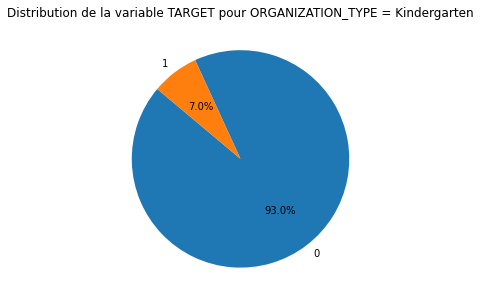

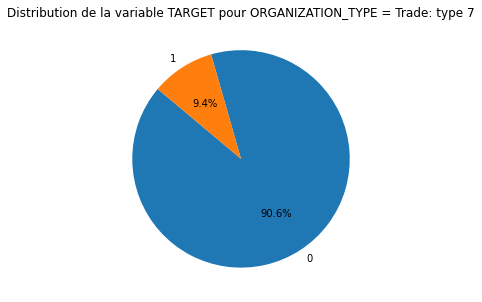

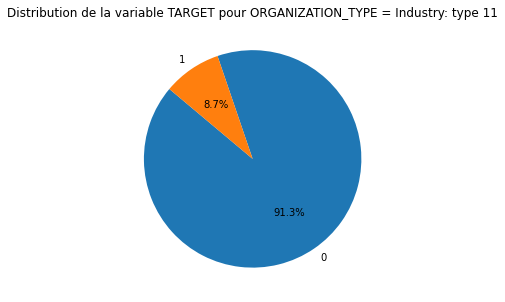

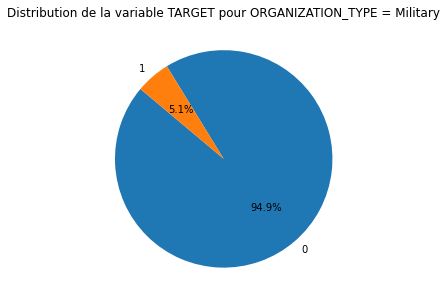

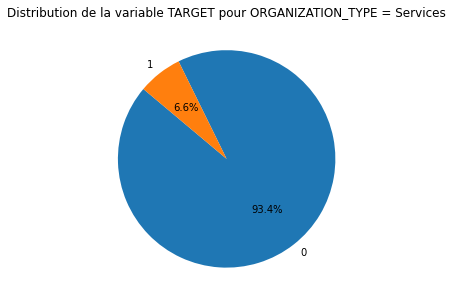

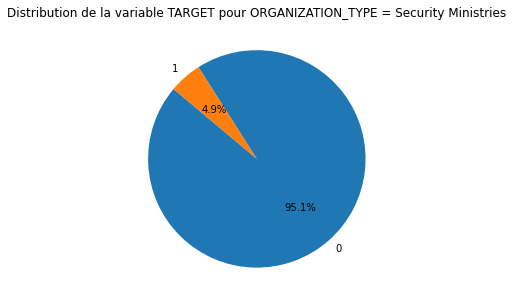

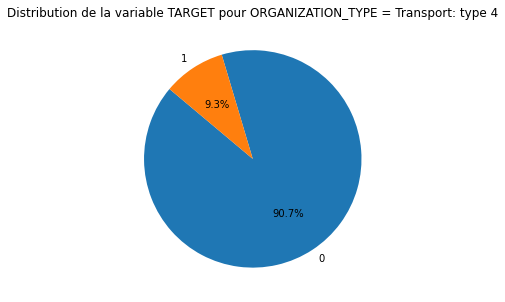

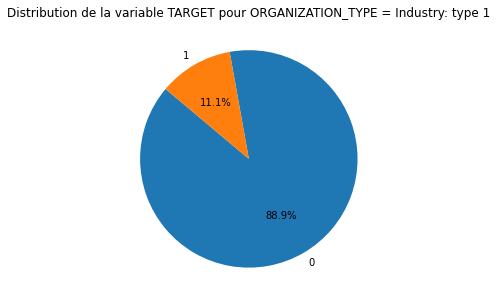

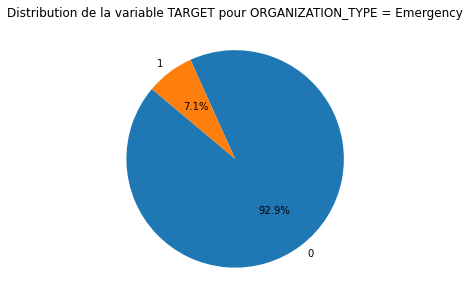

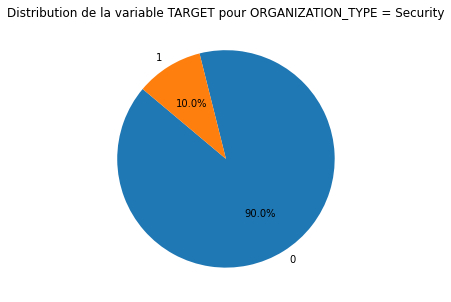

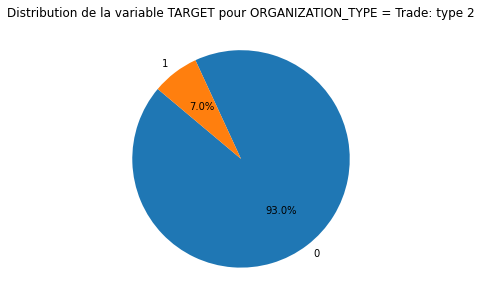

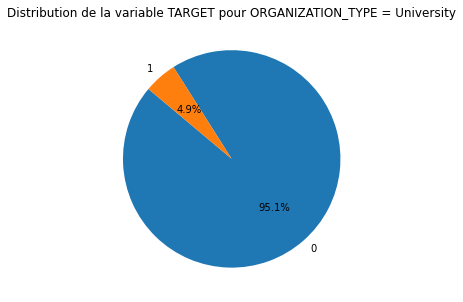

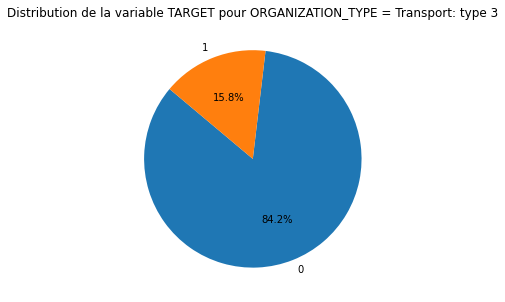

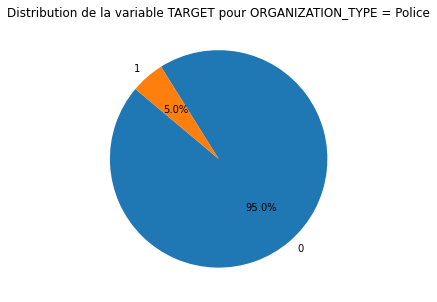

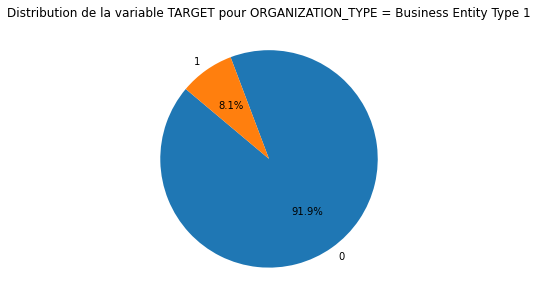

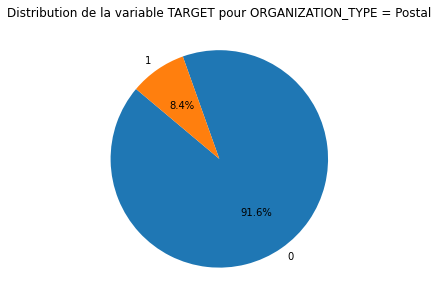

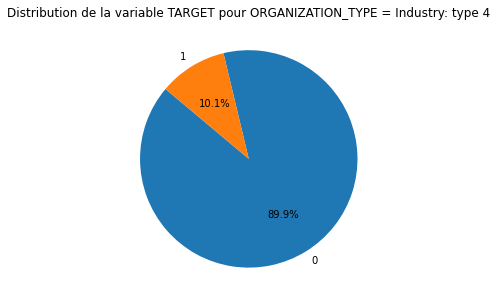

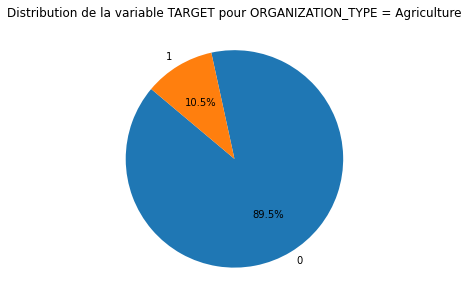

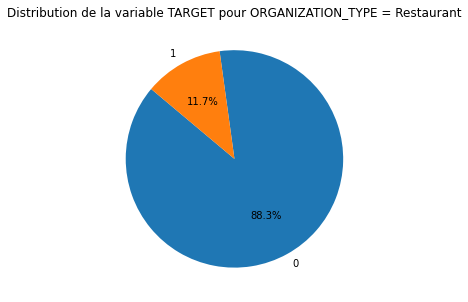

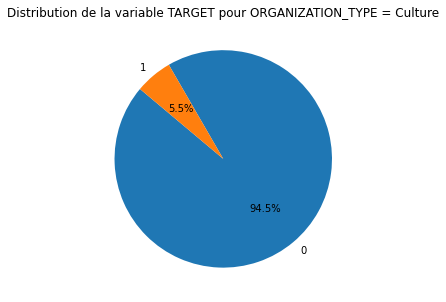

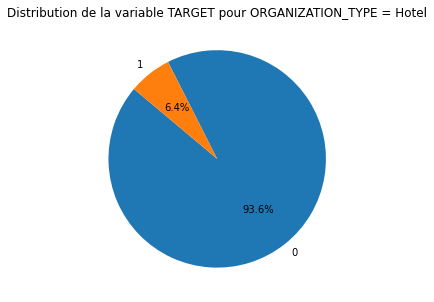

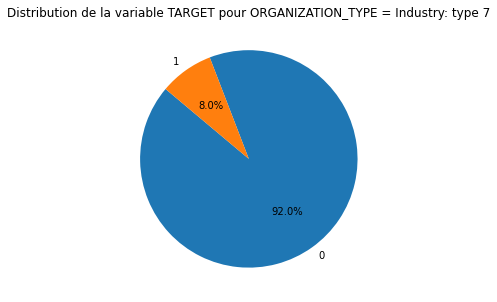

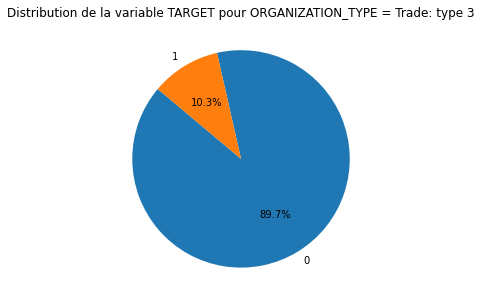

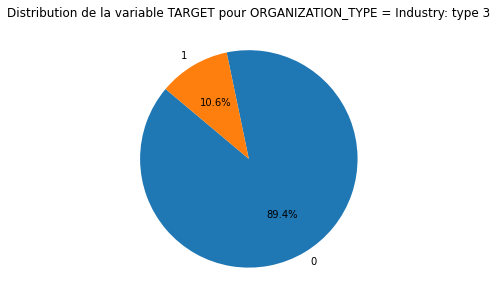

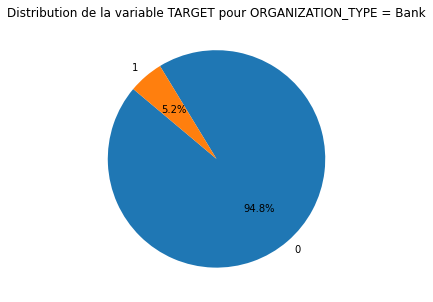

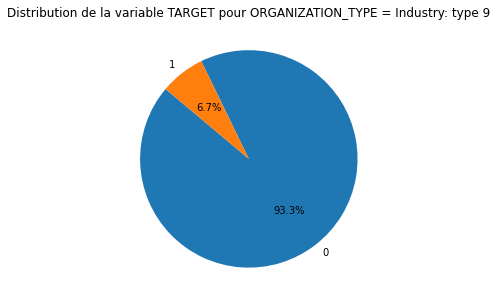

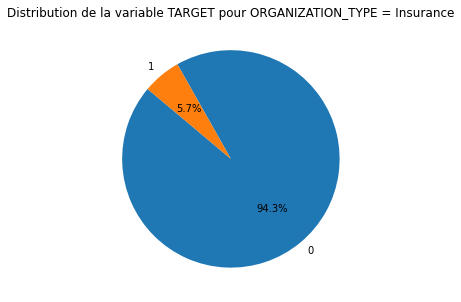

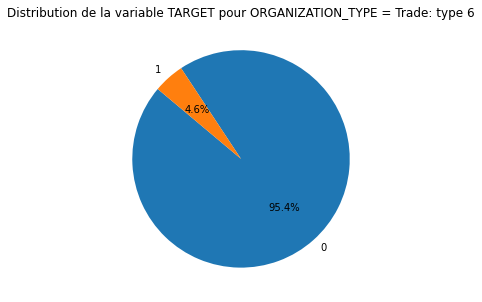

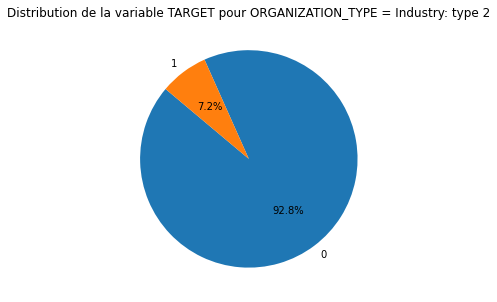

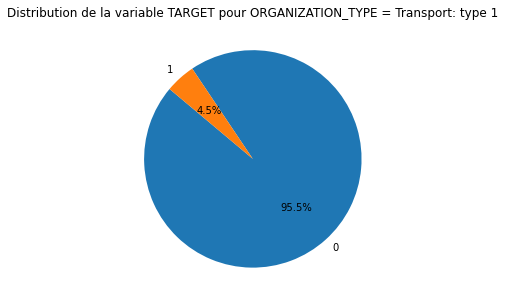

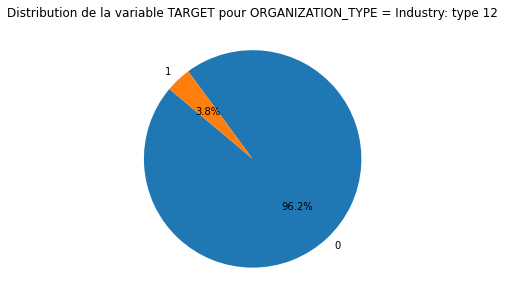

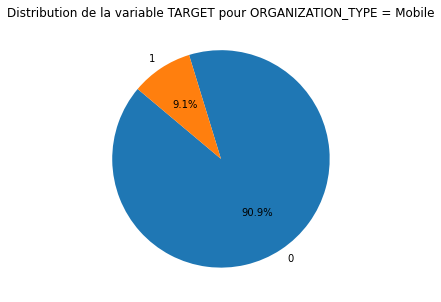

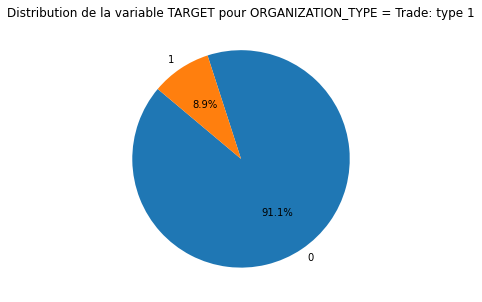

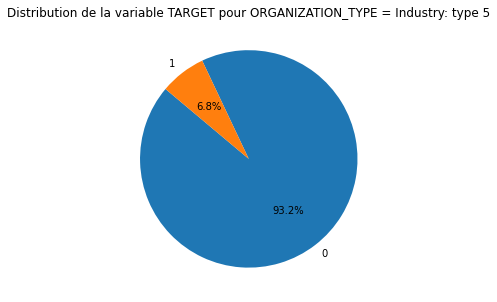

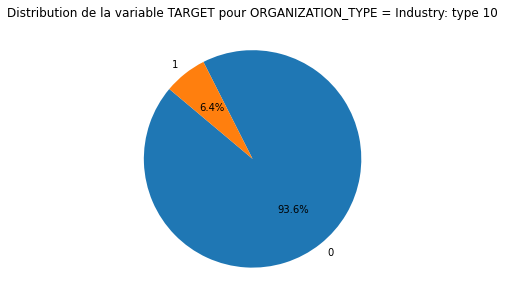

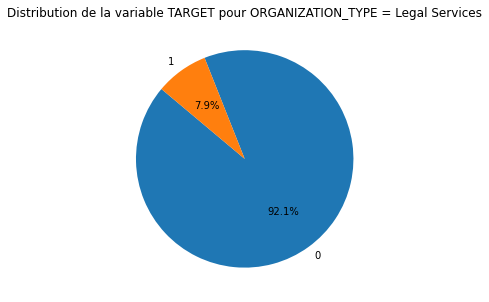

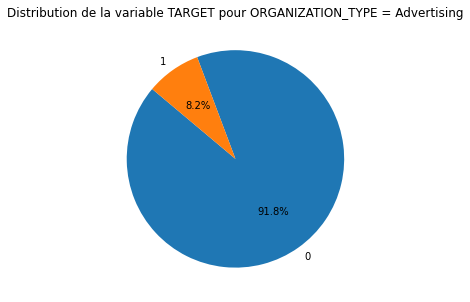

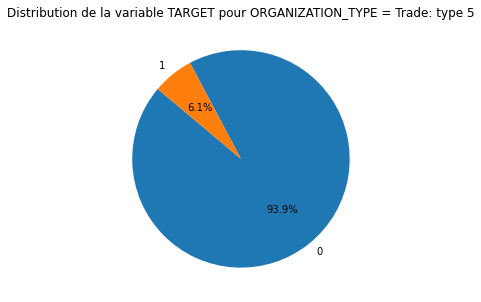

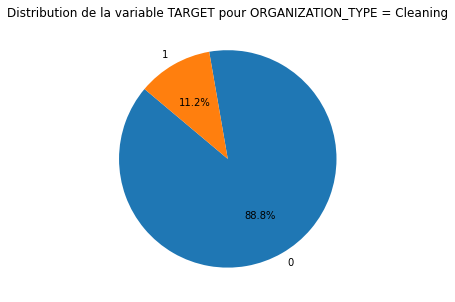

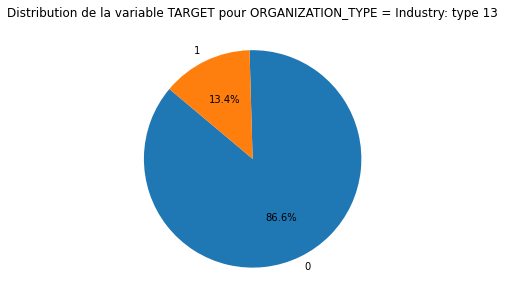

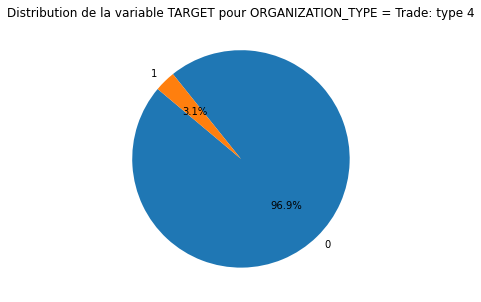

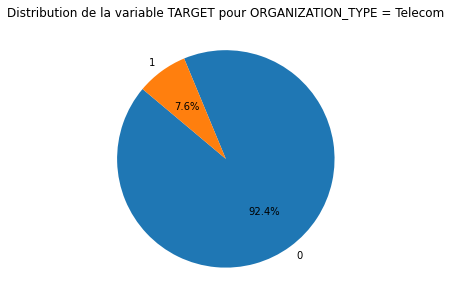

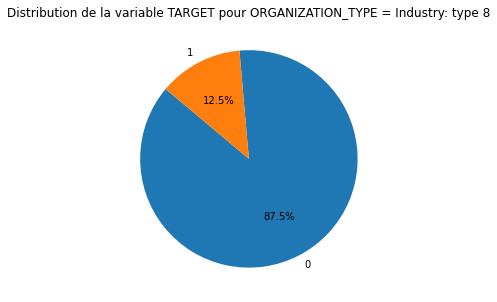

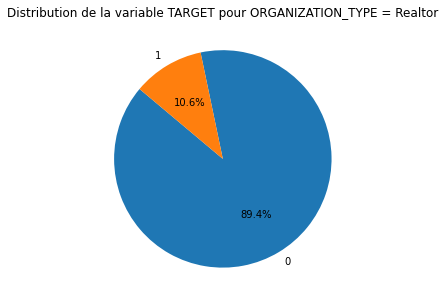

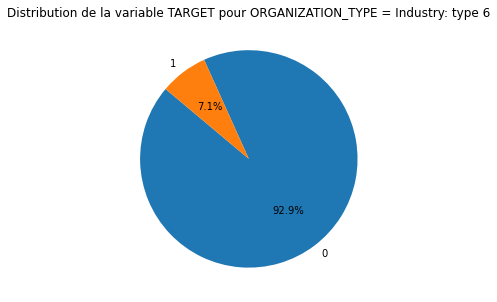

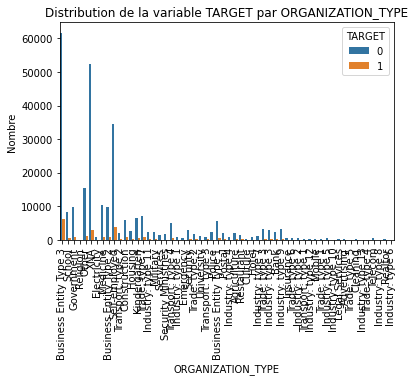

<Figure size 720x360 with 0 Axes>

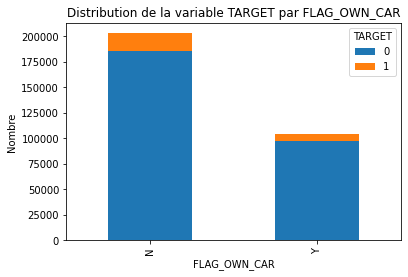

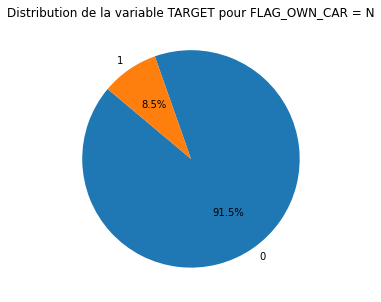

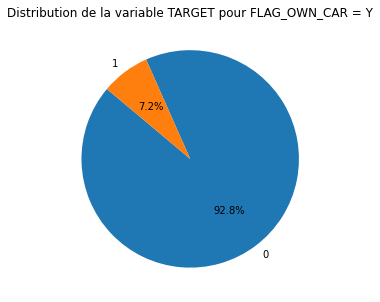

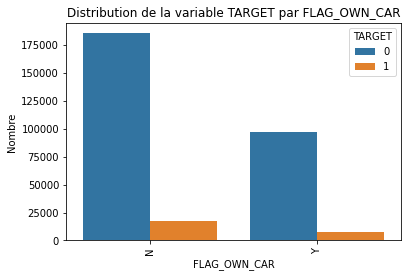

<Figure size 720x360 with 0 Axes>

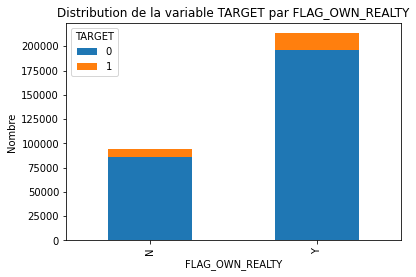

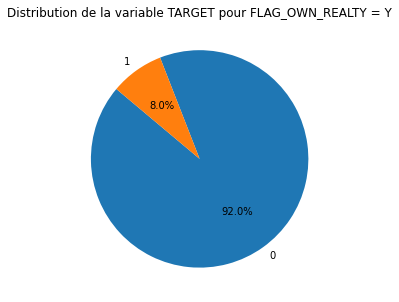

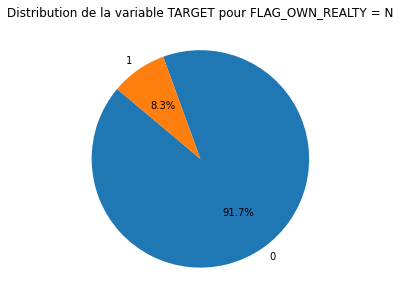

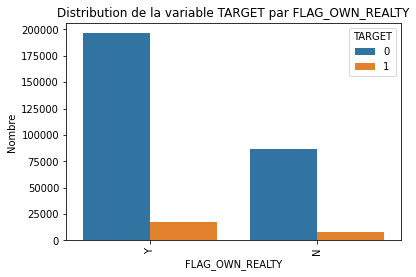

In [101]:
data = application_train

# Liste des variables qualitatives
variables_qualitatives = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                          'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Parcourir chaque variable qualitative
for var in variables_qualitatives:
    plt.figure(figsize=(10, 5))
    
    # Diagramme en barres empilées
    data.groupby([var, 'TARGET']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Distribution de la variable TARGET par {var}')
    plt.xlabel(var)
    plt.ylabel('Nombre')
    plt.show()
    
    # Diagramme en camembert
    for category in data[var].unique():
        plt.figure(figsize=(5, 5))
        data[data[var] == category].groupby('TARGET').size().plot(kind='pie', autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution de la variable TARGET pour {var} = {category}')
        plt.ylabel('')
        plt.show()
    
    # Histogramme
    sns.countplot(x=var, hue='TARGET', data=data)
    plt.title(f'Distribution de la variable TARGET par {var}')
    plt.xlabel(var)
    plt.ylabel('Nombre')
    plt.xticks(rotation=90)
    plt.show()


1. **CODE_GENDER :**

* Les hommes et les femmes ont des distributions similaires de TARGET, sans différence significative en fonction du sexe.

2. **NAME_EDUCATION_TYPE :**

* Les individus ayant une éducation supérieure semblent avoir une légèrement meilleure performance (moins de la catégorie orange de TARGET).

3. **NAME_FAMILY_STATUS :**

* Les célibataires ou non mariés ont une proportion légèrement plus élevée de défauts (catégorie orange) par rapport à ceux qui sont mariés.

4. **NAME_HOUSING_TYPE :**

* Les individus vivant dans un appartement loué sont légèrement plus susceptibles d'avoir des défauts.

5. **OCCUPATION_TYPE :**

* Les travailleurs non qualifiés ont une proportion plus élevée de défauts par rapport à d'autres types d'occupations.

6. **ORGANIZATION_TYPE :**

* Certains types d'organisations, tels que "Transport: type 3", montrent une proportion plus élevée de défauts.

7. **FLAG_OWN_CAR :**

* Posséder une voiture n'a pas d'impact majeur sur la distribution de TARGET.

8. **FLAG_OWN_REALTY :**

* Posséder un bien immobilier n'a pas d'impact majeur sur la distribution de TARGET.

9. **NAME_TYPE_SUITE :**

* La majorité des demandes sont faites sans accompagnement. Il n'y a pas de tendance clairement identifiable entre les différentes catégories.

10. **WEEKDAY_APPR_PROCESS_START :**

* Le jour de début du processus de demande n'a pas d'impact significatif sur la distribution de TARGET.

11. **HOUR_APPR_PROCESS_START :**

* L'heure de début du processus de demande n'a pas d'impact majeur sur la distribution de TARGET.

12. **REGION_RATING_CLIENT et REGION_RATING_CLIENT_W_CITY :**

* Les clients ayant une note de région de 3 (avec ou sans prise en compte de la ville) sont plus susceptibles d'avoir des défauts par rapport à ceux avec des notes de 1 ou 2.

13. **REG_CITY_NOT_LIVE_CITY :**

* Les clients dont la ville de résidence est différente de leur ville d'enregistrement sont légèrement plus susceptibles d'avoir des défauts.

<h3>Variables Qualitatives :</h3>

<h4>A. Recherchez des corrélations :</h4>

In [102]:
# Liste de vos variables qualitatives
variables_qualitatives = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Utilisation de itertools.combinations pour obtenir toutes les paires possibles de variables qualitatives
variable_pairs = itertools.combinations(variables_qualitatives, 2)

# Parcourir chaque paire de variables qualitatives
for var_pair in variable_pairs:
    var1, var2 = var_pair  # Décomposition de la paire en deux variables distinctes
    
    # Extraction des modalités et initialisation du tableau de contingence
    var1_modalities = application_train[var1].unique()
    var2_modalities = application_train[var2].unique()
    contingency_table = pd.DataFrame(index=var1_modalities, columns=var2_modalities, dtype=int)
    
    # Calcul des effectifs
    for mod1 in var1_modalities:
        for mod2 in var2_modalities:
            count = len(application_train[(application_train[var1] == mod1) & (application_train[var2] == mod2)])
            contingency_table.loc[mod1, mod2] = count
    
    display(f'Tableau de contingence pour {var1} et {var2} :')
    display(contingency_table)  
    display('\n' + '-'*50 + '\n')  

'Tableau de contingence pour CODE_GENDER et NAME_EDUCATION_TYPE :'

Secondary / secondary special  Higher education  Incomplete higher  \
M                          74924.0           24573.0             3993.0   
F                         143465.0           50289.0             6283.0   
XNA                            2.0               1.0                1.0   

     Lower secondary  Academic degree  
M             1505.0             64.0  
F             2311.0            100.0  
XNA              0.0              0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour CODE_GENDER et NAME_FAMILY_STATUS :'

Single / not married   Married  Civil marriage    Widow  Separated  \
M                 16860.0   73984.0          9005.0    900.0     4309.0   
F                 28584.0  122445.0         20769.0  15188.0    15461.0   
XNA                   0.0       3.0             1.0      0.0        0.0   

     Unknown  
M        1.0  
F        1.0  
XNA      0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour CODE_GENDER et NAME_HOUSING_TYPE :'

House / apartment  Rented apartment  With parents  Municipal apartment  \
M              91273.0            2148.0        6797.0               3309.0   
F             181592.0            2733.0        8043.0               7873.0   
XNA                3.0               0.0           0.0                  1.0   

     Office apartment  Co-op apartment  
M              1084.0            448.0  
F              1533.0            674.0  
XNA               0.0              0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour CODE_GENDER et OCCUPATION_TYPE :'

Laborers  Core staff  Accountants  Managers  NaN  Drivers  Sales staff  \
M     32047.0      5788.0        284.0    9778.0  0.0  17678.0       3829.0   
F     23139.0     21781.0       9529.0   11593.0  0.0    925.0      28273.0   
XNA       0.0         1.0          0.0       0.0  0.0      0.0          0.0   

     Cleaning staff  Cooking staff  Private service staff  Medicine staff  \
M             339.0          561.0                  114.0           240.0   
F            4314.0         5385.0                 2538.0          8297.0   
XNA             0.0            0.0                    0.0             0.0   

     Security staff  High skill tech staff  Waiters/barmen staff  \
M            4683.0                 4030.0                 166.0   
F            2038.0                 7350.0                1182.0   
XNA             0.0                    0.0                   0.0   

     Low-skill Laborers  Realty agents  Secretaries  IT staff  HR staff  
M                1772.0           62.0         58.0     368.0      39.0  
F                 320.0          689.0       1247.0     158.0     524.0  
XNA                 1.0            0.0          0.0       0.0       0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour CODE_GENDER et ORGANIZATION_TYPE :'

Business Entity Type 3  School  Government  Religion    Other      XNA  \
M                   29934.0  1205.0      2909.0      44.0   5888.0  10103.0   
F                   38058.0  7688.0      7495.0      41.0  10795.0  45271.0   
XNA                     0.0     0.0         0.0       0.0      0.0      0.0   

     Electricity  Medicine  Business Entity Type 2  Self-employed  ...  \
M          490.0    1167.0                  4754.0        12740.0  ...   
F          460.0   10025.0                  5799.0        25672.0  ...   
XNA          0.0       1.0                     0.0            0.0  ...   

     Legal Services  Advertising  Trade: type 5  Cleaning  Industry: type 13  \
M             124.0        167.0            3.0      69.0               44.0   
F             181.0        262.0           46.0     191.0               23.0   
XNA             0.0          0.0            0.0       0.0                0.0   

     Trade: type 4  Telecom  Industry: type 8  Realtor  Industry: type 6  
M             18.0    259.0              11.0     93.0              26.0  
F             46.0    318.0              13.0    303.0              86.0  
XNA            0.0      0.0               0.0      0.0               0.0  

[3 rows x 58 columns]

'\n--------------------------------------------------\n'

'Tableau de contingence pour CODE_GENDER et FLAG_OWN_CAR :'

N        Y
M     45433.0  59626.0
F    157489.0  44959.0
XNA       2.0      2.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour CODE_GENDER et FLAG_OWN_REALTY :'

Y        N
M     69893.0  35166.0
F    143415.0  59033.0
XNA       4.0      0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_EDUCATION_TYPE et NAME_FAMILY_STATUS :'

Single / not married   Married  Civil marriage  \
Secondary / secondary special               29450.0  139715.0         22110.0   
Higher education                            12603.0   48806.0          6088.0   
Incomplete higher                            2783.0    5610.0          1157.0   
Lower secondary                               579.0    2195.0           412.0   
Academic degree                                29.0     106.0             8.0   

                                 Widow  Separated  Unknown  
Secondary / secondary special  13190.0    13926.0      0.0  
Higher education                2308.0     5057.0      1.0  
Incomplete higher                173.0      554.0      0.0  
Lower secondary                  412.0      217.0      1.0  
Academic degree                    5.0       16.0      0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_EDUCATION_TYPE et NAME_HOUSING_TYPE :'

House / apartment  Rented apartment  \
Secondary / secondary special           194306.0            3421.0   
Higher education                         66862.0            1063.0   
Incomplete higher                         8366.0             312.0   
Lower secondary                           3187.0              79.0   
Academic degree                            147.0               6.0   

                               With parents  Municipal apartment  \
Secondary / secondary special        9518.0               8910.0   
Higher education                     3960.0               1688.0   
Incomplete higher                    1135.0                307.0   
Lower secondary                       222.0                277.0   
Academic degree                         5.0                  1.0   

                               Office apartment  Co-op apartment  
Secondary / secondary special            1675.0            561.0  
Higher education                          801.0            489.0  
Incomplete higher                          97.0             60.0  
Lower secondary                            41.0             10.0  
Academic degree                             3.0              2.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_EDUCATION_TYPE et OCCUPATION_TYPE :'

Laborers  Core staff  Accountants  Managers  \
Secondary / secondary special   46282.0     12643.0       3544.0    8847.0   
Higher education                 6578.0     13313.0       5798.0   11499.0   
Incomplete higher                1587.0      1466.0        445.0     931.0   
Lower secondary                   730.0       123.0         18.0      57.0   
Academic degree                     9.0        25.0          8.0      37.0   

                               NaN  Drivers  Sales staff  Cleaning staff  \
Secondary / secondary special  0.0  15808.0      24835.0          4244.0   
Higher education               0.0   2050.0       5562.0           250.0   
Incomplete higher              0.0    491.0       1468.0            49.0   
Lower secondary                0.0    249.0        228.0           108.0   
Academic degree                0.0      5.0          9.0             2.0   

                               Cooking staff  Private service staff  \
Secondary / secondary special         5336.0                 2006.0   
Higher education                       427.0                  519.0   
Incomplete higher                      118.0                  114.0   
Lower secondary                         64.0                   11.0   
Academic degree                          1.0                    2.0   

                               Medicine staff  Security staff  \
Secondary / secondary special          7315.0          5643.0   
Higher education                        999.0           821.0   
Incomplete higher                       146.0           156.0   
Lower secondary                          77.0            97.0   
Academic degree                           0.0             4.0   

                               High skill tech staff  Waiters/barmen staff  \
Secondary / secondary special                 6106.0                1058.0   
Higher education                              4655.0                 179.0   
Incomplete higher                              585.0                  94.0   
Lower secondary                                 31.0                  17.0   
Academic degree                                  3.0                   0.0   

                               Low-skill Laborers  Realty agents  Secretaries  \
Secondary / secondary special              1889.0          474.0        724.0   
Higher education                             81.0          227.0        481.0   
Incomplete higher                            30.0           47.0         96.0   
Lower secondary                              92.0            2.0          4.0   
Academic degree                               1.0            1.0          0.0   

                               IT staff  HR staff  
Secondary / secondary special     132.0     170.0  
Higher education                  341.0     357.0  
Incomplete higher                  52.0      36.0  
Lower secondary                     1.0       0.0  
Academic degree                     0.0       0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_EDUCATION_TYPE et ORGANIZATION_TYPE :'

Business Entity Type 3  School  Government  \
Secondary / secondary special                 45575.0  4367.0      6462.0   
Higher education                              18615.0  4224.0      3566.0   
Incomplete higher                              3147.0   234.0       296.0   
Lower secondary                                 614.0    63.0        77.0   
Academic degree                                  41.0     5.0         3.0   

                               Religion    Other      XNA  Electricity  \
Secondary / secondary special      57.0  10912.0  45105.0        616.0   
Higher education                   22.0   4994.0   8194.0        289.0   
Incomplete higher                   5.0    587.0    520.0         32.0   
Lower secondary                     1.0    173.0   1529.0         11.0   
Academic degree                     0.0     17.0     26.0          2.0   

                               Medicine  Business Entity Type 2  \
Secondary / secondary special    8569.0                  7768.0   
Higher education                 2296.0                  2328.0   
Incomplete higher                 230.0                   346.0   
Lower secondary                    95.0                   110.0   
Academic degree                     3.0                     1.0   

                               Self-employed  ...  Legal Services  \
Secondary / secondary special        29653.0  ...            42.0   
Higher education                      6972.0  ...           257.0   
Incomplete higher                     1370.0  ...             6.0   
Lower secondary                        412.0  ...             0.0   
Academic degree                          5.0  ...             0.0   

                               Advertising  Trade: type 5  Cleaning  \
Secondary / secondary special        195.0           27.0     204.0   
Higher education                     209.0           19.0      43.0   
Incomplete higher                     23.0            3.0       5.0   
Lower secondary                        1.0            0.0       8.0   
Academic degree                        1.0            0.0       0.0   

                               Industry: type 13  Trade: type 4  Telecom  \
Secondary / secondary special               55.0           36.0    289.0   
Higher education                             6.0           24.0    256.0   
Incomplete higher                            0.0            4.0     28.0   
Lower secondary                              6.0            0.0      4.0   
Academic degree                              0.0            0.0      0.0   

                               Industry: type 8  Realtor  Industry: type 6  
Secondary / secondary special              18.0    162.0              81.0  
Higher education                            4.0    202.0              30.0  
Incomplete higher                           2.0     30.0               1.0  
Lower secondary                             0.0      0.0               0.0  
Academic degree                             0.0      2.0               0.0  

[5 rows x 58 columns]

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_EDUCATION_TYPE et FLAG_OWN_CAR :'

N        Y
Secondary / secondary special  149917.0  68474.0
Higher education                43591.0  31272.0
Incomplete higher                6443.0   3834.0
Lower secondary                  2871.0    945.0
Academic degree                   102.0     62.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_EDUCATION_TYPE et FLAG_OWN_REALTY :'

Y        N
Secondary / secondary special  153133.0  65258.0
Higher education                50996.0  23867.0
Incomplete higher                6561.0   3716.0
Lower secondary                  2507.0   1309.0
Academic degree                   115.0     49.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_FAMILY_STATUS et NAME_HOUSING_TYPE :'

House / apartment  Rented apartment  With parents  \
Single / not married            36409.0            1238.0        5264.0   
Married                        178292.0            2593.0        6755.0   
Civil marriage                  26058.0             616.0        1621.0   
Widow                           14930.0              94.0         144.0   
Separated                       17178.0             340.0        1056.0   
Unknown                             1.0               0.0           0.0   

                      Municipal apartment  Office apartment  Co-op apartment  
Single / not married               1875.0             382.0            276.0  
Married                            6386.0            1728.0            678.0  
Civil marriage                     1178.0             227.0             75.0  
Widow                               786.0             107.0             27.0  
Separated                           957.0             173.0             66.0  
Unknown                               1.0               0.0              0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_FAMILY_STATUS et OCCUPATION_TYPE :'

Laborers  Core staff  Accountants  Managers  NaN  \
Single / not married    8526.0      4485.0       1482.0    2723.0  0.0   
Married                36299.0     18273.0       6418.0   15185.0  0.0   
Civil marriage          5914.0      2519.0        889.0    1720.0  0.0   
Widow                   1213.0       643.0        292.0     462.0  0.0   
Separated               3234.0      1650.0        731.0    1280.0  0.0   
Unknown                    0.0         0.0          1.0       1.0  0.0   

                      Drivers  Sales staff  Cleaning staff  Cooking staff  \
Single / not married   2284.0       5424.0           639.0          844.0   
Married               13672.0      19323.0          2587.0         3696.0   
Civil marriage         1719.0       4274.0           536.0          706.0   
Widow                   111.0        936.0           446.0          284.0   
Separated               817.0       2145.0           445.0          416.0   
Unknown                   0.0          0.0             0.0            0.0   

                      Private service staff  Medicine staff  Security staff  \
Single / not married                  517.0          1133.0          1018.0   
Married                              1509.0          5486.0          4326.0   
Civil marriage                        302.0           842.0           746.0   
Widow                                  58.0           415.0           185.0   
Separated                             266.0           661.0           446.0   
Unknown                                 0.0             0.0             0.0   

                      High skill tech staff  Waiters/barmen staff  \
Single / not married                 1972.0                 357.0   
Married                              7402.0                 653.0   
Civil marriage                        986.0                 196.0   
Widow                                 269.0                  42.0   
Separated                             751.0                 100.0   
Unknown                                 0.0                   0.0   

                      Low-skill Laborers  Realty agents  Secretaries  \
Single / not married               440.0          149.0        218.0   
Married                           1209.0          454.0        843.0   
Civil marriage                     329.0           79.0        138.0   
Widow                               24.0           17.0         26.0   
Separated                           91.0           52.0         80.0   
Unknown                              0.0            0.0          0.0   

                      IT staff  HR staff  
Single / not married     150.0      90.0  
Married                  302.0     363.0  
Civil marriage            42.0      44.0  
Widow                      4.0      20.0  
Separated                 28.0      46.0  
Unknown                    0.0       0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_FAMILY_STATUS et ORGANIZATION_TYPE :'

Business Entity Type 3  School  Government  Religion  \
Single / not married                 11788.0  1066.0      1400.0      20.0   
Married                              42783.0  6169.0      7013.0      58.0   
Civil marriage                        7559.0   694.0       925.0       4.0   
Widow                                 1531.0   385.0       368.0       0.0   
Separated                             4331.0   579.0       698.0       3.0   
Unknown                                  0.0     0.0         0.0       0.0   

                        Other      XNA  Electricity  Medicine  \
Single / not married   2604.0   6128.0        140.0    1449.0   
Married               10839.0  32518.0        637.0    7377.0   
Civil marriage         1540.0   3578.0         63.0    1042.0   
Widow                   557.0   9380.0         38.0     539.0   
Separated              1143.0   3770.0         72.0     786.0   
Unknown                   0.0      0.0          0.0       0.0   

                      Business Entity Type 2  Self-employed  ...  \
Single / not married                  1597.0         5650.0  ...   
Married                               6982.0        24888.0  ...   
Civil marriage                        1031.0         4591.0  ...   
Widow                                  284.0          946.0  ...   
Separated                              658.0         2337.0  ...   
Unknown                                  1.0            0.0  ...   

                      Legal Services  Advertising  Trade: type 5  Cleaning  \
Single / not married            71.0         99.0           10.0      51.0   
Married                        178.0        254.0           29.0     140.0   
Civil marriage                  25.0         38.0            3.0      37.0   
Widow                            4.0         12.0            1.0      12.0   
Separated                       27.0         26.0            6.0      20.0   
Unknown                          0.0          0.0            0.0       0.0   

                      Industry: type 13  Trade: type 4  Telecom  \
Single / not married               11.0           13.0    122.0   
Married                            42.0           41.0    362.0   
Civil marriage                     10.0            8.0     48.0   
Widow                               1.0            1.0      8.0   
Separated                           3.0            1.0     37.0   
Unknown                             0.0            0.0      0.0   

                      Industry: type 8  Realtor  Industry: type 6  
Single / not married               2.0     81.0              18.0  
Married                           21.0    232.0              73.0  
Civil marriage                     0.0     48.0              15.0  
Widow                              0.0     10.0               1.0  
Separated                          1.0     25.0               5.0  
Unknown                            0.0      0.0               0.0  

[6 rows x 58 columns]

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_FAMILY_STATUS et FLAG_OWN_CAR :'

N        Y
Single / not married   33248.0  12196.0
Married               119182.0  77250.0
Civil marriage         20935.0   8840.0
Widow                  14343.0   1745.0
Separated              15214.0   4556.0
Unknown                    2.0      0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_FAMILY_STATUS et FLAG_OWN_REALTY :'

Y        N
Single / not married   29503.0  15941.0
Married               137472.0  58960.0
Civil marriage         20632.0   9143.0
Widow                  12251.0   3837.0
Separated              13452.0   6318.0
Unknown                    2.0      0.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_HOUSING_TYPE et OCCUPATION_TYPE :'

Laborers  Core staff  Accountants  Managers  NaN  \
House / apartment     47903.0     23902.0       8811.0   19434.0  0.0   
Rented apartment       1104.0       492.0        113.0     297.0  0.0   
With parents           3360.0      1726.0        518.0     825.0  0.0   
Municipal apartment    2132.0       977.0        262.0     510.0  0.0   
Office apartment        456.0       371.0         77.0     220.0  0.0   
Co-op apartment         231.0       102.0         32.0      85.0  0.0   

                     Drivers  Sales staff  Cleaning staff  Cooking staff  \
House / apartment    16239.0      27789.0          4063.0         5143.0   
Rented apartment       391.0        735.0            81.0          132.0   
With parents          1144.0       2202.0           139.0          318.0   
Municipal apartment    599.0       1062.0           317.0          280.0   
Office apartment       153.0        187.0            45.0           45.0   
Co-op apartment         77.0        127.0             8.0           28.0   

                     Private service staff  Medicine staff  Security staff  \
House / apartment                   2332.0          7578.0          5951.0   
Rented apartment                      59.0           102.0            85.0   
With parents                         155.0           367.0           276.0   
Municipal apartment                   80.0           365.0           330.0   
Office apartment                      13.0            84.0            57.0   
Co-op apartment                       13.0            41.0            22.0   

                     High skill tech staff  Waiters/barmen staff  \
House / apartment                   9964.0                1088.0   
Rented apartment                     219.0                  51.0   
With parents                         617.0                 125.0   
Municipal apartment                  411.0                  61.0   
Office apartment                     117.0                  14.0   
Co-op apartment                       52.0                   9.0   

                     Low-skill Laborers  Realty agents  Secretaries  IT staff  \
House / apartment                1775.0          648.0       1147.0     426.0   
Rented apartment                   54.0           15.0         21.0      10.0   
With parents                      163.0           54.0         83.0      69.0   
Municipal apartment                77.0           25.0         40.0      10.0   
Office apartment                   16.0            8.0          7.0      11.0   
Co-op apartment                     8.0            1.0          7.0       0.0   

                     HR staff  
House / apartment       492.0  
Rented apartment          9.0  
With parents             36.0  
Municipal apartment      12.0  
Office apartment         12.0  
Co-op apartment           2.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_HOUSING_TYPE et ORGANIZATION_TYPE :'

Business Entity Type 3  School  Government  Religion  \
House / apartment                   58900.0  7948.0      9283.0      71.0   
Rented apartment                     1487.0    96.0       113.0       1.0   
With parents                         4356.0   348.0       459.0       6.0   
Municipal apartment                  2462.0   395.0       430.0       4.0   
Office apartment                      475.0    84.0        81.0       3.0   
Co-op apartment                       312.0    22.0        38.0       0.0   

                       Other      XNA  Electricity  Medicine  \
House / apartment    14694.0  52385.0        850.0    9998.0   
Rented apartment       269.0    205.0          9.0     111.0   
With parents           821.0    219.0         48.0     473.0   
Municipal apartment    638.0   2133.0         36.0     459.0   
Office apartment       200.0    316.0          3.0     102.0   
Co-op apartment         61.0    116.0          4.0      50.0   

                     Business Entity Type 2  Self-employed  ...  \
House / apartment                    9255.0        33846.0  ...   
Rented apartment                      170.0          804.0  ...   
With parents                          593.0         2325.0  ...   
Municipal apartment                   394.0         1066.0  ...   
Office apartment                       84.0          234.0  ...   
Co-op apartment                        57.0          137.0  ...   

                     Legal Services  Advertising  Trade: type 5  Cleaning  \
House / apartment             281.0        366.0           45.0     237.0   
Rented apartment                1.0         10.0            1.0       4.0   
With parents                   17.0         38.0            2.0      10.0   
Municipal apartment             3.0          8.0            1.0       9.0   
Office apartment                3.0          3.0            0.0       0.0   
Co-op apartment                 0.0          4.0            0.0       0.0   

                     Industry: type 13  Trade: type 4  Telecom  \
House / apartment                 56.0           56.0    497.0   
Rented apartment                   2.0            1.0      2.0   
With parents                       7.0            5.0     53.0   
Municipal apartment                1.0            1.0     21.0   
Office apartment                   0.0            0.0      3.0   
Co-op apartment                    1.0            1.0      1.0   

                     Industry: type 8  Realtor  Industry: type 6  
House / apartment                21.0    351.0              95.0  
Rented apartment                  0.0      8.0               4.0  
With parents                      1.0     21.0               7.0  
Municipal apartment               1.0     11.0               5.0  
Office apartment                  1.0      3.0               1.0  
Co-op apartment                   0.0      2.0               0.0  

[6 rows x 58 columns]

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_HOUSING_TYPE et FLAG_OWN_CAR :'

N        Y
House / apartment    179274.0  93594.0
Rented apartment       3375.0   1506.0
With parents           9596.0   5244.0
Municipal apartment    8397.0   2786.0
Office apartment       1621.0    996.0
Co-op apartment         661.0    461.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour NAME_HOUSING_TYPE et FLAG_OWN_REALTY :'

Y        N
House / apartment    199197.0  73671.0
Rented apartment       2086.0   2795.0
With parents           5577.0   9263.0
Municipal apartment    4361.0   6822.0
Office apartment       1393.0   1224.0
Co-op apartment         698.0    424.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour OCCUPATION_TYPE et ORGANIZATION_TYPE :'

Business Entity Type 3  School  Government  Religion  \
Laborers                              17484.0   495.0      1330.0      15.0   
Core staff                             1217.0  4171.0      2519.0      23.0   
Accountants                            3249.0   187.0       618.0       3.0   
Managers                               7138.0   710.0      1029.0       5.0   
NaN                                       0.0     0.0         0.0       0.0   
Drivers                                5475.0   106.0       787.0       1.0   
Sales staff                            8853.0    15.0       281.0       9.0   
Cleaning staff                         1253.0   427.0       328.0       1.0   
Cooking staff                          1620.0   503.0       141.0       2.0   
Private service staff                   478.0     6.0        21.0       0.0   
Medicine staff                          319.0    84.0       224.0       1.0   
Security staff                         1369.0   365.0       307.0       1.0   
High skill tech staff                  3153.0   204.0       523.0       3.0   
Waiters/barmen staff                    527.0    12.0        25.0       0.0   
Low-skill Laborers                      753.0    18.0        51.0       0.0   
Realty agents                           174.0     2.0         1.0       0.0   
Secretaries                             205.0    96.0        80.0       0.0   
IT staff                                166.0    36.0        28.0       0.0   
HR staff                                222.0    13.0        28.0       0.0   

                        Other  XNA  Electricity  Medicine  \
Laborers               3016.0  0.0        438.0     515.0   
Core staff              729.0  0.0         30.0    1323.0   
Accountants             738.0  0.0         27.0     258.0   
Managers               1330.0  0.0         59.0     338.0   
NaN                       0.0  0.0          0.0       0.0   
Drivers                 946.0  0.0        100.0     284.0   
Sales staff             923.0  0.0          5.0      83.0   
Cleaning staff          478.0  2.0         22.0     101.0   
Cooking staff           381.0  0.0          7.0     275.0   
Private service staff   138.0  0.0          1.0      55.0   
Medicine staff         1034.0  0.0         10.0    5937.0   
Security staff          525.0  0.0          4.0      94.0   
High skill tech staff   783.0  0.0        117.0     324.0   
Waiters/barmen staff     81.0  0.0          0.0     137.0   
Low-skill Laborers      115.0  0.0          6.0      12.0   
Realty agents            47.0  0.0          0.0       4.0   
Secretaries             136.0  0.0          3.0     345.0   
IT staff                 48.0  0.0          3.0      22.0   
HR staff                 43.0  0.0          3.0      13.0   

                       Business Entity Type 2  Self-employed  ...  \
Laborers                               4429.0         6298.0  ...   
Core staff                              260.0         2638.0  ...   
Accountants                             307.0         1255.0  ...   
Managers                                497.0         3270.0  ...   
NaN                                       0.0            0.0  ...   
Drivers                                 602.0         4179.0  ...   
Sales staff                             338.0        13189.0  ...   
Cleaning staff                          232.0          259.0  ...   
Cooking staff                           143.0          736.0  ...   
Private service staff                    25.0         1134.0  ...   
Medicine staff                           28.0           28.0  ...   
Security staff                          164.0          215.0  ...   
High skill tech staff                  1040.0          699.0  ...   
Waiters/barmen staff                     28.0          160.0  ...   
Low-skill Laborers                      104.0          419.0  ...   
Realty agents                             5.0          244.0  ...   
Secretaries                              39.0   

'\n--------------------------------------------------\n'

'Tableau de contingence pour OCCUPATION_TYPE et FLAG_OWN_CAR :'

N        Y
Laborers               33490.0  21696.0
Core staff             18591.0   8979.0
Accountants             6374.0   3439.0
Managers               10193.0  11178.0
NaN                        0.0      0.0
Drivers                 5802.0  12801.0
Sales staff            23478.0   8624.0
Cleaning staff          4021.0    632.0
Cooking staff           4769.0   1177.0
Private service staff   1878.0    774.0
Medicine staff          6628.0   1909.0
Security staff          4083.0   2638.0
High skill tech staff   6971.0   4409.0
Waiters/barmen staff    1075.0    273.0
Low-skill Laborers      1448.0    645.0
Realty agents            499.0    252.0
Secretaries              967.0    338.0
IT staff                 296.0    230.0
HR staff                 376.0    187.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour OCCUPATION_TYPE et FLAG_OWN_REALTY :'

Y        N
Laborers               37551.0  17635.0
Core staff             18413.0   9157.0
Accountants             6659.0   3154.0
Managers               14756.0   6615.0
NaN                        0.0      0.0
Drivers                12202.0   6401.0
Sales staff            22042.0  10060.0
Cleaning staff          3336.0   1317.0
Cooking staff           4086.0   1860.0
Private service staff   1820.0    832.0
Medicine staff          5962.0   2575.0
Security staff          4691.0   2030.0
High skill tech staff   7729.0   3651.0
Waiters/barmen staff     870.0    478.0
Low-skill Laborers      1418.0    675.0
Realty agents            505.0    246.0
Secretaries              860.0    445.0
IT staff                 314.0    212.0
HR staff                 386.0    177.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour ORGANIZATION_TYPE et FLAG_OWN_CAR :'

N        Y
Business Entity Type 3  40535.0  27457.0
School                   6471.0   2422.0
Government               6849.0   3555.0
Religion                   51.0     34.0
Other                   10739.0   5944.0
XNA                     45205.0  10169.0
Electricity               568.0    382.0
Medicine                 8270.0   2923.0
Business Entity Type 2   6619.0   3934.0
Self-employed           23916.0  14496.0
Transport: type 2        1193.0   1011.0
Construction             3445.0   3276.0
Housing                  1817.0   1141.0
Kindergarten             5404.0   1476.0
Trade: type 7            5260.0   2571.0
Industry: type 11        1767.0    937.0
Military                 1322.0   1312.0
Services                 1122.0    453.0
Security Ministries      1109.0    865.0
Transport: type 4        2610.0   2788.0
Industry: type 1          574.0    465.0
Emergency                 242.0    318.0
Security                 1829.0   1418.0
Trade: type 2            1203.0    697.0
University                901.0    426.0
Transport: type 3         372.0    815.0
Police                   1211.0   1130.0
Business Entity Type 1   3780.0   2204.0
Postal                   1684.0    473.0
Industry: type 4          552.0    325.0
Agriculture              1450.0   1004.0
Restaurant               1356.0    455.0
Culture                   271.0    108.0
Hotel                     696.0    270.0
Industry: type 7          866.0    441.0
Trade: type 3            2443.0   1049.0
Industry: type 3         2246.0   1032.0
Bank                     1617.0    890.0
Industry: type 9         1671.0   1697.0
Insurance                 368.0    229.0
Trade: type 6             438.0    193.0
Industry: type 2          279.0    179.0
Transport: type 1         125.0     76.0
Industry: type 12         245.0    124.0
Mobile                    185.0    132.0
Trade: type 1             255.0     93.0
Industry: type 5          357.0    242.0
Industry: type 10          56.0     53.0
Legal Services            145.0    160.0
Advertising               269.0    160.0
Trade: type 5              40.0      9.0
Cleaning                  195.0     65.0
Industry: type 13          48.0     19.0
Trade: type 4              41.0     23.0
Telecom                   340.0    237.0
Industry: type 8           12.0     12.0
Realtor                   211.0    185.0
Industry: type 6           79.0     33.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour ORGANIZATION_TYPE et FLAG_OWN_REALTY :'

Y        N
Business Entity Type 3  45600.0  22392.0
School                   6207.0   2686.0
Government               7065.0   3339.0
Religion                   58.0     27.0
Other                   11305.0   5378.0
XNA                     42230.0  13144.0
Electricity               676.0    274.0
Medicine                 7782.0   3411.0
Business Entity Type 2   7149.0   3404.0
Self-employed           26438.0  11974.0
Transport: type 2        1442.0    762.0
Construction             4567.0   2154.0
Housing                  2062.0    896.0
Kindergarten             4724.0   2156.0
Trade: type 7            5422.0   2409.0
Industry: type 11        1925.0    779.0
Military                 1546.0   1088.0
Services                 1074.0    501.0
Security Ministries      1239.0    735.0
Transport: type 4        3593.0   1805.0
Industry: type 1          704.0    335.0
Emergency                 360.0    200.0
Security                 2232.0   1015.0
Trade: type 2            1262.0    638.0
University                894.0    433.0
Transport: type 3         835.0    352.0
Police                   1471.0    870.0
Business Entity Type 1   3936.0   2048.0
Postal                   1509.0    648.0
Industry: type 4          582.0    295.0
Agriculture              1733.0    721.0
Restaurant               1257.0    554.0
Culture                   260.0    119.0
Hotel                     656.0    310.0
Industry: type 7          928.0    379.0
Trade: type 3            2408.0   1084.0
Industry: type 3         2299.0    979.0
Bank                     1619.0    888.0
Industry: type 9         2251.0   1117.0
Insurance                 415.0    182.0
Trade: type 6             434.0    197.0
Industry: type 2          338.0    120.0
Transport: type 1         125.0     76.0
Industry: type 12         236.0    133.0
Mobile                    181.0    136.0
Trade: type 1             222.0    126.0
Industry: type 5          430.0    169.0
Industry: type 10          78.0     31.0
Legal Services            206.0     99.0
Advertising               285.0    144.0
Trade: type 5              39.0     10.0
Cleaning                  181.0     79.0
Industry: type 13          50.0     17.0
Trade: type 4              39.0     25.0
Telecom                   375.0    202.0
Industry: type 8           11.0     13.0
Realtor                   283.0    113.0
Industry: type 6           84.0     28.0

'\n--------------------------------------------------\n'

'Tableau de contingence pour FLAG_OWN_CAR et FLAG_OWN_REALTY :'

Y        N
N  140952.0  61972.0
Y   72360.0  32227.0

'\n--------------------------------------------------\n'

**Premières conclusions**


1. **Relation entre le genre et le niveau d'éducation :**

* Il y a plus de femmes que d'hommes dans chaque catégorie d'éducation.
* La catégorie d'éducation la plus fréquente est "Secondary / secondary special" pour les deux genres.

2. **Relation entre le genre et le statut familial :**

* La catégorie de statut familial la plus fréquente est "Marié" pour les deux genres.
* Il y a plus de femmes que d'hommes dans chaque catégorie de statut familial.

3. **Relation entre le genre et le type de logement :**

* La majorité des individus, quel que soit leur genre, vivent dans des maisons ou des appartements.
* La proportion de femmes vivant dans des maisons ou des appartements est plus élevée que celle des hommes.

4. **Relation entre le genre et le type d'occupation :**

* Les hommes sont plus nombreux dans des métiers tels que "Laborers", "Drivers" et "Managers".
* Les femmes sont plus nombreuses dans des métiers tels que "Core staff", "Sales staff" et "Cleaning staff".

5. **Relation entre le genre et le type d'organisation :**

* Les hommes et les femmes sont principalement associés à "Business Entity Type 3", mais les femmes sont également fortement représentées dans la catégorie "XNA".

6. **Relation entre le genre et la possession de voiture :**

* Un plus grand nombre d'hommes possèdent une voiture par rapport aux femmes.

7. **Relation entre le genre et la possession de biens immobiliers :**

* Un plus grand nombre de femmes possèdent des biens immobiliers par rapport aux hommes.

8. **Relation entre le niveau d'éducation et le statut familial :**

* Les individus mariés avec une éducation secondaire spéciale sont la catégorie la plus nombreuse.

9. **Relation entre le niveau d'éducation et le type de logement :**

* La majorité des individus, quel que soit leur niveau d'éducation, vivent dans des maisons ou des appartements.

10. **Relation entre le niveau d'éducation et le type d'occupation :**

* Les "Laborers" sont principalement associés à une éducation secondaire spéciale, tandis que les "Core staff" et les "Managers" sont plus associés à une éducation supérieure.

11. **Relation entre le niveau d'éducation et le type d'organisation :**

* Les individus avec une éducation secondaire spéciale sont principalement associés à "Business Entity Type 3" et "Self-employed".

12. **Relation entre le statut familial et le type de logement :**

* Les individus mariés vivent principalement dans des maisons ou des appartements.

13. **Relation entre le statut familial et le type d'occupation :**

* Les "Laborers" sont principalement des individus mariés, tandis que les "Core staff" sont répartis entre les individus mariés et célibataires.

14. **Relation entre le statut familial et le type d'organisation :**

* Les individus mariés sont principalement associés à "Business Entity Type 3" et "Self-employed".

15. **Relation entre le type de logement et le type d'occupation :**

* Les "Laborers" et les "Sales staff" vivent principalement dans des maisons ou des appartements.

16. **Relation entre le type de logement et le type d'organisation :**

* Les individus vivant dans des maisons ou des appartements sont principalement associés à "Business Entity Type 3".

<h4>B. Analysez des corrélations : </h4>

<h5>1. Genre et Niveau d'Éducation :</h5>

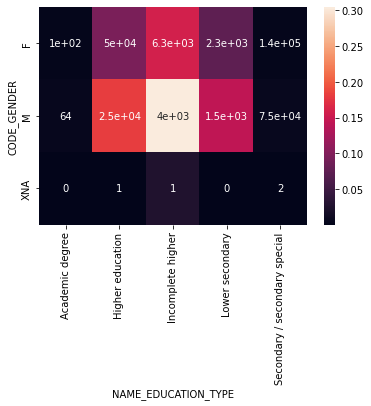

In [103]:
X = "CODE_GENDER"
Y = "NAME_EDUCATION_TYPE"

# Création d'un tableau de contingence
cont = application_train[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")

# Calculez la mesure de contribution à la non-indépendance
tx = cont.loc[:, "Total"]
ty = cont.loc["Total", :]
n = len(application_train)
indep = np.outer(tx, ty) / n
c = cont.fillna(0)
measure = (c - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n

sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1])
plt.show()

<h5>2. Genre et Type d'Occupation :</h5>

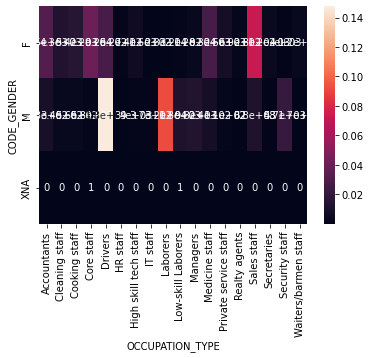

In [104]:
X = "CODE_GENDER"
Y = "OCCUPATION_TYPE"

# Création d'un tableau de contingence
cont = application_train[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")

# Calculez la mesure de contribution à la non-indépendance
tx = cont.loc[:, "Total"]
ty = cont.loc["Total", :]
n = len(application_train)
indep = np.outer(tx, ty) / n
c = cont.fillna(0)
measure = (c - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n

sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1])
plt.show()

<h5>3. Niveau d'Éducation et Type d'Occupation :</h5>

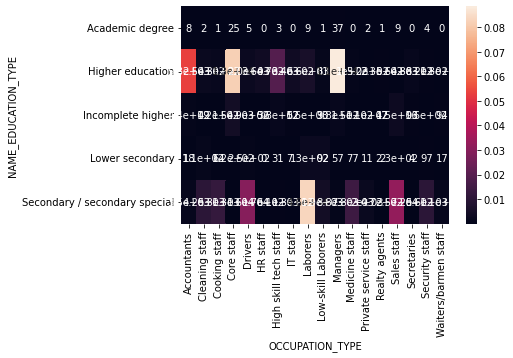

In [105]:
X = "NAME_EDUCATION_TYPE"
Y = "OCCUPATION_TYPE"

# Création d'un tableau de contingence
cont = application_train[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")

# Calculez la mesure de contribution à la non-indépendance
tx = cont.loc[:, "Total"]
ty = cont.loc["Total", :]
n = len(application_train)
indep = np.outer(tx, ty) / n
c = cont.fillna(0)
measure = (c - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n

sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1])
plt.show()

<h5>4. Statut Familial et Type de Logement :</h5>

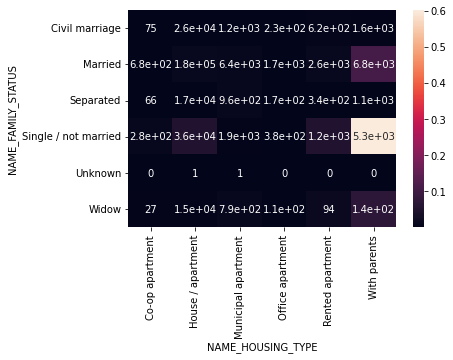

In [106]:
X = "NAME_FAMILY_STATUS"
Y = "NAME_HOUSING_TYPE"

# Création d'un tableau de contingence
cont = application_train[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")

# Calculez la mesure de contribution à la non-indépendance
tx = cont.loc[:, "Total"]
ty = cont.loc["Total", :]
n = len(application_train)
indep = np.outer(tx, ty) / n
c = cont.fillna(0)
measure = (c - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n

sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1])
plt.show()

<h5>5. Statut Familial et Type d'Occupation :</h5>

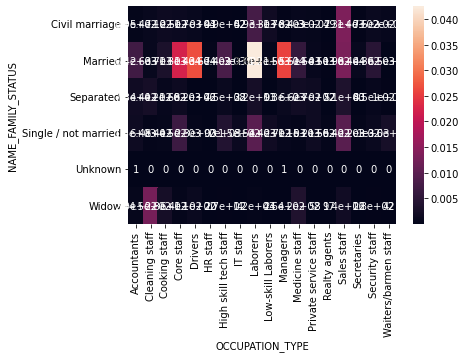

In [107]:
X = "NAME_FAMILY_STATUS"
Y = "OCCUPATION_TYPE"

# Création d'un tableau de contingence
cont = application_train[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")

# Calculez la mesure de contribution à la non-indépendance
tx = cont.loc[:, "Total"]
ty = cont.loc["Total", :]
n = len(application_train)
indep = np.outer(tx, ty) / n
c = cont.fillna(0)
measure = (c - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n

sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1])
plt.show()

<h5>6. Type de Logement et Type d'Occupation :</h5>

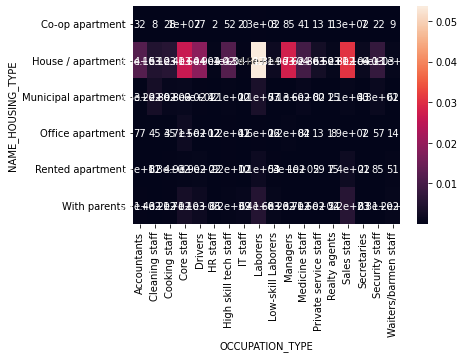

In [108]:
X = "NAME_HOUSING_TYPE"
Y = "OCCUPATION_TYPE"

# Création d'un tableau de contingence
cont = application_train[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")

# Calculez la mesure de contribution à la non-indépendance
tx = cont.loc[:, "Total"]
ty = cont.loc["Total", :]
n = len(application_train)
indep = np.outer(tx, ty) / n
c = cont.fillna(0)
measure = (c - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n

sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1])
plt.show()

<h5>7. Niveau d'Éducation et Type d'Organisation :</h5>

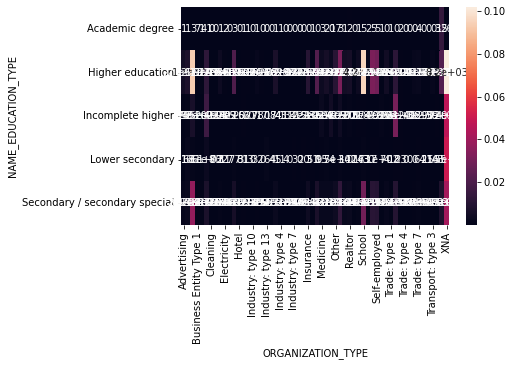

In [109]:
X = "NAME_EDUCATION_TYPE"
Y = "ORGANIZATION_TYPE"

# Création d'un tableau de contingence
cont = application_train[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")

# Calculez la mesure de contribution à la non-indépendance
tx = cont.loc[:, "Total"]
ty = cont.loc["Total", :]
n = len(application_train)
indep = np.outer(tx, ty) / n
c = cont.fillna(0)
measure = (c - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n

sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1])
plt.show()

<h3>Variables Quantitatives :</h3>

<h4>A. Recherchez des corrélations :</h4>

<h4>I.Diagramme de dispersion :</h4>

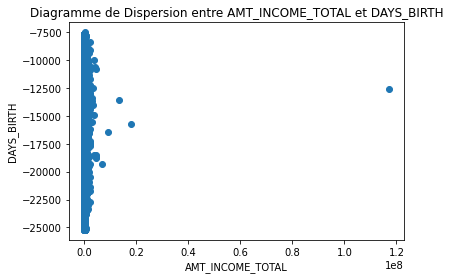

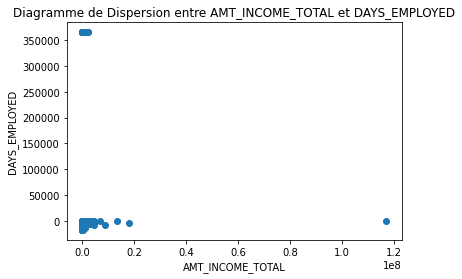

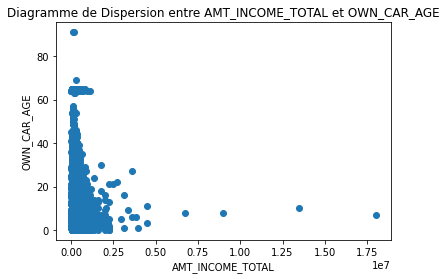

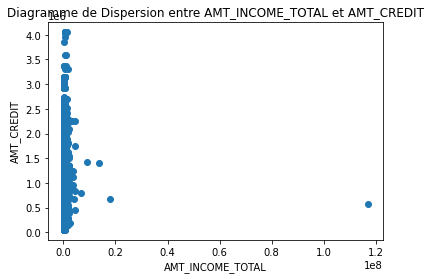

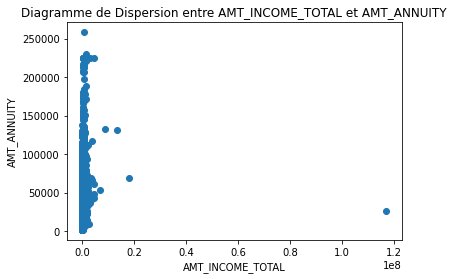

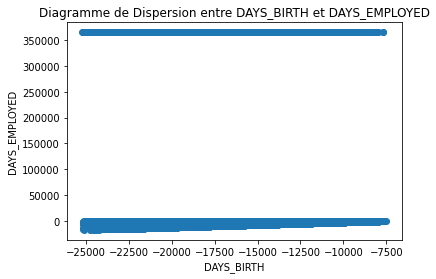

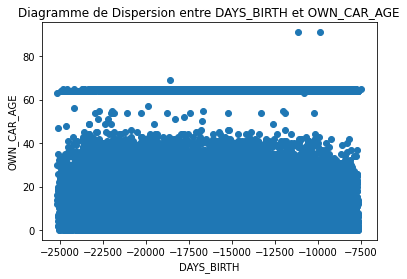

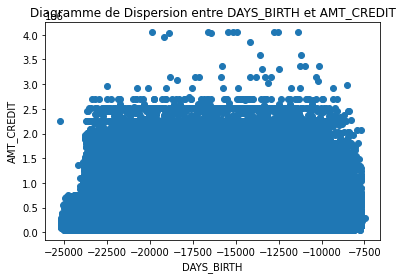

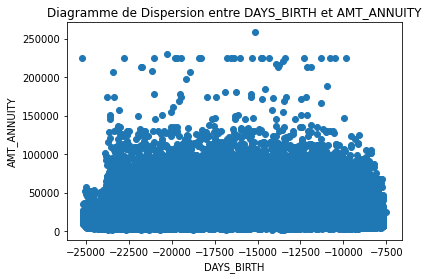

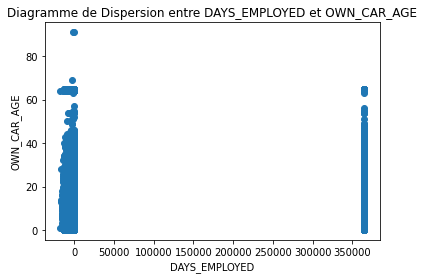

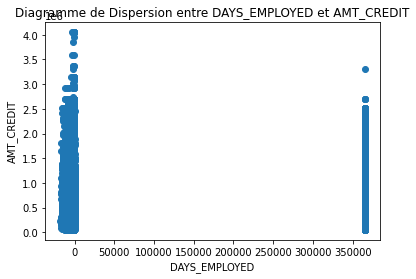

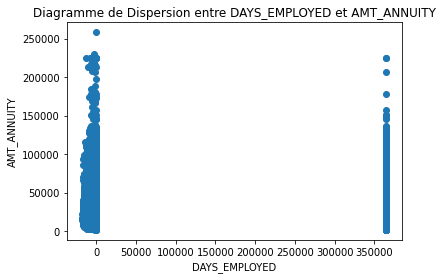

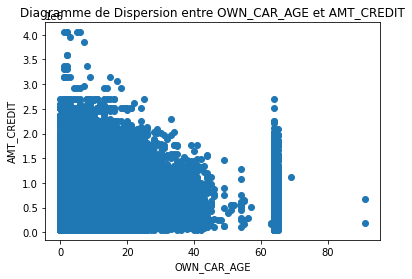

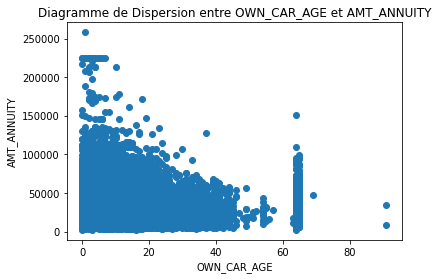

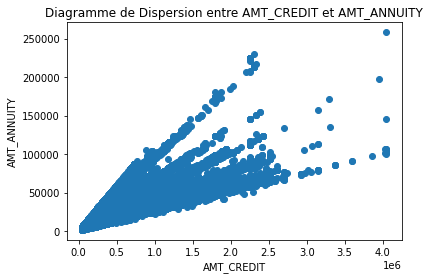

In [110]:
# Pour chaque paire de variables, ont crée un diagramme de dispersion
for i in range(len(variables_quantitatives)):
    for j in range(i+1, len(variables_quantitatives)):
        plt.figure()  # Crée une nouvelle figure
        plt.scatter(application_train[variables_quantitatives[i]], application_train[variables_quantitatives[j]])
        plt.xlabel(variables_quantitatives[i])
        plt.ylabel(variables_quantitatives[j])
        plt.title(f'Diagramme de Dispersion entre {variables_quantitatives[i]} et {variables_quantitatives[j]}')
        plt.show()

In [111]:
resultats = pd.DataFrame()

# Nettoyer les données
application_train_clean = application_train.dropna(subset=variables_quantitatives)

# Calculer le coefficient de Pearson et la covariance pour chaque paire de variables
for i in range(len(variables_quantitatives)):
    for j in range(i+1, len(variables_quantitatives)):
        pearson_coef = st.pearsonr(application_train_clean[variables_quantitatives[i]], application_train_clean[variables_quantitatives[j]])[0]
        covariance = np.cov(application_train_clean[variables_quantitatives[i]], application_train_clean[variables_quantitatives[j]], ddof=0)[1,0]
        resultats.at[variables_quantitatives[i], f'Pearson_with_{variables_quantitatives[j]}'] = pearson_coef
        resultats.at[variables_quantitatives[i], f'Covariance_with_{variables_quantitatives[j]}'] = covariance

# Remplacer les NaN par des zéros
resultats.fillna(0, inplace=True)

resultats

Pearson_with_DAYS_BIRTH  Covariance_with_DAYS_BIRTH  \
AMT_INCOME_TOTAL                 0.009099                5.069871e+06   
DAYS_BIRTH                       0.000000                0.000000e+00   
DAYS_EMPLOYED                    0.000000                0.000000e+00   
OWN_CAR_AGE                      0.000000                0.000000e+00   
AMT_CREDIT                       0.000000                0.000000e+00   

                  Pearson_with_DAYS_EMPLOYED  Covariance_with_DAYS_EMPLOYED  \
AMT_INCOME_TOTAL                   -0.090408                  -1.384029e+09   
DAYS_BIRTH                         -0.508208                  -2.194366e+08   
DAYS_EMPLOYED                       0.000000                   0.000000e+00   
OWN_CAR_AGE                         0.000000                   0.000000e+00   
AMT_CREDIT                          0.000000                   0.000000e+00   

                  Pearson_with_OWN_CAR_AGE  Covariance_with_OWN_CAR_AGE  \
AMT_INCOME_TOTAL                 -0.117281               -196899.019961   
DAYS_BIRTH                        0.005756                   272.540891   
DAYS_EMPLOYED                     0.028825                 37501.783881   
OWN_CAR_AGE                       0.000000                     0.000000   
AMT_CREDIT                        0.000000                     0.000000   

                  Pearson_with_AMT_CREDIT  Covariance_with_AMT_CREDIT  \
AMT_INCOME_TOTAL                 0.289941                1.768600e+10   
DAYS_BIRTH                      -0.122106               -2.100803e+08   
DAYS_EMPLOYED                   -0.014812               -7.001680e+08   
OWN_CAR_AGE                     -0.094210               -4.883861e+05   
AMT_CREDIT                       0.000000                0.000000e+00   

                  Pearson_with_AMT_ANNUITY  Covariance_with_AMT_ANNUITY  
AMT_INCOME_TOTAL                  0.369983                 8.158904e+08  
DAYS_BIRTH                       -0.056040                -3.485578e+06  
DAYS_EMPLOYED                    -0.050318                -8.598970e+07  
OWN_CAR_AGE                      -0.097057                -1.818972e+04  
AMT_CREDIT                        0.744223                 5.067640e+09

**Premières conclusions**

1. AMT_INCOME_TOTAL :

* Corrélation positive modérée avec AMT_CREDIT (0.2899) et AMT_ANNUITY (0.37).

2. DAYS_BIRTH :

* Corrélation négative faible avec AMT_CREDIT (-0.1221) et AMT_ANNUITY (-0.056).

3. DAYS_EMPLOYED :

* Corrélation négative très faible avec AMT_CREDIT (-0.0148) et AMT_ANNUITY (-0.0503).

4. OWN_CAR_AGE :

* Corrélation négative faible avec AMT_CREDIT (-0.0942) et AMT_ANNUITY (-0.0971).

5. AMT_CREDIT :

* Corrélation positive forte avec AMT_ANNUITY (0.7442).

Les tendances de corrélation et de covariance sont cohérentes avec les observations précédentes, et la forte corrélation entre `AMT_CREDIT` et `AMT_ANNUITY` est notable.

<h4>B. Analysez des corrélations : </h4>

                            OLS Regression Results                            
Dep. Variable:       AMT_INCOME_TOTAL   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     7757.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:33:21   Log-Likelihood:            -4.2382e+06
No. Observations:              307499   AIC:                         8.476e+06
Df Residuals:                  307497   BIC:                         8.476e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.134e+05    757.256    149.800      0.0

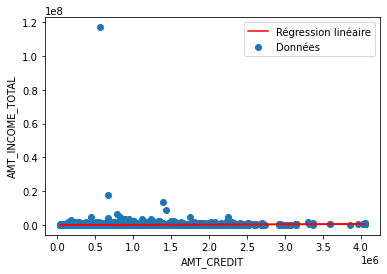

                            OLS Regression Results                            
Dep. Variable:       AMT_INCOME_TOTAL   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                 1.173e+04
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:33:23   Log-Likelihood:            -4.2363e+06
No. Observations:              307499   AIC:                         8.473e+06
Df Residuals:                  307497   BIC:                         8.473e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.379e+04    890.137     94.136      

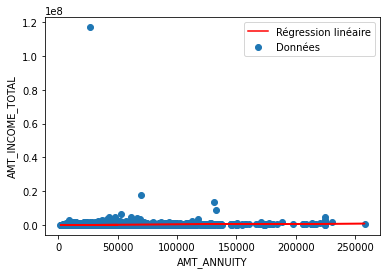

In [112]:
# Supprimer les lignes contenant des valeurs NaN ou infinies
application_train = application_train.replace([np.inf, -np.inf], np.nan).dropna(subset=['AMT_ANNUITY'])

# Préparation des données d'entrée et de sortie
Y1 = application_train['AMT_INCOME_TOTAL']
X1 = application_train[['AMT_CREDIT']]
X1 = sm.add_constant(X1)

# Estimation des coefficients
model1 = sm.OLS(Y1, X1).fit()

# Affichage du résumé des résultats de la régression
print(model1.summary())

# Calcul du coefficient de détermination
SCT1 = np.sum((Y1 - np.mean(Y1))**2)
SCR1 = np.sum((model1.predict(X1) - Y1)**2)
R2_1 = 1 - (SCR1/SCT1)
print('Coefficient de détermination (R²) pour la 1ère régression :', R2_1)

# Affichage du graphique de dispersion et de la droite de régression
plt.figure()
plt.scatter(application_train['AMT_CREDIT'], Y1, label='Données')
plt.plot(application_train['AMT_CREDIT'], model1.params['AMT_CREDIT'] * application_train['AMT_CREDIT'] + model1.params['const'], color='red', label='Régression linéaire')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_INCOME_TOTAL')
plt.legend()
plt.show()

# 2ème régression (AMT_INCOME_TOTAL et AMT_ANNUITY) :

# Préparation des données d'entrée et de sortie
Y2 = application_train['AMT_INCOME_TOTAL']
X2 = application_train[['AMT_ANNUITY']]
X2 = sm.add_constant(X2)

# Estimation des coefficients
model2 = sm.OLS(Y2, X2).fit()

# Affichage du résumé des résultats de la régression
print(model2.summary())

# Calcul du coefficient de détermination
SCT2 = np.sum((Y2 - np.mean(Y2))**2)
SCR2 = np.sum((model2.predict(X2) - Y2)**2)
R2_2 = 1 - (SCR2/SCT2)
print('Coefficient de détermination (R²) pour la 2ème régression :', R2_2)

# Affichage du graphique de dispersion et de la droite de régression
plt.figure()
plt.scatter(application_train['AMT_ANNUITY'], Y2, label='Données')
plt.plot(application_train['AMT_ANNUITY'], model2.params['AMT_ANNUITY'] * application_train['AMT_ANNUITY'] + model2.params['const'], color='red', label='Régression linéaire')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_INCOME_TOTAL')
plt.legend()
plt.show()


Conclusions des Régressions Linéaires

**Régression 1: AMT_INCOME_TOTAL et AMT_CREDIT**
- Coefficient de détermination : 0.025
  - Seulement 2.5% de la variation dans `AMT_INCOME_TOTAL` est expliquée par `AMT_CREDIT`.

**Régression 2: AMT_INCOME_TOTAL et AMT_ANNUITY**
- Coefficient de détermination : 0.037
  - Seulement 3.7% de la variation dans `AMT_INCOME_TOTAL` est expliquée par `AMT_ANNUITY`.

Ces faibles valeurs de R suggèrent que `AMT_CREDIT` et `AMT_ANNUITY` ne sont pas de bons prédicteurs pour `AMT_INCOME_TOTAL`.


## V. Analyse Multivariée

<h4>I. ANOVA (Analyse de la variance)</h4>

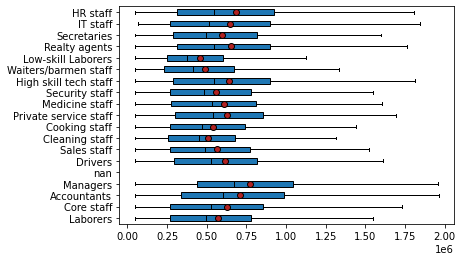

nan

In [113]:
application_train = application_train.dropna(subset=[X])

X = "OCCUPATION_TYPE"  # qualitative
Y = "AMT_CREDIT"  # quantitative


modalites = application_train[X].unique()
groupes = []
for m in modalites:
    groupes.append(application_train[application_train[X] == m][Y])

 
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

def eta_squared(x, y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x == classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj - moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe'] - moyenne_y)**2 for c in classes])
    return SCE / SCT
    
eta_squared(application_train[X], application_train[Y])


L'analyse de variance (ANOVA) a été réalisée pour évaluer l'impact de la variable qualitative `OCCUPATION_TYPE` sur la variable quantitative `AMT_CREDIT`.

2.94% de la variance totale du montant du crédit est expliquée par le type d'occupation. 

Bien que ce pourcentage soit relativement faible, il suggère une certaine association entre les deux variables.

La boîte à moustaches fournie montre la distribution du montant du crédit pour chaque modalité de `OCCUPATION_TYPE`.

Les médianes et moyennes de certains groupes diffèrent des autres, indiquant des variations dans les montants de crédit en fonction du type d'occupation.

Cependant, ces différences ne sont pas extrêmement marquées.

En somme, bien qu'il y ait des différences observables dans les montants de crédit selon le type d'occupation, cette variable n'explique qu'une petite partie de la variabilité totale du montant du crédit

<h4>II. Évaluation de l'influence des variables par les forêts aléatoires pour la feature AMT_CREDIT</h4>

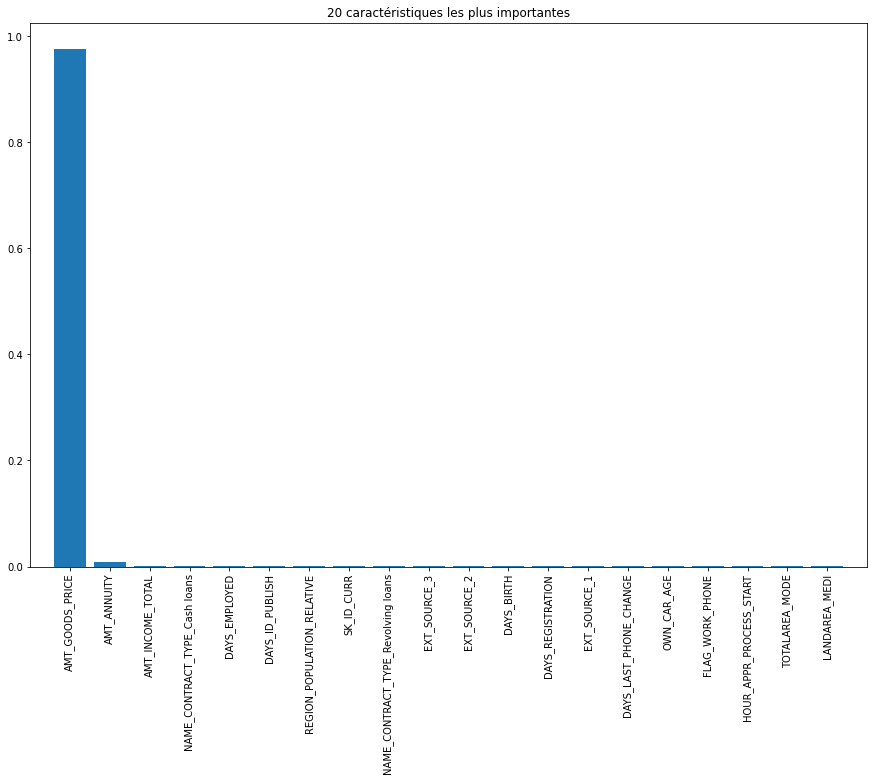

Importance
AMT_GOODS_PRICE                       0.976351
AMT_ANNUITY                           0.008996
AMT_INCOME_TOTAL                      0.000762
NAME_CONTRACT_TYPE_Cash loans         0.000539
DAYS_EMPLOYED                         0.000518
...                                        ...
ORGANIZATION_TYPE_Industry: type 8    0.000000
FLAG_DOCUMENT_4                       0.000000
ORGANIZATION_TYPE_Trade: type 4       0.000000
FLAG_DOCUMENT_21                      0.000000
FLAG_DOCUMENT_7                       0.000000

[234 rows x 1 columns]

In [114]:
#Suppression des lignes avec des valeurs manquantes
application_train_cleaned = application_train.dropna()

# Encodage One-Hot pour les caractéristiques qualitatives
application_train_encoded = pd.get_dummies(application_train_cleaned)

# Split des données
X = application_train_encoded.drop('AMT_CREDIT', axis=1)
y = application_train_encoded['AMT_CREDIT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modele
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Affichage de l'importance des caractéristiques
importances = rf.feature_importances_
indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)


num_features = 20
indices = indices[:num_features]

plt.figure(figsize=(15, 10))
plt.title(f"{num_features} caractéristiques les plus importantes")
plt.bar(range(num_features), importances[indices], align="center")
plt.xticks(range(num_features), X.columns[indices], rotation=90)
plt.xlim([-1, num_features])
plt.show()


# 6. Création d'un df des resultats
feature_importances_df = pd.DataFrame(importances, index=X.columns, columns=['Importance'])

# Tri de l'affichage du df
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

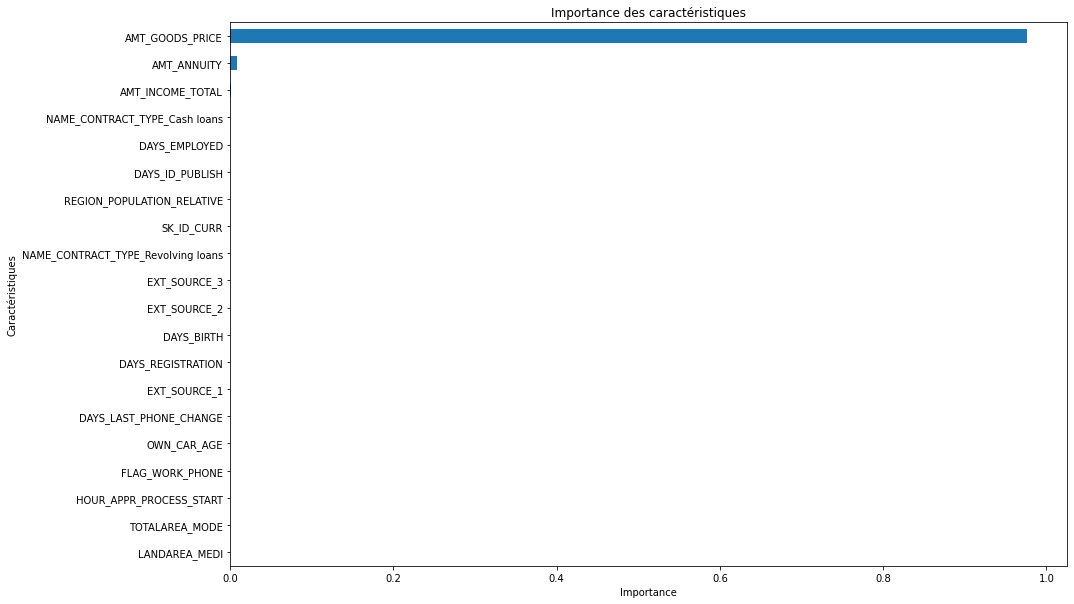

In [115]:
plt.figure(figsize=(15, 10))
top_features = feature_importances_df.head(20)
top_features['Importance'].plot(kind='barh')
plt.title("Importance des caractéristiques")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.gca().invert_yaxis()
plt.show()

In [116]:
application_train_cleaned.isnull().sum().sum()

0

# 04. Features Engineering

Dans le contexte de la prédiction du risque de crédit, nous avons décidé de créé ces trois features pour améliorer le pouvoir prédictif du modèle.

1. **CREDIT_TO_INCOME_RATIO (Ratio crédit/revenu):**

* Source : application_train.csv
* Description : Ce ratio donne une indication de la taille du prêt par rapport au revenu de l'emprunteur. Un ratio élevé pourrait indiquer que l'emprunteur pourrait avoir des difficultés à gérer un prêt significatif par rapport à son revenu.

2. **OUTSTANDING_DEBT (Dette en cours) :**

* Sources : bureau.csv, application_train.csv
* Description : Cette caractéristique représente la somme totale des montants de crédit actifs pour chaque client. Un montant élevé pourrait indiquer un risque accru si le client a déjà une dette significative.

3. **RATE_OF_PREVIOUS_TIMELY_PAYMENTS (Taux de paiements ponctuels précédents) :**

* Sources : installments_payments.csv, previous_application.csv
* Description : Il s'agit du ratio du nombre total de paiements effectués à temps au nombre total de paiements précédents. Un taux élevé pourrait indiquer un historique de remboursement solide, tandis qu'un taux faible pourrait suggérer un risque accru.

In [117]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [118]:
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

**CREDIT_TO_INCOME_RATIO (Ratio crédit/revenu)**

In [119]:
# Création de la caractéristique CREDIT_TO_INCOME_RATIO (Ratio crédit/revenu)
application_train_cleaned['CREDIT_TO_INCOME_RATIO'] = application_train_cleaned['AMT_CREDIT'] / application_train_cleaned['AMT_INCOME_TOTAL']

# Vérification
if 'CREDIT_TO_INCOME_RATIO' in application_train_cleaned.columns:
    print("CREDIT_TO_INCOME_RATIO a bien été ajouté.")
else:
    print("CREDIT_TO_INCOME_RATIO n'a PAS été ajouté.")

CREDIT_TO_INCOME_RATIO a bien été ajouté.


**AMT_CREDIT_SUM_DEBT (Dette en cours)**

In [120]:
# Filtre les crédits actifs dans le dataframe "bureau"
active_loans = bureau[bureau['CREDIT_ACTIVE'] == 'Active']

# Calcul de la dette en cours pour chaque client
outstanding_debt = active_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum().reset_index()

# Fusion avec le df "application_train_cleaned" pour ajouter la dette en cours comme nouvelle colonne
application_train_cleaned = application_train_cleaned.merge(outstanding_debt, on='SK_ID_CURR', how='left')
application_train_cleaned['AMT_CREDIT_SUM_DEBT'] = application_train_cleaned['AMT_CREDIT_SUM_DEBT'].fillna(0)  # Remplacer les NaN par 0

# Vérification
if 'AMT_CREDIT_SUM_DEBT' in application_train_cleaned.columns:
    print("AMT_CREDIT_SUM_DEBT a bien été ajouté.")
else:
    print("AMT_CREDIT_SUM_DEBT n'a PAS été ajouté.")

AMT_CREDIT_SUM_DEBT a bien été ajouté.


**PAID_ON_TIME (Taux de paiements ponctuels précédents)**

In [121]:
# Nous définissons d'abord une colonne pour identifier si le paiement a été effectué à temps
installments_payments['PAID_ON_TIME'] = (installments_payments['DAYS_ENTRY_PAYMENT'] <= installments_payments['DAYS_INSTALMENT']).astype(int)

# Calcul du taux de paiements effectués à temps pour chaque client
timely_payments = installments_payments.groupby('SK_ID_CURR')['PAID_ON_TIME'].mean().reset_index()

# Fusion avec le df "application_train_cleaned" pour ajouter le taux de paiements à temps comme nouvelle colonne
application_train_cleaned = application_train_cleaned.merge(timely_payments, on='SK_ID_CURR', how='left')
application_train_cleaned['PAID_ON_TIME'] = application_train_cleaned['PAID_ON_TIME'].fillna(0) 

# Vérification
if 'PAID_ON_TIME' in application_train_cleaned.columns:
    print("PAID_ON_TIME a bien été ajouté.")
else:
    print("PAID_ON_TIME n'a PAS été ajouté.")

PAID_ON_TIME a bien été ajouté.


# 05. Features Selection

Afin d'optimiser la sélection de variables pour notre modèle, nous adopterons une démarche combinant une approche métier et une approche automatique. 

Cette méthode hybride vise à tirer profit des avantages intrinsèques de chaque approche, assurant ainsi une sélection robuste et pertinente des caractéristiques.

Après cette étape combinée, nous examinerons attentivement les résultats pour affiner notre sélection et garantir la meilleure combinaison de variables pour le modèle.

Suite à cette optimisation, le DataFrame `application_train_cleaned` sera mis à jour en conséquence. Enfin, nous exporterons ce DataFrame à partir de ce notebook pour qu'il soit prêt à être réutilisé dans le notebook `01_Modelisation`.

## B. Sélection métier

In [122]:
# Liste des fonctionnalités pertinentes pour l'approche métier
features_business_approach = [
    "CREDIT_TO_INCOME_RATIO", "AMT_CREDIT_SUM_DEBT", "PAID_ON_TIME",
    "AMT_INCOME_TOTAL", "CODE_GENDER", "DAYS_BIRTH", "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "DAYS_EMPLOYED", "OCCUPATION_TYPE",
    "ORGANIZATION_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
    "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY"
]

# Filtrer le dataframe d'origine pour n'avoir que les fonctionnalités pertinentes
df_business_approach_selected = application_train_cleaned[features_business_approach].copy()

## B. Approche par filtrage

### I. Approche sur la variance

L'idée derrière cette approche est que les caractéristiques avec une faible variance sont probablement moins utiles, car elles ne varient pas beaucoup entre les observations. 

Cela signifie qu'elles apportent moins d'informations pour distinguer entre différentes observations.

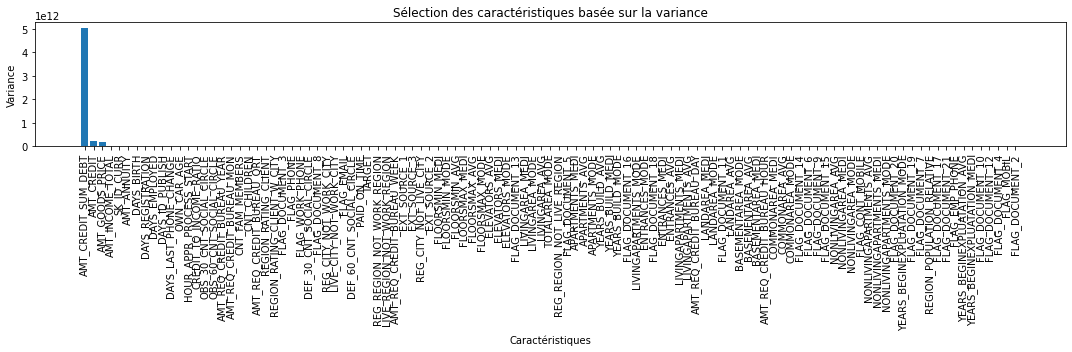

In [123]:
# Calculer la variance pour chaque caractéristique du df application_train
variances = application_train_cleaned.var()
sorted_indices = variances.sort_values(ascending=False).index

plt.figure(figsize=(15, 5))
plt.bar(x=sorted_indices, height=variances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Variance')
plt.title('Sélection des caractéristiques basée sur la variance')
plt.tight_layout()
plt.show()

In [124]:
# Filtrer uniquement les colonnes numériques
numerical_cols = application_train_cleaned.select_dtypes(include=[np.number])
X = numerical_cols.values

# Appliquer le seuil de variance
threshold = 0.8 * (1 - 0.8)
selector = VarianceThreshold(threshold=threshold)
X_high_variance = selector.fit_transform(X)

# Récupérer les noms de colonnes correspondants
selected_columns = numerical_cols.columns[selector.get_support()]

# df de resultats
df_variance_threshold = pd.DataFrame({
    'Selected Features': selected_columns
})

df_variance_threshold

Selected Features
0                    SK_ID_CURR
1                  CNT_CHILDREN
2              AMT_INCOME_TOTAL
3                    AMT_CREDIT
4                   AMT_ANNUITY
5               AMT_GOODS_PRICE
6                    DAYS_BIRTH
7                 DAYS_EMPLOYED
8             DAYS_REGISTRATION
9               DAYS_ID_PUBLISH
10                  OWN_CAR_AGE
11              FLAG_WORK_PHONE
12                   FLAG_PHONE
13              CNT_FAM_MEMBERS
14         REGION_RATING_CLIENT
15  REGION_RATING_CLIENT_W_CITY
16      HOUR_APPR_PROCESS_START
17     OBS_30_CNT_SOCIAL_CIRCLE
18     DEF_30_CNT_SOCIAL_CIRCLE
19     OBS_60_CNT_SOCIAL_CIRCLE
20       DAYS_LAST_PHONE_CHANGE
21              FLAG_DOCUMENT_3
22              FLAG_DOCUMENT_8
23    AMT_REQ_CREDIT_BUREAU_MON
24    AMT_REQ_CREDIT_BUREAU_QRT
25   AMT_REQ_CREDIT_BUREAU_YEAR
26       CREDIT_TO_INCOME_RATIO
27          AMT_CREDIT_SUM_DEBT

Lors de la sélection de caractéristiques basée sur la variance, 26 caractéristiques ont été retenues comme ayant une variance suffisamment élevée pour être potentiellement informatives pour notre modèle. 

Ces caractéristiques comprennent des identifiants uniques tels que 'SK_ID_CURR', des informations démographiques telles que 'DAYS_BIRTH' et 'CNT_CHILDREN', des détails financiers comme 'AMT_CREDIT' et 'AMT_INCOME_TOTAL', ainsi que d'autres variables associées au client et à sa demande de crédit.

### II. Approche en se basant sur l'ANOVA

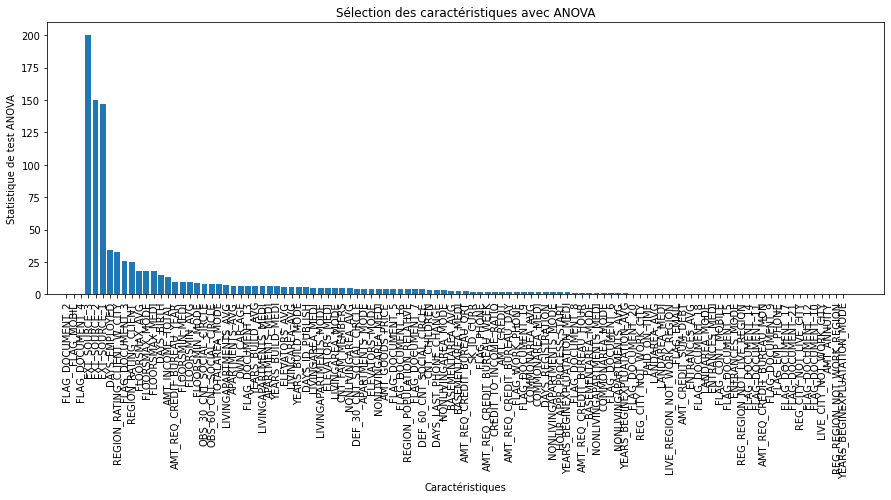

In [125]:
# Séparer les caractéristiques et la cible
X_cleaned = application_train_cleaned.drop("TARGET", axis=1).select_dtypes(include=[np.number])
y_cleaned = application_train_cleaned["TARGET"].values

# Appliquer la fonction SelectKBest avec ANOVA pour sélectionner toutes les caractéristiques
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X_cleaned, y_cleaned)
anova_scores = selector.scores_
sorted_indices = np.argsort(anova_scores)[::-1]

# Afficher la courbe des scores ANOVA
plt.figure(figsize=(15, 5))
plt.bar(x=X_cleaned.columns[sorted_indices], height=anova_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Statistique de test ANOVA')
plt.title('Sélection des caractéristiques avec ANOVA')
plt.show()

In [126]:
# Sélectionner les k meilleures caractéristiques
best_features = SelectKBest(score_func=f_classif, k=5)
X_new = best_features.fit_transform(X_cleaned, y_cleaned)
selected_features = X_cleaned.columns[best_features.get_support()]

# Créer le df de resulata
df_anova = pd.DataFrame({
    'Selected Features': selected_features
})

df_anova

Selected Features
0                DAYS_EMPLOYED
1  REGION_RATING_CLIENT_W_CITY
2                 EXT_SOURCE_1
3                 EXT_SOURCE_2
4                 EXT_SOURCE_3

### III. Approche en se basant sur le test de kruskall wallis

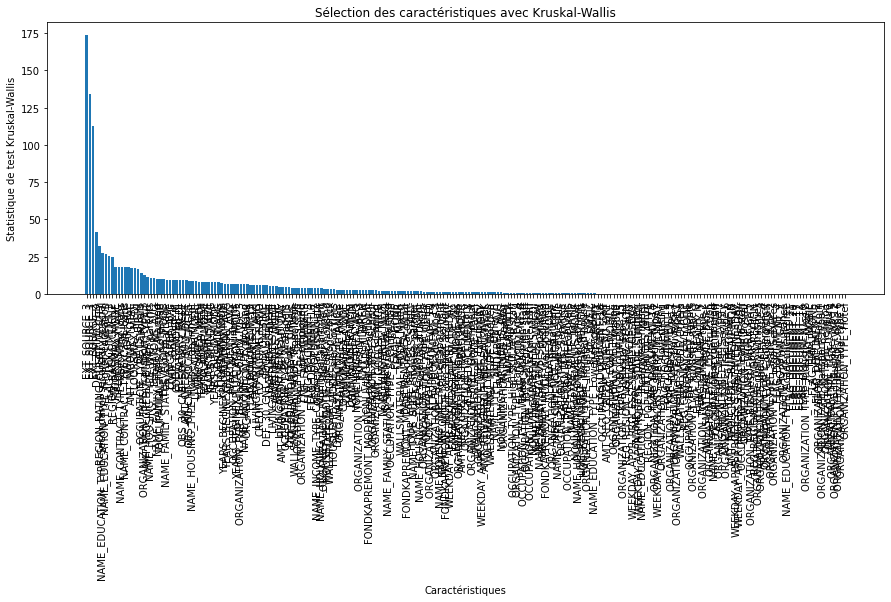

Précision : 0.93


Selected_Features
0                                      DAYS_EMPLOYED
1                               REGION_RATING_CLIENT
2                        REGION_RATING_CLIENT_W_CITY
3                                       EXT_SOURCE_1
4                                       EXT_SOURCE_2
5                                       EXT_SOURCE_3
6                                      FLOORSMAX_AVG
7                                    FLAG_DOCUMENT_3
8               NAME_EDUCATION_TYPE_Higher education
9  NAME_EDUCATION_TYPE_Secondary / secondary special

In [127]:
# Convertir les variables catégorielles.
application_train_encoded = pd.get_dummies(application_train_cleaned)

# Extraire les caractéristiques et la cible
X = application_train_encoded.drop(columns="TARGET").values
y = application_train_encoded["TARGET"].values
columns = application_train_encoded.drop(columns="TARGET").columns

# Split des données en deux groupes basés sur la cible
group0 = X[y == 0]
group1 = X[y == 1]

# Utilisation du test de Kruskal-Wallis pour obtenir les scores de chaque caractéristique
h_scores = []

for i in range(X.shape[1]):
    if len(np.unique(group0[:, i])) > 1 and len(np.unique(group1[:, i])) > 1:
        h_score = kruskal(group0[:, i], group1[:, i]).statistic
        h_scores.append(h_score)
    else:
        h_scores.append(0)

# Affichage des scores
sorted_indices = np.argsort(h_scores)[::-1]
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=np.array(h_scores)[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Statistique de test Kruskal-Wallis')
plt.title('Sélection des caractéristiques avec Kruskal-Wallis')
plt.show()

# Sélection des caractéristiques les plus importantes
best_features = SelectKBest(k=10)
best_features.scores_ = h_scores
X_new = best_features.fit_transform(X, y)
selected_features = columns[best_features.get_support()]

# Formation d'un modèle de régression logistique
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Évaluation du modèle
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Précision : {:.2f}'.format(accuracy))

# df de resulatat
df_kruskal = pd.DataFrame({
    'Selected_Features': selected_features
})

df_kruskal


### IV. Approche en se basant sur le sur le khi deux

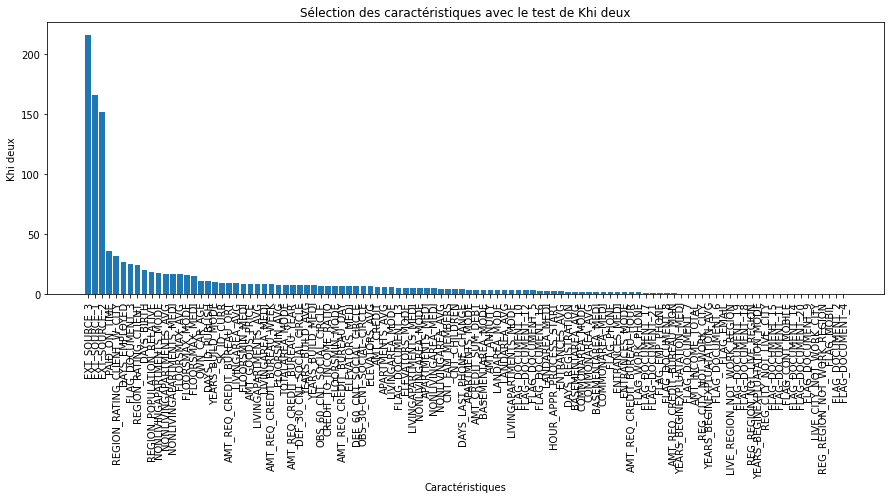

Selected_Features
0  EXT_SOURCE_3, EXT_SOURCE_1, EXT_SOURCE_2, PAID...

In [128]:
# Charger les données
data = application_train_cleaned.drop(columns="TARGET")
y = application_train_cleaned["TARGET"]

# Discrétiser les variables numériques
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
num_cols = data.select_dtypes(include='number').columns
data[num_cols] = discretizer.fit_transform(data[num_cols])

# Calculer les scores de Khi deux 
chi2_scores = np.array([chi2_contingency(pd.crosstab(data[col], y))[0] for col in num_cols])
sorted_indices = np.argsort(chi2_scores)[::-1]

# Sélectionner les caractéristiques les plus importantes
top_10_features = num_cols[sorted_indices][:10]

# Stocker les résultats dans un dataframe
df_chi2 = pd.DataFrame({
    'Selected_Features': [', '.join(top_10_features)]
})

# Afficher la courbe
plt.figure(figsize=(15, 5))
plt.bar(x=num_cols[sorted_indices], height=chi2_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("Khi deux")
plt.title('Sélection des caractéristiques avec le test de Khi deux')
plt.show()

df_chi2

### V. Approche en se basant sur le Cramer

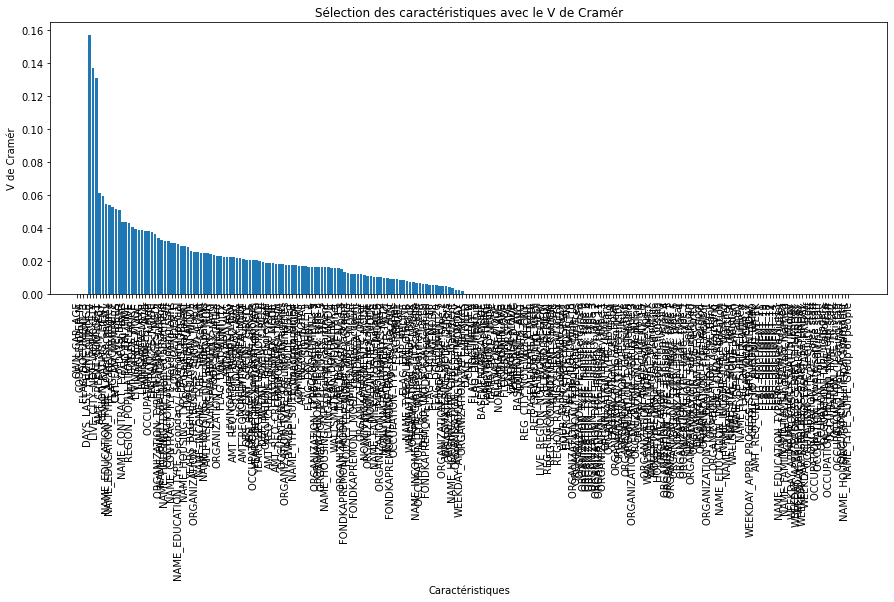

Selected_Features
0  OWN_CAR_AGE, CODE_GENDER_M, FLAG_DOCUMENT_3, D...

In [129]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Utiliser les données de application_train_encoded
X = application_train_encoded.drop(columns="TARGET")
y = application_train_encoded["TARGET"]

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Calculer les scores V de Cramer 
cramers_v_scores = np.array([cramers_v(X_discrete[:, i], y) for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(cramers_v_scores)[::-1]

# Sélectionner les caractéristiques les plus importantes
top_10_features = application_train_encoded.columns[sorted_indices][:10]

# df de resulatts
df_cramers_v = pd.DataFrame({
    'Selected_Features': [', '.join(top_10_features)]
})

# Afficher la courbe
plt.figure(figsize=(15, 5))
plt.bar(x=application_train_encoded.columns[sorted_indices], height=cramers_v_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("V de Cramér")
plt.title('Sélection des caractéristiques avec le V de Cramér')
plt.show()

df_cramers_v

### VI. Approche en se basant le T de Tschuprow

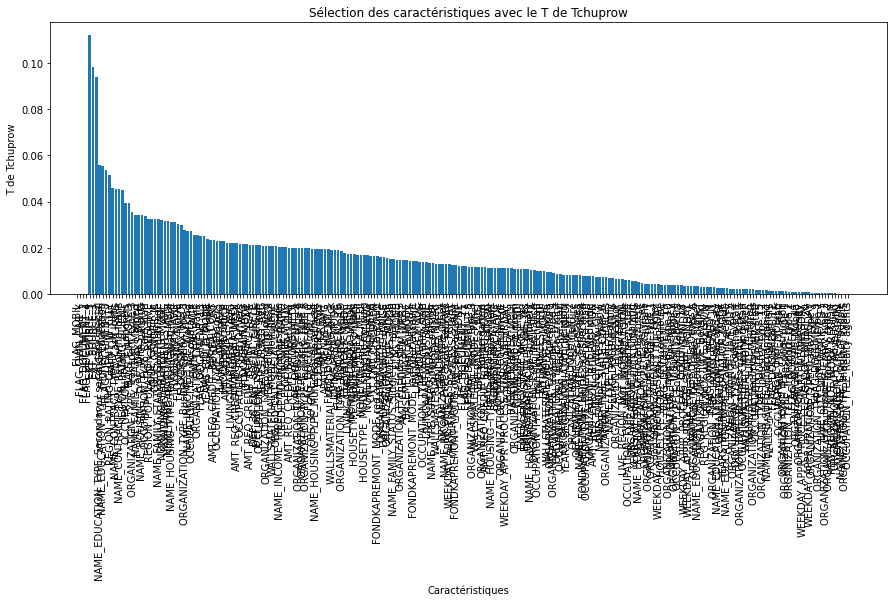

Selected_Features
0  FLAG_MOBIL, FLAG_OWN_CAR_Y, FLAG_DOCUMENT_2, F...

In [130]:
def tchuprow_t(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / (np.sqrt((k - 1) * (r - 1))))

# Utiliser les données de application_train_encoded
X = application_train_encoded.drop(columns="TARGET")
y = application_train_encoded["TARGET"]

# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Calculer les scores T de Tchuprow
tchuprow_t_scores = np.array([tchuprow_t(X_discrete[:, i], y) for i in range(X_discrete.shape[1])])
sorted_indices_tchuprow = np.argsort(tchuprow_t_scores)[::-1]

# Visualisation des scores T de Tchuprow
plt.figure(figsize=(15, 5))
plt.bar(x=X.columns[sorted_indices_tchuprow], height=tchuprow_t_scores[sorted_indices_tchuprow])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("T de Tchuprow")
plt.title('Sélection des caractéristiques avec le T de Tchuprow')
plt.show()

# Sélectionner les caractéristiques les plus importantes
top_10_features_tchuprow = X.columns[sorted_indices_tchuprow][:10]

df_tchuprow = pd.DataFrame({
    'Selected_Features': [', '.join(top_10_features_tchuprow)]
})

df_tchuprow

### VII. Approche en se basant sur l'information value

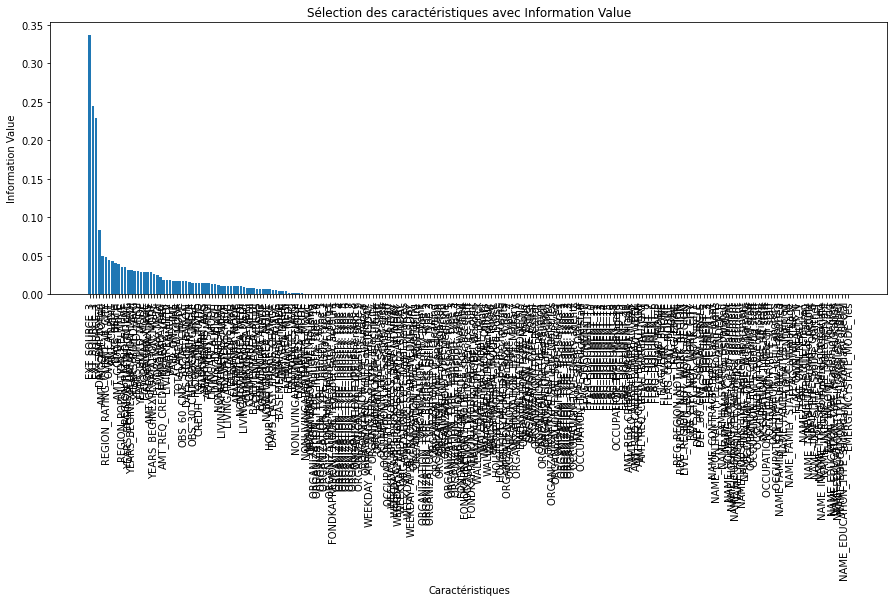

Feature  Information_Value
30                                        EXT_SOURCE_3           0.336550
28                                        EXT_SOURCE_1           0.244249
29                                        EXT_SOURCE_2           0.229180
8                                        DAYS_EMPLOYED           0.083644
2                                     AMT_INCOME_TOTAL           0.049525
..                                                 ...                ...
126               NAME_EDUCATION_TYPE_Higher education           0.000000
127              NAME_EDUCATION_TYPE_Incomplete higher           0.000000
128                NAME_EDUCATION_TYPE_Lower secondary           0.000000
129  NAME_EDUCATION_TYPE_Secondary / secondary special           0.000000
236                            EMERGENCYSTATE_MODE_Yes           0.000000

[237 rows x 2 columns]

In [131]:
def information_value(x, y, epsilon=1e-6):
    df = pd.DataFrame({'feature': x, 'target': y})
    df['bins'] = pd.cut(df['feature'], bins=pd.Series(np.unique(x)).nunique())
    grouped = df.groupby('bins')['target'].agg(['count', 'sum'])
    grouped['non_event'] = grouped['count'] - grouped['sum']
    grouped['event_dist'] = (grouped['sum'] + epsilon) / (grouped['sum'].sum() + epsilon)
    grouped['non_event_dist'] = (grouped['non_event'] + epsilon) / (grouped['non_event'].sum() + epsilon)
    grouped['woe'] = np.log(grouped['event_dist'] / grouped['non_event_dist'])
    grouped['iv'] = (grouped['event_dist'] - grouped['non_event_dist']) * grouped['woe']
    return grouped['iv'].sum()

# Sélectionnez toutes les colonnes sauf la colonne cible
feature_cols = application_train_encoded.columns.drop('TARGET')

# Discrétisez les colonnes
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_discrete = discretizer.fit_transform(application_train_encoded[feature_cols])

# Calculez l'Information Value pour chaque caractéristique
iv_scores = np.array([information_value(X_discrete[:, i], application_train_encoded['TARGET'].values) for i in range(X_discrete.shape[1])])
sorted_indices = np.argsort(iv_scores)[::-1]

# df de resultats
df_iv = pd.DataFrame({
    'Feature': feature_cols,
    'Information_Value': iv_scores
}).sort_values(by='Information_Value', ascending=False)

# Affichez la courbe des scores d'Information Value
plt.figure(figsize=(15, 5))
plt.bar(x=df_iv['Feature'], height=df_iv['Information_Value'])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel("Information Value")
plt.title('Sélection des caractéristiques avec Information Value')
plt.show()

df_iv

## C. Feature Selection with wrapper methods

### I. Forward Selection

In [132]:
# Sélectionnez toutes les colonnes sauf la colonne cible
feature_cols = application_train_cleaned.columns.drop('TARGET')

# Prendre un sous-échantillon de 5% des données pour reduire le temps de calcul
sample_data = application_train_cleaned.sample(frac=0.05, random_state=42)

X_sample = sample_data[feature_cols]
y_sample = sample_data['TARGET']

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Créer le classificateur
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Forward Selection
sfs = SFS(clf, k_features=10, forward=True, floating=False, scoring='accuracy', cv=3, n_jobs=-1)
sfs = sfs.fit(X_train, y_train)
selected_features_forward = feature_cols[list(sfs.k_feature_idx_)]

df_forward_selection = pd.DataFrame({
    'Selected_Features': [', '.join(selected_features_forward)]
})
df_forward_selection

Selected_Features
0  SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, F...

### II. Backward Selection

In [133]:
# Prendre un sous-échantillon de 5% des données pour réduire le temps de calcul
sample_data = application_train_cleaned.sample(frac=0.05, random_state=42)

# Sélectionnez toutes les colonnes sauf la colonne cible
feature_cols = sample_data.columns.drop('TARGET')

# Split des données 
X_sample = sample_data[feature_cols]
y_sample = sample_data['TARGET']
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Backward Selection
sbs = SFS(clf, k_features=10, forward=False, floating=False, scoring='accuracy', cv=3, n_jobs=-1)
sbs = sbs.fit(X_train_sample, y_train_sample)
selected_features_backward = feature_cols[list(sbs.k_feature_idx_)]

df_backward_selection = pd.DataFrame({
    'Selected_Features': [', '.join(selected_features_backward)]
})
df_backward_selection


Selected_Features
0  SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, F...

### III. Recursive Feature Elimination

In [134]:
# Sélectionnez toutes les colonnes sauf la colonne cible
feature_cols = application_train_encoded.columns.drop('TARGET')

# Prendre un sous-échantillon de 5% des données
sample_data = application_train_encoded.sample(frac=0.05, random_state=42)

X_sample = sample_data[feature_cols]
y_sample = sample_data['TARGET']

# Créer le classificateur
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Recursive Feature Elimination
rfe = RFECV(clf, step=1, cv=3, scoring='accuracy', n_jobs=-1)
rfe = rfe.fit(X_sample, y_sample)

# Obtenir les meilleures caractéristiques sélectionnées par RFE
selected_features_rfe = feature_cols[np.where(rfe.support_)[0]]

df_recursive_elimination = pd.DataFrame({
    'Selected_Features': [', '.join(selected_features_rfe)]
})
df_recursive_elimination

Selected_Features
0  OBS_30_CNT_SOCIAL_CIRCLE

## C. Feature selection with embedded approaches

### I. Feature selection with LASSO

In [135]:
# Sélectionnez toutes les colonnes sauf la colonne cible
feature_cols = application_train_encoded.columns.drop('TARGET')

# Extraire les caractéristiques et la cible
X = application_train_encoded[feature_cols]
y = application_train_encoded['TARGET']

# Metre à l'échelle les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Regression Lasso
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)
lasso_coef = lasso.coef_

# Tableau avec les noms des variables et les coefficients Lasso
coef_dict = {feature_cols[i]: lasso_coef[i] for i in range(len(feature_cols))}
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['Lasso Coefficient'])

# Obtenir les caractéristiques sélectionnées par Lasso
lasso_selected_features = feature_cols[np.where(lasso_coef != 0)]
df_lasso_selected = pd.DataFrame({
    'Selected_Features': [', '.join(lasso_selected_features)]
})

df_lasso_selected

Selected_Features
0  CNT_CHILDREN, AMT_INCOME_TOTAL, DAYS_BIRTH, DA...

### II. Feature selection avec Random forest feature importance

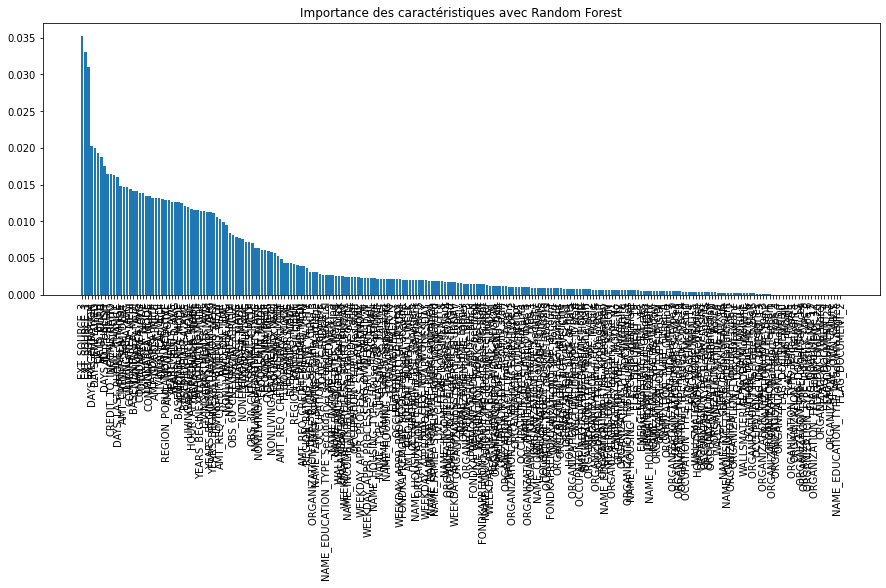

Selected_Features
0  SK_ID_CURR, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_...

In [136]:
# Sélectionnez toutes les colonnes sauf la colonne cible
feature_cols = application_train_encoded.columns.drop('TARGET')

# Extraire les caractéristiques et la cible
X = application_train_encoded[feature_cols]
y = application_train_encoded['TARGET']

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_feature_importances = rf.feature_importances_

# Sélectionner les caractéristiques basées sur leur importance
selector = SelectFromModel(rf, prefit=True)
rf_selected_features = feature_cols[selector.get_support()]

# Tableau trié des importances des caractéristiques
sorted_idx = rf_feature_importances.argsort()[::-1]
sorted_rf_feature_importances = rf_feature_importances[sorted_idx]

plt.figure(figsize=(15, 5))
plt.bar(range(len(sorted_idx)), sorted_rf_feature_importances)
plt.xticks(range(len(sorted_idx)), feature_cols[sorted_idx], rotation=90)
plt.title("Importance des caractéristiques avec Random Forest")
plt.show()

df_rf_selected = pd.DataFrame({
    'Selected_Features': [', '.join(rf_selected_features)]
})

df_rf_selected

## E. Comparaisons des méthodes

### I. Comparaisons des méthodes par filtrage

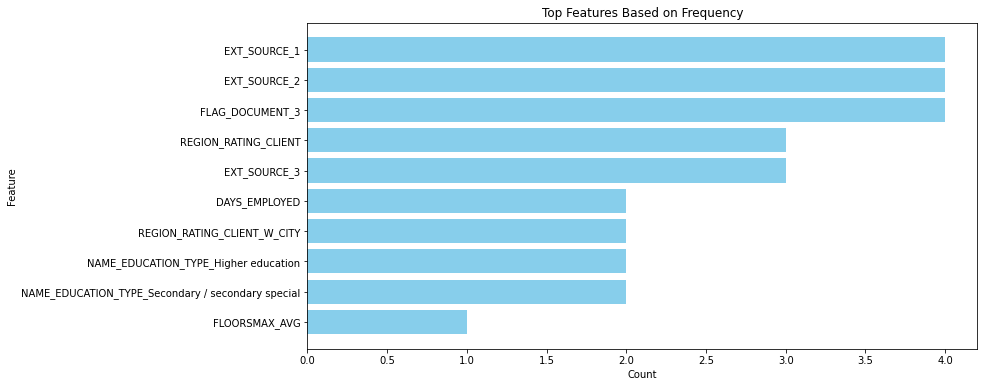

In [137]:
# Fusionner tous les df de résultats
features_filtered = pd.concat([df_variance_threshold, df_anova, df_kruskal, df_chi2, df_cramers_v, df_tchuprow, df_iv])['Selected_Features'].dropna()

# Scinder les chaînes de caractéristiques
split_features_filtered = [feature for sublist in features_filtered.str.split(', ') for feature in sublist]

# Compter la fréquence d'apparition
feature_counts = Counter(split_features_filtered)

# Trier les caractéristiques par leur fréquence d'apparition
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)

# Convertir en df
df_feature_counts = pd.DataFrame(sorted_features, columns=['Feature', 'Count'])

top_n = 10
top_features = df_feature_counts.head(top_n)
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Feature')
plt.title('Top Features Based on Frequency')
plt.gca().invert_yaxis()
plt.show()

### II. Comparaisons des méthodes par emballage

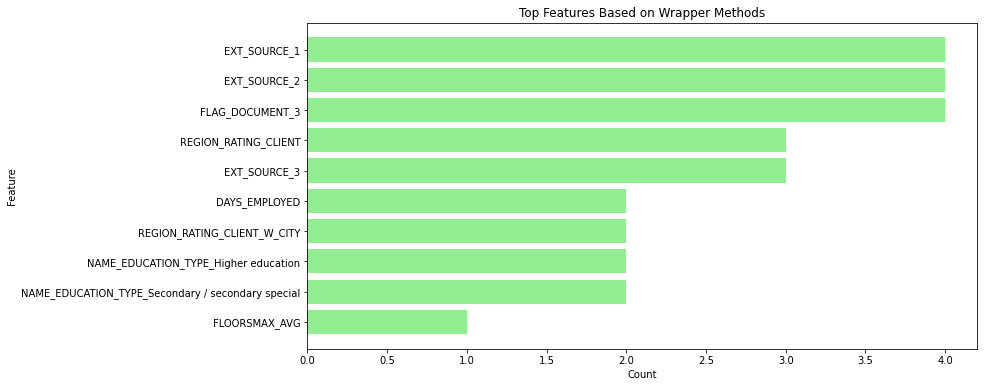

In [138]:
# Fusionner tous les df de résultats
features_wrapper = pd.concat([df_forward_selection, df_backward_selection, df_recursive_elimination])['Selected_Features'].dropna()

# Scinder les chaînes de caractéristique
split_features_wrapper = [feature for sublist in features_filtered.str.split(', ') for feature in sublist]

# Compter la fréquence d'apparition
feature_counts_wrapper = Counter(split_features_wrapper)

# Trier les caractéristiques par leur fréquence d'apparition
sorted_features_wrapper = sorted(feature_counts_wrapper.items(), key=lambda x: x[1], reverse=True)

# Convertir en df
df_feature_counts_wrapper = pd.DataFrame(sorted_features_wrapper, columns=['Feature', 'Count'])


top_n_wrapper = 10
top_features_wrapper = df_feature_counts_wrapper.head(top_n_wrapper)
plt.figure(figsize=(12, 6))
plt.barh(top_features_wrapper['Feature'], top_features_wrapper['Count'], color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Feature')
plt.title('Top Features Based on Wrapper Methods')
plt.gca().invert_yaxis()
plt.show()

### III. Comparaisons des méthodes d'approches intégrées

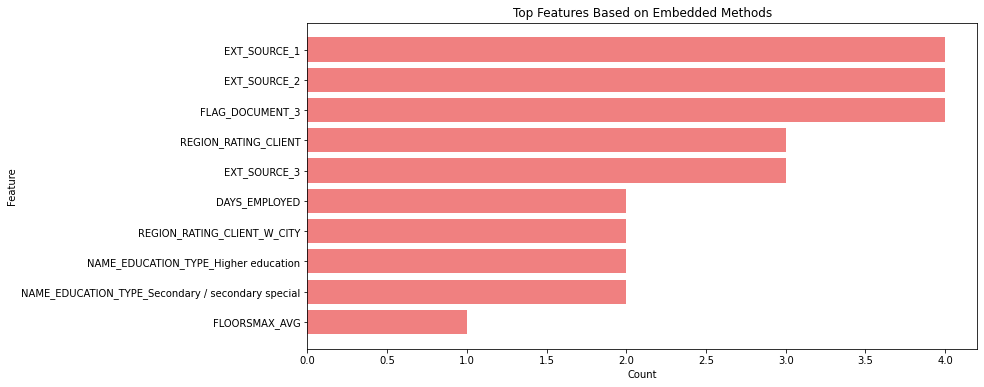

In [139]:
# Fusionner tous les df de résultats
features_embedded = pd.concat([df_lasso_selected, df_rf_selected])['Selected_Features'].dropna()

# Scinder les chaînes de caractéristiques 
split_features_embedded = [feature for sublist in features_filtered.str.split(', ') for feature in sublist]

# Compter la fréquence d'apparition
feature_counts_embedded = Counter(split_features_embedded)

# Trier les caractéristiques par leur fréquence d'apparition
sorted_features_embedded = sorted(feature_counts_embedded.items(), key=lambda x: x[1], reverse=True)

# Convertir en df
df_feature_counts_embedded = pd.DataFrame(sorted_features_embedded, columns=['Feature', 'Count'])


top_n_embedded = 10
top_features_embedded = df_feature_counts_embedded.head(top_n_embedded)
plt.figure(figsize=(12, 6))
plt.barh(top_features_embedded['Feature'], top_features_embedded['Count'], color='lightcoral')
plt.xlabel('Count')
plt.ylabel('Feature')
plt.title('Top Features Based on Embedded Methods')
plt.gca().invert_yaxis()
plt.show()

### IV. Extractions des dataframes

#### *Vérification de la corrélation avec la variable TARGET*

In [141]:
def filter_features_by_correlation(df, target_col, features_list, threshold):
    filtered_features = []
    for feature in features_list:
        if feature in df.columns and df[feature].dtype.kind in 'biufc':  # b: bool, i: int, u: uint, f: float, c: complex
            # Gérer les valeurs NaN
            valid_index = ~df[feature].isna()
            if valid_index.any():
                corr = df.loc[valid_index, [feature, target_col]].corr().iloc[0, 1]
                if abs(corr) < threshold:
                    filtered_features.append(feature)
    return filtered_features

correlation_threshold = 0.8  # Définir un seuil de corrélation

# Appliquer la fonction de filtrage
filtered_features = filter_features_by_correlation(application_train_cleaned, 'TARGET', split_features_filtered, correlation_threshold)
wrapper_features = filter_features_by_correlation(application_train_cleaned, 'TARGET', split_features_wrapper, correlation_threshold)
embedded_features = filter_features_by_correlation(application_train_cleaned, 'TARGET', split_features_embedded, correlation_threshold)
business_features = filter_features_by_correlation(application_train_cleaned, 'TARGET', features_business_approach, correlation_threshold)

# Créer des df avec les features filtrés
df_filtered_selected = application_train_cleaned[filtered_features + ['TARGET']]
df_wrapper_selected = application_train_cleaned[wrapper_features + ['TARGET']]
df_embedded_selected = application_train_cleaned[embedded_features + ['TARGET']]
df_business_approach_selected = application_train_cleaned[business_features + ['TARGET']]

In [142]:
# Enregistrer les df en CSV
df_filtered_selected.to_csv('Data/features_filtered.csv', index=False)
df_wrapper_selected.to_csv('Data/features_wrapper.csv', index=False)
df_embedded_selected.to_csv('Data/features_embedded.csv', index=False)
df_business_approach_selected.to_csv('Data/features_business_approach.csv', index=False)

In [143]:
df_filtered_selected.head()

DAYS_EMPLOYED  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0           -892                     2                            2   
1          -4375                     2                            2   
2          -2311                     2                            2   
3          -4472                     2                            2   
4           -602                     1                            1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  FLOORSMAX_AVG  FLAG_DOCUMENT_3  \
0      0.270766      0.707126      0.597192         0.3333                1   
1      0.647045      0.746486      0.739412         0.1667                1   
2      0.674832      0.616156      0.673830         0.9167                0   
3      0.534999      0.585859      0.788681         0.4583                1   
4      0.262005      0.302394      0.463275         0.5417                1   

   EXT_SOURCE_3  EXT_SOURCE_1  ...  EXT_SOURCE_2  LIVE_CITY_NOT_WORK_CITY  \
0      0.597192      0.270766  ...      0.707126                        0   
1      0.739412      0.647045  ...      0.746486                        0   
2      0.673830      0.674832  ...      0.616156                        0   
3      0.788681      0.534999  ...      0.585859                        0   
4      0.463275      0.262005  ...      0.302394                        0   

   EXT_SOURCE_1  AMT_CREDIT_SUM_DEBT  REGION_RATING_CLIENT  EXT_SOURCE_3  \
0      0.270766           1756003.50                     2      0.597192   
1      0.647045           2915271.00                     2      0.739412   
2      0.674832                 0.00                     2      0.673830   
3      0.534999               -56.79                     2      0.788681   
4      0.262005            647032.50                     1      0.463275   

   EXT_SOURCE_1  EXT_SOURCE_2  FLAG_DOCUMENT_3  TARGET  
0      0.270766      0.707126                1       0  
1      0.647045      0.746486                1       0  
2      0.674832      0.616156                0       0  
3      0.534999      0.585859                1       0  
4      0.262005      0.302394                1       1  

[5 rows x 31 columns]

In [144]:
df_wrapper_selected.head()

DAYS_EMPLOYED  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0           -892                     2                            2   
1          -4375                     2                            2   
2          -2311                     2                            2   
3          -4472                     2                            2   
4           -602                     1                            1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  FLOORSMAX_AVG  FLAG_DOCUMENT_3  \
0      0.270766      0.707126      0.597192         0.3333                1   
1      0.647045      0.746486      0.739412         0.1667                1   
2      0.674832      0.616156      0.673830         0.9167                0   
3      0.534999      0.585859      0.788681         0.4583                1   
4      0.262005      0.302394      0.463275         0.5417                1   

   EXT_SOURCE_3  EXT_SOURCE_1  ...  EXT_SOURCE_2  LIVE_CITY_NOT_WORK_CITY  \
0      0.597192      0.270766  ...      0.707126                        0   
1      0.739412      0.647045  ...      0.746486                        0   
2      0.673830      0.674832  ...      0.616156                        0   
3      0.788681      0.534999  ...      0.585859                        0   
4      0.463275      0.262005  ...      0.302394                        0   

   EXT_SOURCE_1  AMT_CREDIT_SUM_DEBT  REGION_RATING_CLIENT  EXT_SOURCE_3  \
0      0.270766           1756003.50                     2      0.597192   
1      0.647045           2915271.00                     2      0.739412   
2      0.674832                 0.00                     2      0.673830   
3      0.534999               -56.79                     2      0.788681   
4      0.262005            647032.50                     1      0.463275   

   EXT_SOURCE_1  EXT_SOURCE_2  FLAG_DOCUMENT_3  TARGET  
0      0.270766      0.707126                1       0  
1      0.647045      0.746486                1       0  
2      0.674832      0.616156                0       0  
3      0.534999      0.585859                1       0  
4      0.262005      0.302394                1       1  

[5 rows x 31 columns]

In [145]:
df_embedded_selected.head()

DAYS_EMPLOYED  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0           -892                     2                            2   
1          -4375                     2                            2   
2          -2311                     2                            2   
3          -4472                     2                            2   
4           -602                     1                            1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  FLOORSMAX_AVG  FLAG_DOCUMENT_3  \
0      0.270766      0.707126      0.597192         0.3333                1   
1      0.647045      0.746486      0.739412         0.1667                1   
2      0.674832      0.616156      0.673830         0.9167                0   
3      0.534999      0.585859      0.788681         0.4583                1   
4      0.262005      0.302394      0.463275         0.5417                1   

   EXT_SOURCE_3  EXT_SOURCE_1  ...  EXT_SOURCE_2  LIVE_CITY_NOT_WORK_CITY  \
0      0.597192      0.270766  ...      0.707126                        0   
1      0.739412      0.647045  ...      0.746486                        0   
2      0.673830      0.674832  ...      0.616156                        0   
3      0.788681      0.534999  ...      0.585859                        0   
4      0.463275      0.262005  ...      0.302394                        0   

   EXT_SOURCE_1  AMT_CREDIT_SUM_DEBT  REGION_RATING_CLIENT  EXT_SOURCE_3  \
0      0.270766           1756003.50                     2      0.597192   
1      0.647045           2915271.00                     2      0.739412   
2      0.674832                 0.00                     2      0.673830   
3      0.534999               -56.79                     2      0.788681   
4      0.262005            647032.50                     1      0.463275   

   EXT_SOURCE_1  EXT_SOURCE_2  FLAG_DOCUMENT_3  TARGET  
0      0.270766      0.707126                1       0  
1      0.647045      0.746486                1       0  
2      0.674832      0.616156                0       0  
3      0.534999      0.585859                1       0  
4      0.262005      0.302394                1       1  

[5 rows x 31 columns]

In [146]:
df_business_approach_selected.head()

CREDIT_TO_INCOME_RATIO  AMT_CREDIT_SUM_DEBT  PAID_ON_TIME  \
0                5.542304           1756003.50      0.971429   
1                1.287533           2915271.00      1.000000   
2                3.333333                 0.00      0.625000   
3                1.627694               -56.79      0.779528   
4                4.529800            647032.50      0.000000   

   AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  REGION_RATING_CLIENT  \
0          103500.0      -15406           -892                     2   
1          202500.0      -16282          -4375                     2   
2          202500.0      -11375          -2311                     2   
3          162000.0      -13972          -4472                     2   
4          225000.0      -11356           -602                     1   

   REGION_RATING_CLIENT_W_CITY  TARGET  
0                            2       0  
1                            2       0  
2                            2       0  
3                            2       0  
4                            1       1